# Declaration：The project refer to [Algorithmic Trading – Machine Learning & Quant Strategies Course with Python](https://www.youtube.com/watch?v=9Y3yaoi9rUQ&t=4297s) Which is apply the ML in Quant Strategies on S&P 500 stock

## For this project use the crypto top100 instead of the S&P 500 stock data, because of limited knowledge, there could be have some errors in it, please be careful with that.

# Unsupervised Learning Trading Strategy

* Download/Load TOP100 Crypto prices data.
* Calculate different features and indicators on each cypto.
* Aggregate on monthly level and filter top 20 most liquid cypto.
* Calculate Monthly Returns for different time-horizons.
* For each day fit a K-Means Clustering Algorithm to group similar assets based on their features.
* For each day select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization.
* Visualize Portfolio returns and compare to TOP100 returns.

# All Packages Needed:
* pandas, numpy, matplotlib, statsmodels, pandas_datareader, datetime, yfinance, sklearn, PyPortfolioOpt

## 1. Download/Load TOP100 Crypto data.

In [8]:
!pip install pandas_ta
!pip install pandas_datareader
!pip install yfinance
!pip install PyPortfolioOpt

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/39/29/89572cb0c65b07a1c4e5cd53eb0a0f947f2ece53fef6ed7da90cfab7d2a9/yfinance-0.2.43-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for html5lib>=1.1 from https://files.pythonhosted.org/packages/6c/dd/a834df6482147d48e225a49515aabc28974ad

In [9]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')


In [10]:
# get top100 cypto list from yahoo finance
top_100 = pd.read_html('https://finance.yahoo.com/markets/crypto/all/?start=0&count=100')[0]


In [11]:
top_100

Symbol                         Price  \
0                BTC-USD Bitcoin USD  58,672.01 -4,223.32 (-6.71%)   
1               ETH-USD Ethereum USD     2,437.73 -250.34 (-9.31%)   
2           USDT-USD Tether USDt USD       1.0001 +0.0000 (+0.00%)   
3                    BNB-USD BNB USD        533.39 -22.09 (-3.98%)   
4                 SOL-USD Solana USD        144.32 -13.38 (-8.49%)   
..                               ...                           ...   
95            VBNB-USD Venus BNB USD          13.04 -0.50 (-3.72%)   
96  BRETT29743-USD Brett (Based) USD   0.080286 -0.007676 (-8.73%)   
97                 QNT-USD Quant USD          63.65 -2.63 (-3.97%)   
98             FTN-USD Fasttoken USD       2.5174 +0.0165 (+0.66%)   
99           EGLD-USD MultiversX USD          27.70 -3.01 (-9.79%)   

         Change Change %  Day Chart Market Cap    Volume  \
0  -4223.320000   -6.71%        NaN     1.159T   42.269B   
1   -250.340000   -9.31%        NaN   293.256B   20.604B   
2      0.000000   +0.00%        NaN   118.057B   70.107B   
3    -22.090000   -3.98%        NaN    77.841B    1.914B   
4    -13.380000   -8.49%        NaN    67.275B    3.015B   
..          ...      ...        ...        ...       ...   
95    -0.500000   -3.72%        NaN   803.982M  804.108M   
96    -0.007676   -8.73%        NaN    795.65M   23.171M   
97    -2.630000   -3.97%        NaN   768.427M   10.763M   
98     0.016500   +0.66%        NaN   767.438M  160.989M   
99    -3.010000   -9.79%        NaN   754.749M   18.099M   

   Volume In Currency (24hr) Total Volume All Currencies (24hr)  \
0                    42.269B                            42.269B   
1                    20.604B                            20.604B   
2                    70.107B                            70.107B   
3                     1.914B                             1.914B   
4                     3.015B                             3.015B   
..                       ...                                ...   
95                  804.108M                           804.108M   
96                   23.171M                            23.171M   
97                   10.763M                            10.763M   
98                  160.989M                           160.989M   
99                   18.099M                            18.099M   

   Circulating Supply 52 Wk Change %  52 Wk Range  
0             19.746M        130.36%          NaN  
1            120.299M         57.25%          NaN  
2            118.039B          0.01%          NaN  
3            145.935M        145.23%          NaN  
4            466.155M        654.68%          NaN  
..                ...            ...          ...  
95            61.636M         46.28%          NaN  
96              9.91B        149.36%          NaN  
97            12.073M        -34.51%          NaN  
98            304.85M        132.45%          NaN  
99             27.25M         14.97%          NaN  

[100 rows x 12 columns]

In [12]:
#save the top100 coin names to the list 
coins_list = top_100['Symbol'].unique().tolist()
# clean the list value to match the yfinace format
coins_list = [s.split()[0] for s in coins_list]
print(coins_list)

['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'SOL-USD', 'USDC-USD', 'XRP-USD', 'STETH-USD', 'DOGE-USD', 'WTRX-USD', 'TRX-USD', 'TON11419-USD', 'ADA-USD', 'WSTETH-USD', 'AVAX-USD', 'WBTC-USD', 'WETH-USD', 'SHIB-USD', 'LINK-USD', 'DOT-USD', 'BCH-USD', 'EDLC-USD', 'LEO-USD', 'DAI-USD', 'NEAR-USD', 'LTC-USD', 'MATIC-USD', 'EETH-USD', 'WEETH-USD', 'KAS-USD', 'BTCB-USD', 'ICP-USD', 'UNI7083-USD', 'PEPE24478-USD', 'APT21794-USD', 'FDUSD-USD', 'FET-USD', 'USDE29470-USD', 'XMR-USD', 'WBETH-USD', 'XLM-USD', 'ETC-USD', 'STX4847-USD', 'TAO22974-USD', 'R', 'OKB-USD', 'CRO-USD', 'IMX10603-USD', 'SUI20947-USD', 'FIL-USD', 'MNT27075-USD', 'HBAR-USD', 'JITOSOL-USD', 'VET-USD', 'ARB11841-USD', 'INJ-USD', 'AAVE-USD', 'ATOM-USD', 'MKR-USD', 'OP-USD', 'ZBU-USD', 'WIF-USD', 'AR-USD', 'FLOKI-USD', 'GRT6719-USD', 'RETH-USD', 'BGB-USD', 'RUNE-USD', 'SUSDE-USD', 'METH29035-USD', 'BONK-USD', 'THETA-USD', 'PUFETH-USD', 'FLZ-USD', 'FTM-USD', 'JUP29210-USD', 'HNT-USD', 'CHEEL-USD', 'ALGO-USD', 'TIA22861-USD', 'PYU

In [14]:
import pandas as pd
end_date = '2024-08-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365)

df = yf.download(tickers=coins_list,
                 start=start_date,
                 end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()
# drop the rows if there is NA value in dataframe
df = df.dropna()
df

[*********************100%***********************]  100 of 100 completed

1 Failed download:
['VBNB-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-08-28 00:00:00 -> 2024-08-27)')


Price                                    adj close       close        high  \
date                      ticker                                             
2023-08-28 00:00:00+00:00 AAVE-USD       58.262287   58.262287   58.406757   
                          ADA-USD         0.267434    0.267434    0.267606   
                          ALGO-USD        0.097280    0.097280    0.097511   
                          APT21794-USD    5.736372    5.736372    5.745655   
                          AR-USD          4.193385    4.193385    4.294393   
...                                            ...         ...         ...   
2024-08-26 00:00:00+00:00 WTRX-USD        0.161901    0.161901    0.168239   
                          XLM-USD         0.097122    0.097122    0.101216   
                          XMR-USD       166.839935  166.839935  168.001785   
                          XRP-USD         0.587470    0.587470    0.602187   
                          ZBU-USD         4.898178    4.898178    4.982495   

Price                                          low        open        volume  
date                      ticker                                              
2023-08-28 00:00:00+00:00 AAVE-USD       56.449646   58.240910  5.633150e+07  
                          ADA-USD         0.258775    0.263453  1.626327e+08  
                          ALGO-USD        0.092823    0.095177  2.172010e+07  
                          APT21794-USD    5.566873    5.697383  7.365640e+07  
                          AR-USD          4.136577    4.203643  4.232558e+06  
...                                            ...         ...           ...  
2024-08-26 00:00:00+00:00 WTRX-USD        0.161883    0.166487  2.744672e+07  
                          XLM-USD         0.096688    0.100960  5.076530e+07  
                          XMR-USD       162.709793  166.534882  6.460337e+07  
                          XRP-USD         0.580407    0.600186  1.118813e+09  
                          ZBU-USD         4.888024    4.892810  2.354295e+07  

[33825 rows x 6 columns]

## 2. Calculate features and technical indicators for each coin.

* Garman-Klass Volatility
* RSI
* Bollinger Bands
* ATR
* MACD
* Dollar Volume



\begin{equation}
\text{Garman-Klass Volatility} = \frac{(\ln(\text{High}) - \ln(\text{Low}))^2}{2} - (2\ln(2) - 1)(\ln(\text{Adj Close}) - \ln(\text{Open}))^2
\end{equation}

In [134]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=7))

# caculate the bollinger bands
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=7).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=7).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=7).iloc[:,2])

#  def function to caculate the ATR
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=7)
    # Normalization the atr to make it more comparable with other coins, or you can just return the atr
    return atr.sub(atr.mean()).div(atr.std())
    #return atr
df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

#  def function to caculate the MACD
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=7).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
    # Normalization the atr to make it more comparable with other coins, or you can just return the macd
    # return macd
df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6
# drop the value is NA in the dataframe, since the length is 30 days, so first 30 days no value output
data = df.dropna()
data

Price                                    adj close       close        high  \
date                      ticker                                             
2023-09-22 00:00:00+00:00 AAVE-USD       64.380829   64.380829   64.428947   
                          ADA-USD         0.244922    0.244922    0.246383   
                          ALGO-USD        0.101860    0.101860    0.102340   
                          APT21794-USD    5.130791    5.130791    5.150719   
                          AR-USD          4.137863    4.137863    4.199529   
...                                            ...         ...         ...   
2024-08-26 00:00:00+00:00 WTRX-USD        0.161901    0.161901    0.168239   
                          XLM-USD         0.097122    0.097122    0.101216   
                          XMR-USD       166.839935  166.839935  168.001785   
                          XRP-USD         0.587470    0.587470    0.602187   
                          ZBU-USD         4.898178    4.898178    4.982495   

Price                                          low        open        volume  \
date                      ticker                                               
2023-09-22 00:00:00+00:00 AAVE-USD       62.176121   62.510864  7.259096e+07   
                          ADA-USD         0.243236    0.245458  1.203783e+08   
                          ALGO-USD        0.096599    0.097563  2.561547e+07   
                          APT21794-USD    5.069430    5.101711  5.704389e+07   
                          AR-USD          4.104870    4.142670  3.877063e+06   
...                                            ...         ...           ...   
2024-08-26 00:00:00+00:00 WTRX-USD        0.161883    0.166487  2.744672e+07   
                          XLM-USD         0.096688    0.100960  5.076530e+07   
                          XMR-USD       162.709793  166.534882  6.460337e+07   
                          XRP-USD         0.580407    0.600186  1.118813e+09   
                          ZBU-USD         4.888024    4.892810  2.354295e+07   

Price                                   garman_klass_vol        rsi    bb_low  \
date                      ticker                                                
2023-09-22 00:00:00+00:00 AAVE-USD              0.000298  71.311361  4.070525   
                          ADA-USD               0.000081  35.106336  0.217170   
                          ALGO-USD              0.000949  68.401352  0.089510   
                          APT21794-USD          0.000114  37.241464  1.801925   
                          AR-USD                0.000259  42.244182  1.627459   
...                                                  ...        ...       ...   
2024-08-26 00:00:00+00:00 WTRX-USD              0.000440  78.350627  0.135750   
                          XLM-USD               0.000467  43.232859  0.091475   
                          XMR-USD               0.000511  63.769021  5.068699   
                          XRP-USD               0.000501  47.548153  0.459930   
                          ZBU-USD               0.000183  61.716122  1.745421   

Price                                     bb_mid   bb_high       atr  \
date                      ticker                                       
2023-09-22 00:00:00+00:00 AAVE-USD      4.141193  4.211861 -1.254825   
                          ADA-USD       0.222770  0.228369 -1.327825   
                          ALGO-USD      0.093431  0.097351 -1.066665   
                          APT21794-USD  1.823481  1.845036 -1.229115   
                          AR-USD        1.665353  1.703247 -1.116291   
...                                          ...       ...       ...   
2024-08-26 00:00:00+00:00 WTRX-USD      0.146092  0.156434  4.712210   
                          XLM-USD       0.095029  0.098582 -0.763693   
                          XMR-USD       5.121159  5.173619  0.075564   
                          XRP-USD       0.470374  0.480819 -0.184438   
                          

## 3. Filter top 20 most liquid coins.


* Calculateaverage of dollar volume for each coins before filtering.

In [135]:
data['dollar_volume_mean'] = data.groupby('ticker')['dollar_volume'].transform('mean')
data['dollar_vol_rank'] = data.groupby('date')['dollar_volume_mean'].rank(ascending=False)
data = data[data['dollar_vol_rank'] < 20].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)
data

Price                                    adj close         close  \
date                      ticker                                   
2023-09-22 00:00:00+00:00 AAVE-USD       64.380829     64.380829   
                          AVAX-USD        8.863329      8.863329   
                          BCH-USD       207.825012    207.825012   
                          BNB-USD       211.150864    211.150864   
                          BTC-USD     26579.568359  26579.568359   
...                                            ...           ...   
2024-08-26 00:00:00+00:00 WBNB-USD      549.354858    549.354858   
                          WBTC-USD    62898.300781  62898.300781   
                          WEETH-USD    2811.521973   2811.521973   
                          WETH-USD     2686.572266   2686.572266   
                          WSTETH-USD   3160.667236   3160.667236   

Price                                         high           low  \
date                      ticker                                   
2023-09-22 00:00:00+00:00 AAVE-USD       64.428947     62.176121   
                          AVAX-USD        8.914637      8.788034   
                          BCH-USD       209.805542    205.777573   
                          BNB-USD       212.026581    209.941681   
                          BTC-USD     26726.078125  26495.533203   
...                                            ...           ...   
2024-08-26 00:00:00+00:00 WBNB-USD      575.816040    548.822021   
                          WBTC-USD    64223.031250  62897.539062   
                          WEETH-USD    2910.994385   2801.406006   
                          WETH-USD     2762.438232   2682.855713   
                          WSTETH-USD   3247.677979   3155.506348   

Price                                         open        volume  \
date                      ticker                                   
2023-09-22 00:00:00+00:00 AAVE-USD       62.510864  7.259096e+07   
                          AVAX-USD        8.826609  9.608729e+07   
                          BCH-USD       208.655869  1.329590e+08   
                          BNB-USD       210.789383  2.748050e+08   
                          BTC-USD     26564.056641  1.057875e+10   
...                                            ...           ...   
2024-08-26 00:00:00+00:00 WBNB-USD      575.577576  1.752766e+08   
                          WBTC-USD    64134.863281  2.079091e+08   
                          WEETH-USD    2910.994385  2.680146e+06   
                          WETH-USD     2762.438232  6.498930e+08   
                          WSTETH-USD   3246.270264  1.820570e+07   

Price                                 garman_klass_vol        rsi     bb_low  \
date                      ticker                                               
2023-09-22 00:00:00+00:00 AAVE-USD            0.000298  71.311361   4.070525   
                          AVAX-USD            0.000096  24.147232   2.274667   
                          BCH-USD             0.000182  49.252143   5.328298   
                          BNB-USD             0.000048  37.971202   5.350666   
                          BTC-USD             0.000037  51.390808  10.174920   
...                                                ...        ...        ...   
2024-08-26 00:00:00+00:00 WBNB-USD            0.000313  44.037627   6.311548   
                          WBTC-USD            0.000071  59.877471  10.977464   
                          WEETH-USD           0.000269  49.555520   7.888435   
                          WETH-USD            0.000128  49.563159   7.843073   
                          WSTETH-USD          0.000139  49.883583   8.006726   

Price                                    bb_mid    bb_high       atr  \
date                      ticker                                       
2023-09-22 00:00:00+00:00 AAVE-USD     4.141193   4.211861 -1.254825   
                          AVAX-USD     2.310481   2.346294 -1.431127   
                

## 4. Calculate Daily Returns for different time horizons as features.

* To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

In [136]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 7, 14, 30]

    for lag in lags:

        df[f'return_{lag}d'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              # add the following code will get the log return
                               .add(1)
                               .pow(1/lag)
                               .sub(1)
                              )
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

Price                                    adj close         close  \
date                      ticker                                   
2023-10-22 00:00:00+00:00 AAVE-USD       79.353539     79.353539   
                          AVAX-USD       10.063459     10.063459   
                          BCH-USD       243.489502    243.489502   
                          BNB-USD       217.747375    217.747375   
                          BTC-USD     29993.896484  29993.896484   
...                                            ...           ...   
2024-08-26 00:00:00+00:00 WBNB-USD      549.354858    549.354858   
                          WBTC-USD    62898.300781  62898.300781   
                          WEETH-USD    2811.521973   2811.521973   
                          WETH-USD     2686.572266   2686.572266   
                          WSTETH-USD   3160.667236   3160.667236   

Price                                         high           low  \
date                      ticker                                   
2023-10-22 00:00:00+00:00 AAVE-USD       79.834579     69.144051   
                          AVAX-USD       10.063459      9.567420   
                          BCH-USD       253.179932    237.898697   
                          BNB-USD       218.004852    213.834290   
                          BTC-USD     30199.433594  29720.312500   
...                                            ...           ...   
2024-08-26 00:00:00+00:00 WBNB-USD      575.816040    548.822021   
                          WBTC-USD    64223.031250  62897.539062   
                          WEETH-USD    2910.994385   2801.406006   
                          WETH-USD     2762.438232   2682.855713   
                          WSTETH-USD   3247.677979   3155.506348   

Price                                         open        volume  \
date                      ticker                                   
2023-10-22 00:00:00+00:00 AAVE-USD       70.019035  2.568916e+08   
                          AVAX-USD        9.639973  1.966648e+08   
                          BCH-USD       243.685944  2.319619e+08   
                          BNB-USD       214.321732  2.867719e+08   
                          BTC-USD     29918.654297  1.044652e+10   
...                                            ...           ...   
2024-08-26 00:00:00+00:00 WBNB-USD      575.577576  1.752766e+08   
                          WBTC-USD    64134.863281  2.079091e+08   
                          WEETH-USD    2910.994385  2.680146e+06   
                          WETH-USD     2762.438232  6.498930e+08   
                          WSTETH-USD   3246.270264  1.820570e+07   

Price                                 garman_klass_vol        rsi     bb_low  \
date                      ticker                                               
2023-10-22 00:00:00+00:00 AAVE-USD            0.004284  85.965671   4.059407   
                          AVAX-USD            0.000564  71.201319   2.266329   
                          BCH-USD             0.001938  75.823497   5.398803   
                          BNB-USD             0.000089  71.696455   5.344860   
                          BTC-USD             0.000125  84.713400  10.230201   
...                                                ...        ...        ...   
2024-08-26 00:00:00+00:00 WBNB-USD            0.000313  44.037627   6.311548   
                          WBTC-USD            0.000071  59.877471  10.977464   
                          WEETH-USD           0.000269  49.555520   7.888435   
                          WETH-USD            0.000128  49.563159   7.843073   
                          WSTETH-USD          0.000139  49.883583   8.006726   

Price                                    bb_mid    bb_high       atr  \
date                      ticker                                       
2023-10-22 00:00:00+00:00 AAVE-USD     4.216092   4.372777 -0.710162   
                          AVAX-USD     2.336247   2.406165 -1.322732   
                

### At this point we have to decide on what ML model and approach to use for predictions etc.


## 5. For each day fit a K-Means Clustering Algorithm to group similar assets based on their features.

### K-Means Clustering
* You may want to initialize predefined centroids for each cluster based on your research.

* For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

* Then we will pre-define our centroids for each cluster.

In [141]:
from sklearn.cluster import KMeans

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4, 
                           random_state=0,
                           init='random').fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

Price                     adj close         close          high           low  \
date       ticker                                                               
2023-10-22 AAVE-USD       79.353539     79.353539     79.834579     69.144051   
           AVAX-USD       10.063459     10.063459     10.063459      9.567420   
           BCH-USD       243.489502    243.489502    253.179932    237.898697   
           BNB-USD       217.747375    217.747375    218.004852    213.834290   
           BTC-USD     29993.896484  29993.896484  30199.433594  29720.312500   
...                             ...           ...           ...           ...   
2024-08-26 WBNB-USD      549.354858    549.354858    575.816040    548.822021   
           WBTC-USD    62898.300781  62898.300781  64223.031250  62897.539062   
           WEETH-USD    2811.521973   2811.521973   2910.994385   2801.406006   
           WETH-USD     2686.572266   2686.572266   2762.438232   2682.855713   
           WSTETH-USD   3160.667236   3160.667236   3247.677979   3155.506348   

Price                          open        volume  garman_klass_vol  \
date       ticker                                                     
2023-10-22 AAVE-USD       70.019035  2.568916e+08          0.004284   
           AVAX-USD        9.639973  1.966648e+08          0.000564   
           BCH-USD       243.685944  2.319619e+08          0.001938   
           BNB-USD       214.321732  2.867719e+08          0.000089   
           BTC-USD     29918.654297  1.044652e+10          0.000125   
...                             ...           ...               ...   
2024-08-26 WBNB-USD      575.577576  1.752766e+08          0.000313   
           WBTC-USD    64134.863281  2.079091e+08          0.000071   
           WEETH-USD    2910.994385  2.680146e+06          0.000269   
           WETH-USD     2762.438232  6.498930e+08          0.000128   
           WSTETH-USD   3246.270264  1.820570e+07          0.000139   

Price                        rsi     bb_low     bb_mid    bb_high       atr  \
date       ticker                                                             
2023-10-22 AAVE-USD    85.965671   4.059407   4.216092   4.372777 -0.710162   
           AVAX-USD    71.201319   2.266329   2.336247   2.406165 -1.322732   
           BCH-USD     75.823497   5.398803   5.460645   5.522486 -0.727922   
           BNB-USD     71.696455   5.344860   5.366894   5.388927 -1.222531   
           BTC-USD     84.713400  10.230201  10.277650  10.325099 -1.223362   
...                          ...        ...        ...        ...       ...   
2024-08-26 WBNB-USD    44.037627   6.311548   6.355811   6.400073  0.473912   
           WBTC-USD    59.877471  10.977464  11.037946  11.098429  0.169912   
           WEETH-USD   49.555520   7.888435   7.943108   7.997780 -0.768244   
           WETH-USD    49.563159   7.843073   7.896362   7.949650 -0.329045   
           WSTETH-USD  49.883583   8.006726   8.058782   8.110838 -0.199331   

Price                      macd  dollar_volume_mean  return_1d  return_7d  \
date       ticker                                                           
2023-10-22 AAVE-USD    0.219679        1.360115e+04   0.130534   0.031229   
           AVAX-USD   -0.138951        2.186978e+04   0.044008   0.013320   
           BCH-USD     0.103802        1.527328e+05  -0.000467   0.017829   
           BNB-USD    -0.439120        7.153131e+05   0.016060   0.005365   
           BTC-USD    -0.014888        1.559200e+09   0.002523   0.014281   
...                         ...                 ...        ...        ...   
2024-08-26 WBNB-USD    0.131515        9.064646e+04  -0.045567  -0.002412   
           WBTC-USD   -0.233528        1.367156e+07  -0.019275   0.008384   
           WEETH-USD  -0.692970        9.843524e+04  -0.034171   0.003843   
           WETH-USD   -0.901343        4.137464e+06  -0.027462   0.003230   
           WSTETH-USD -0.903017        1.470110e+05  -0.026370   0.003

In [142]:
def plot_clusters(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
#     cluster_4 = data[data['cluster']==4]
    
    # column 7 is rsi and column 11 is atr in dataframe above
    plt.scatter(cluster_0.iloc[:,11], cluster_0.iloc[:,7], color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,11], cluster_1.iloc[:,7], color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,11], cluster_2.iloc[:,7], color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,11], cluster_3.iloc[:,7], color = 'black', label='cluster 3')
#     plt.scatter(cluster_4.iloc[:,11], cluster_4.iloc[:,7], color = 'purple', label='cluster 4')

    plt.legend()
    plt.show()
    return

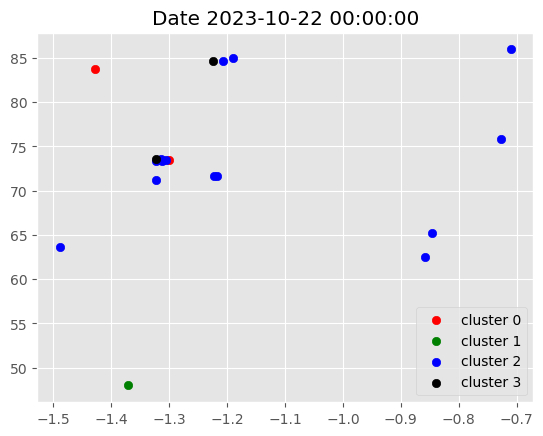

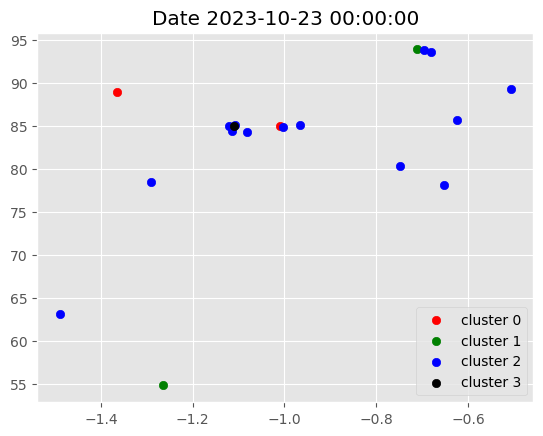

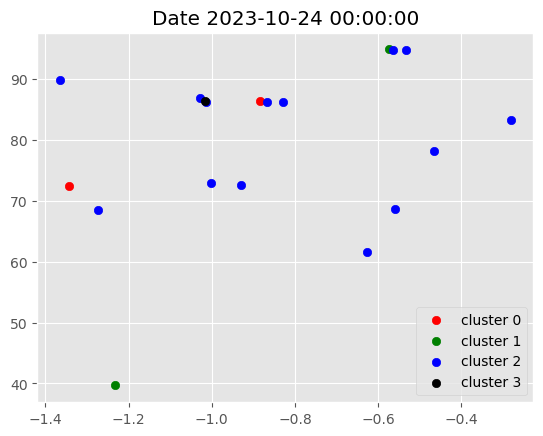

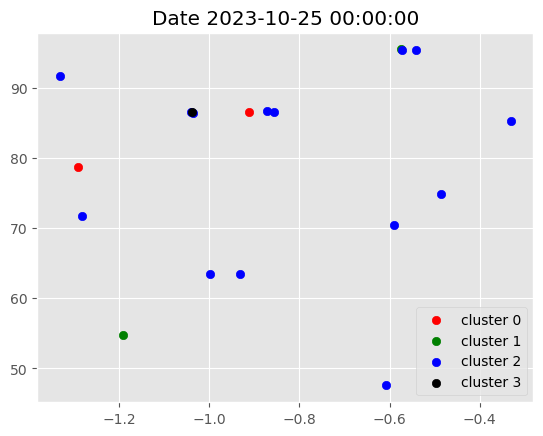

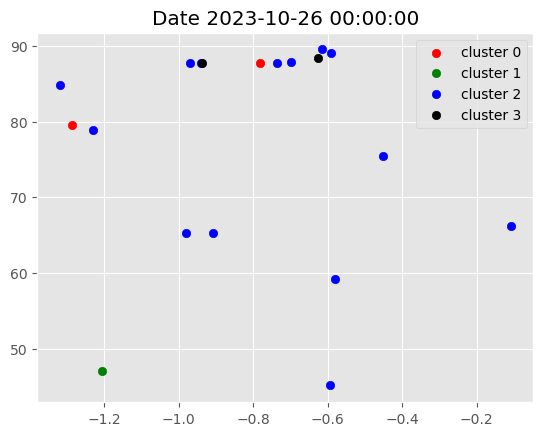

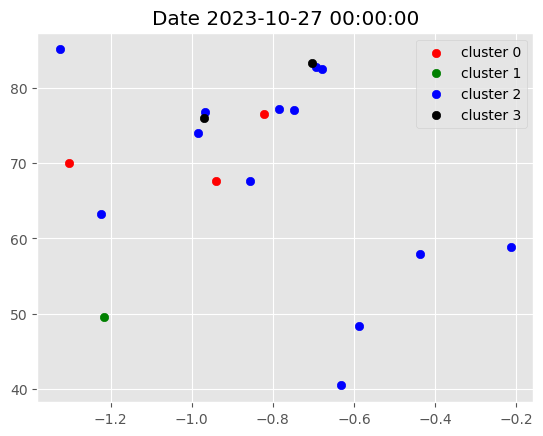

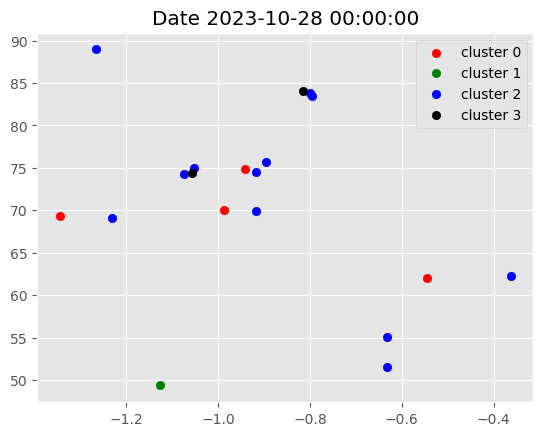

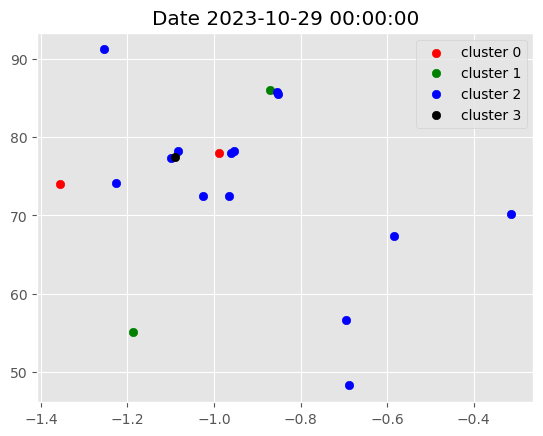

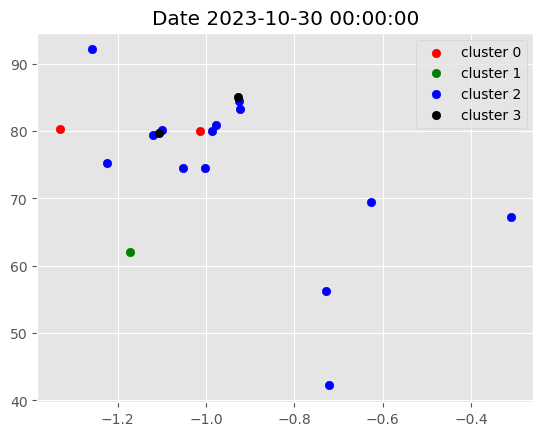

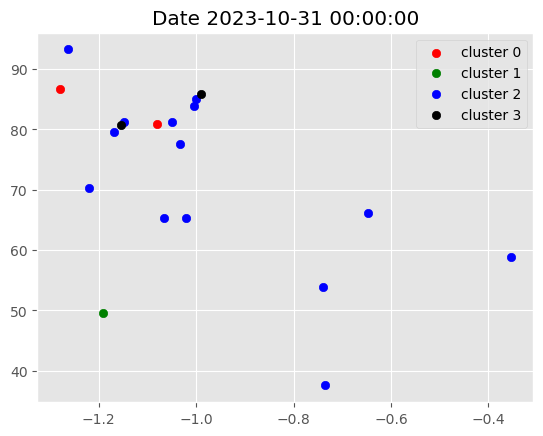

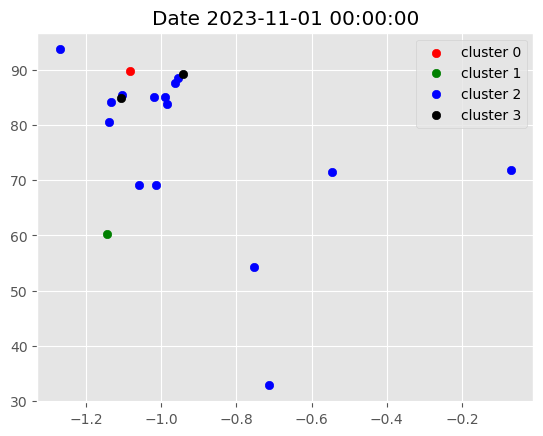

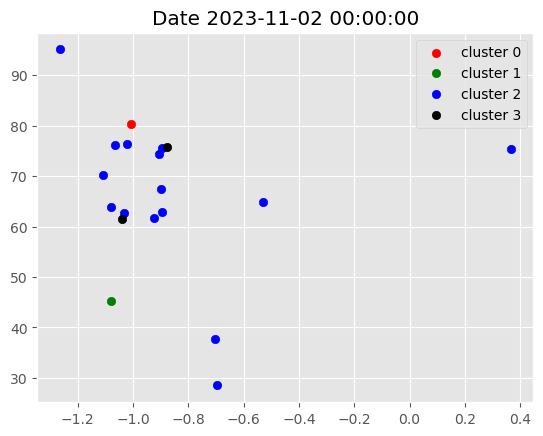

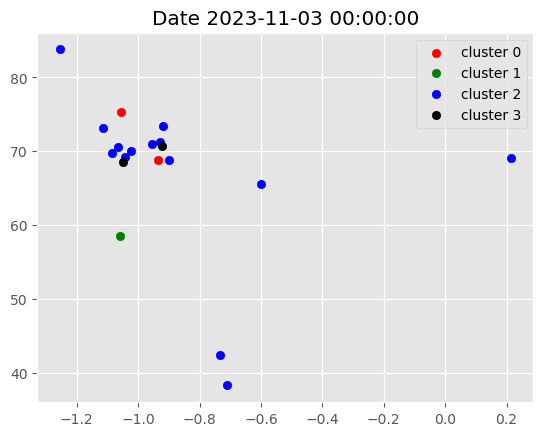

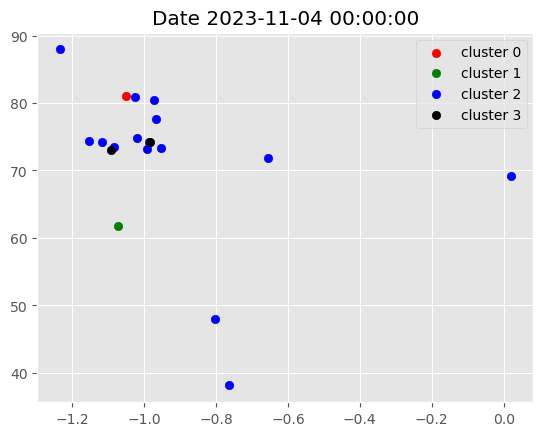

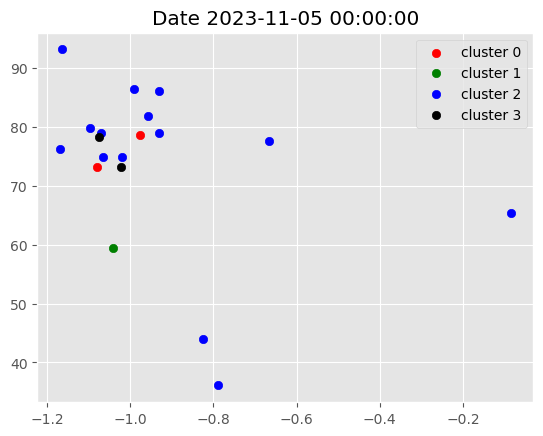

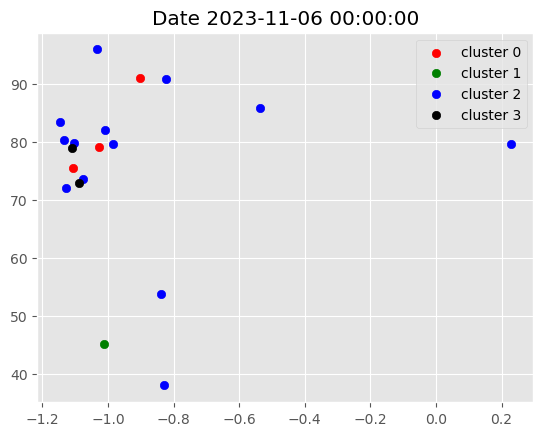

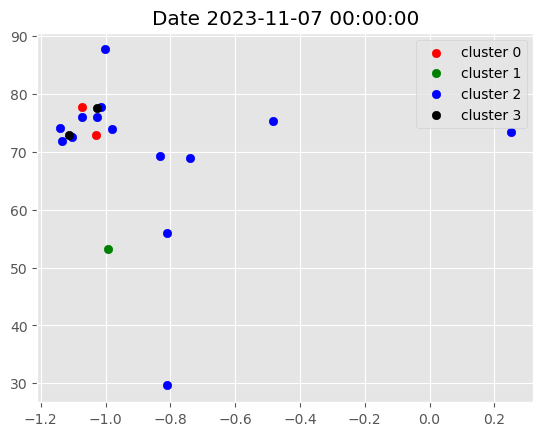

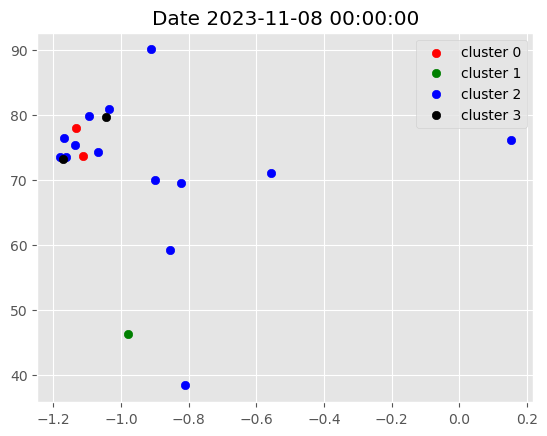

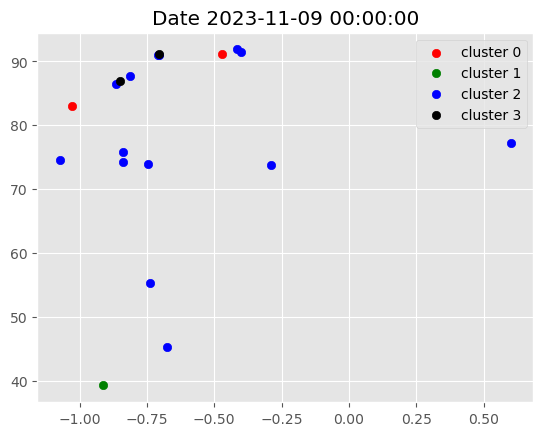

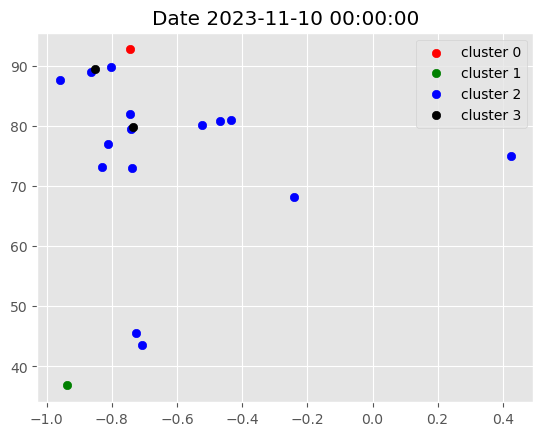

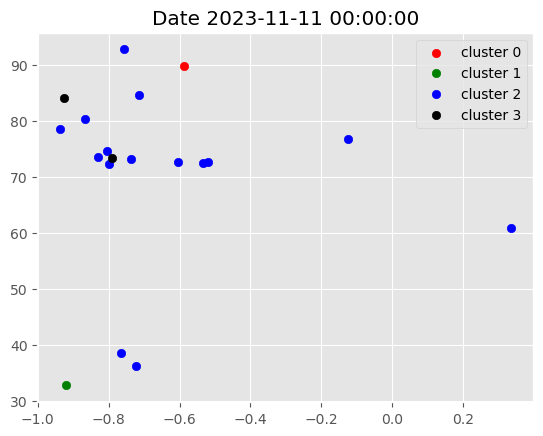

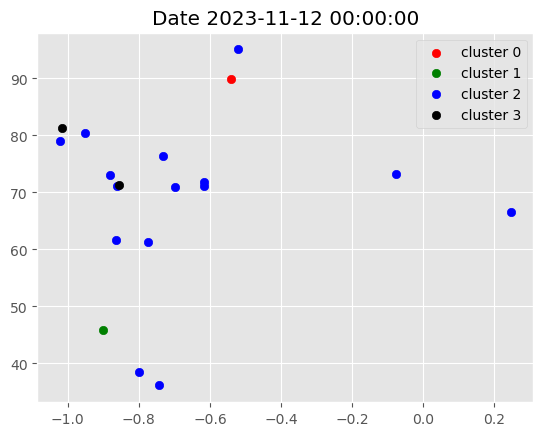

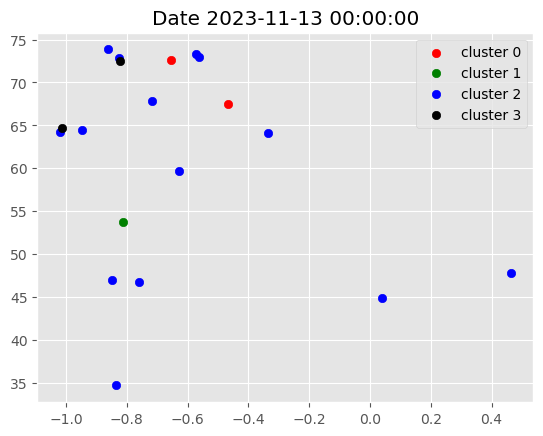

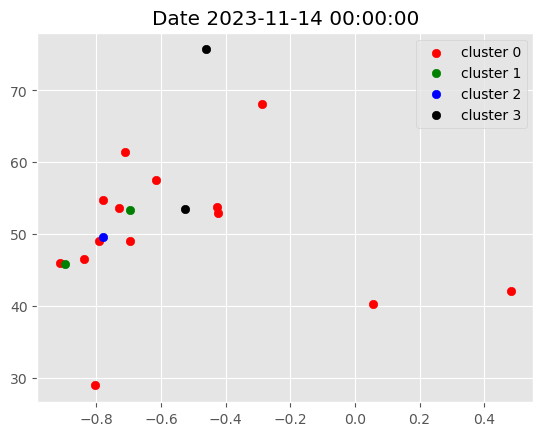

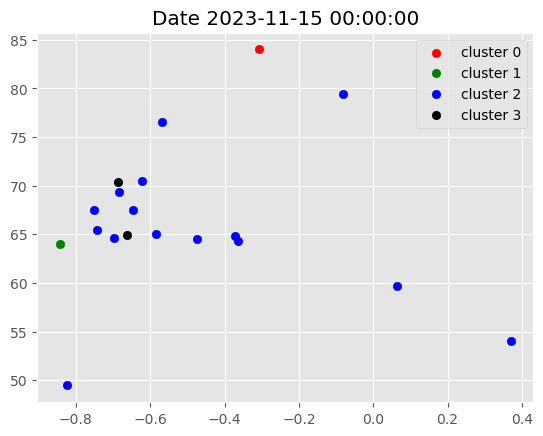

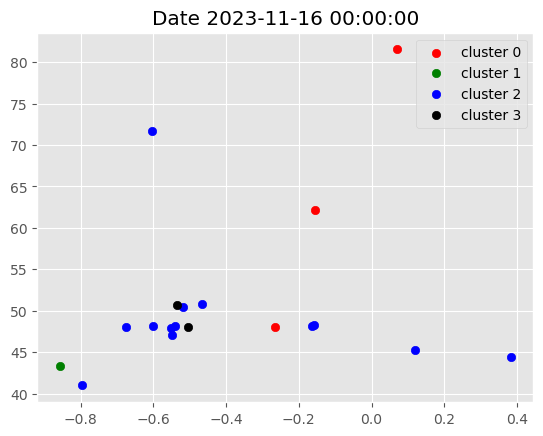

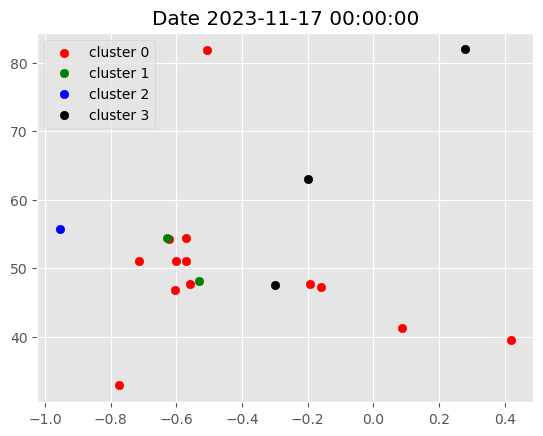

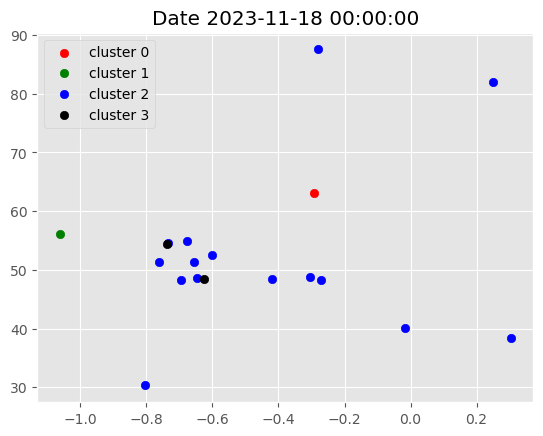

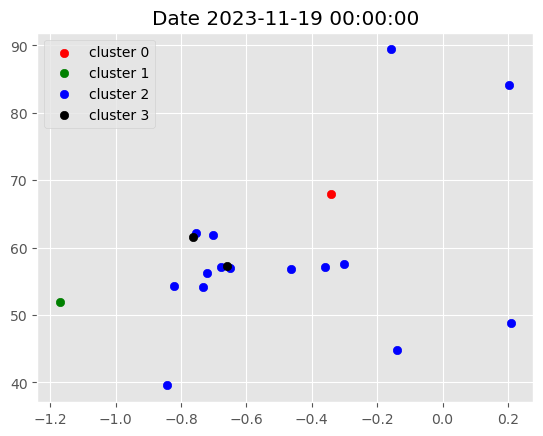

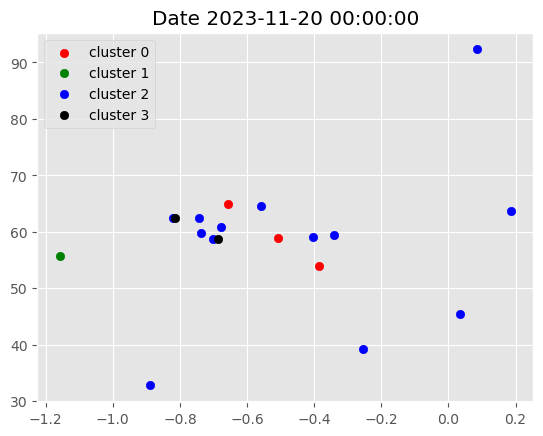

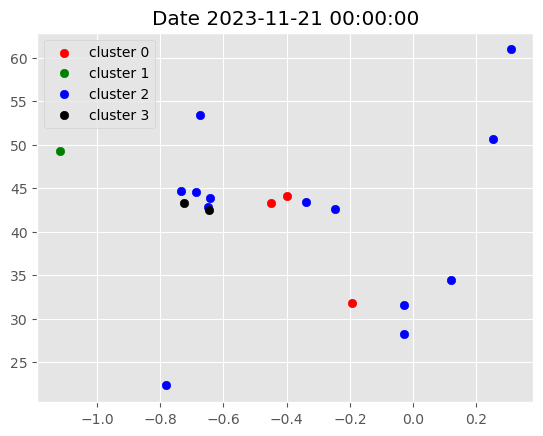

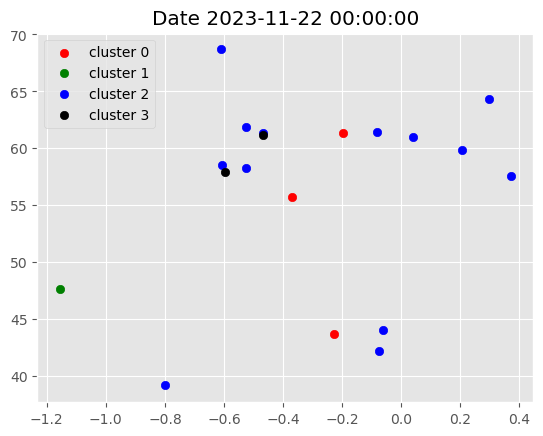

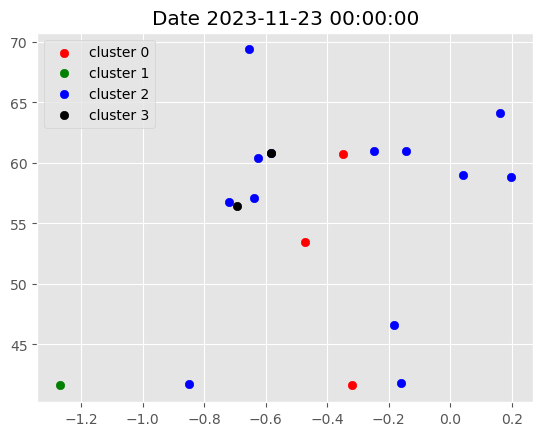

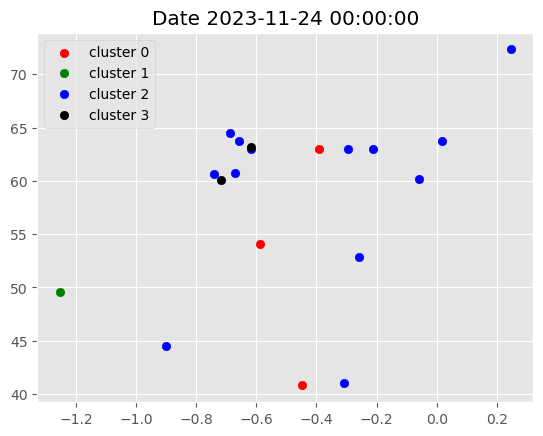

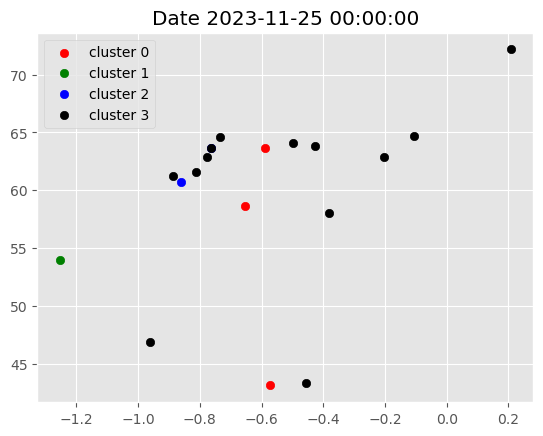

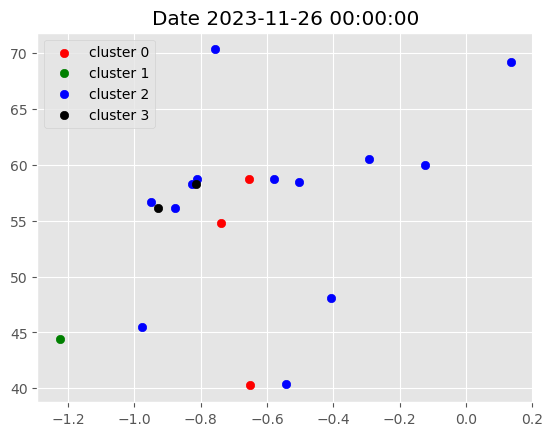

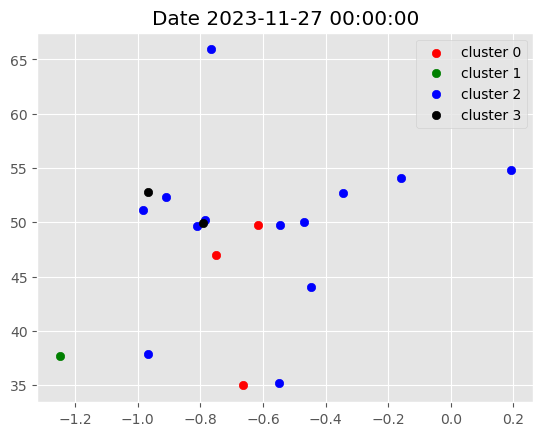

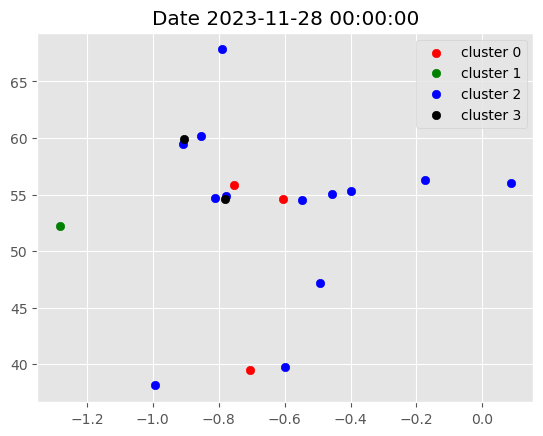

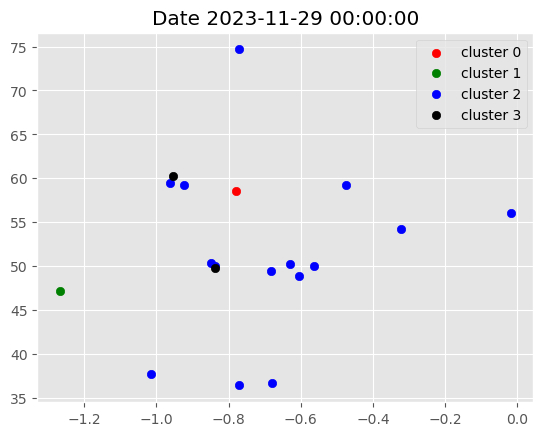

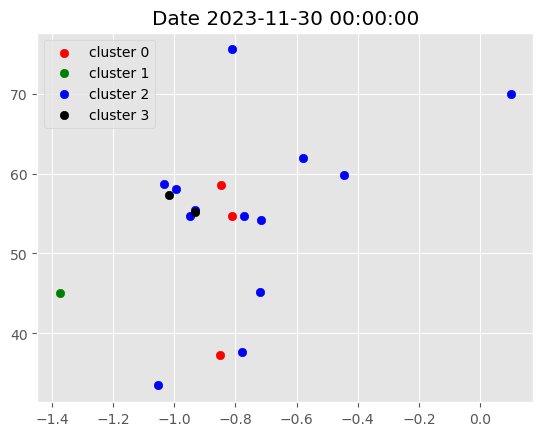

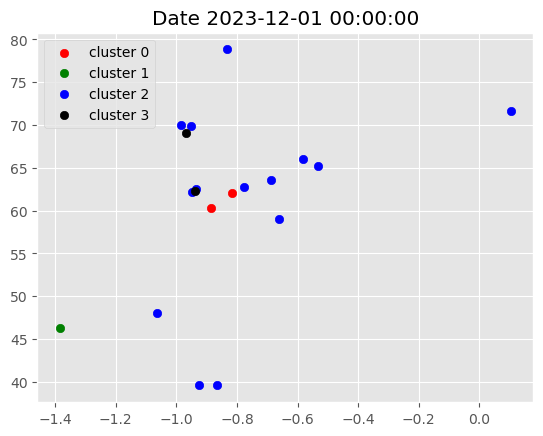

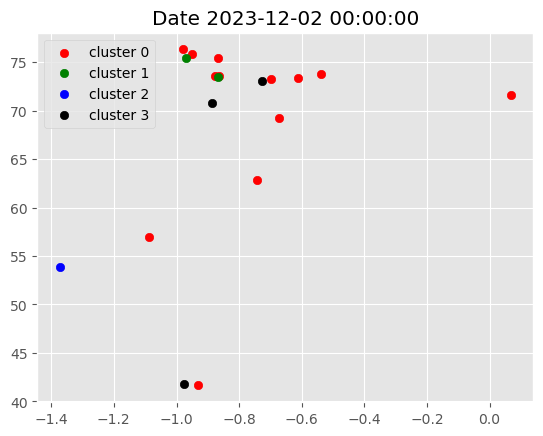

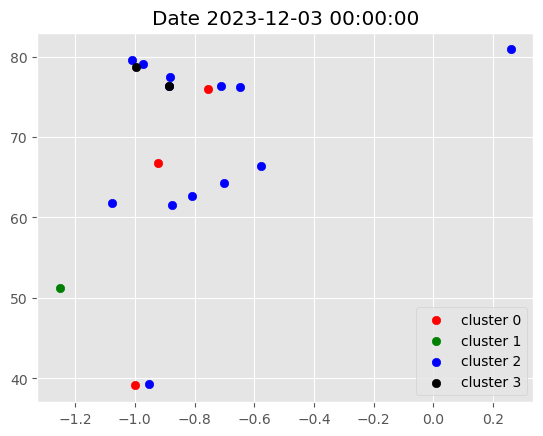

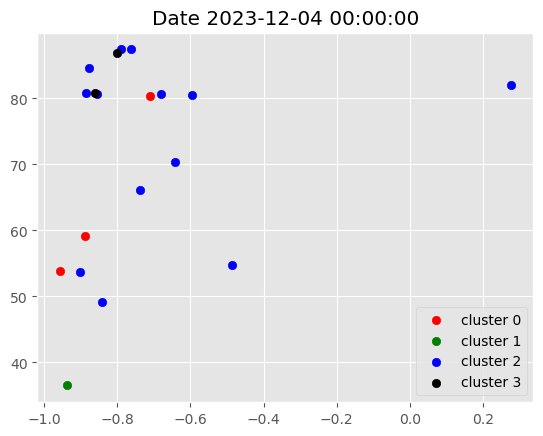

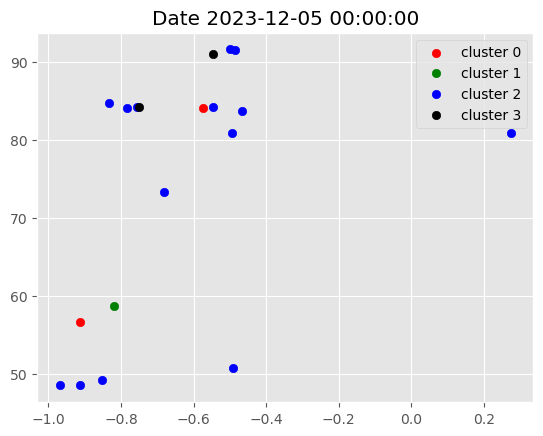

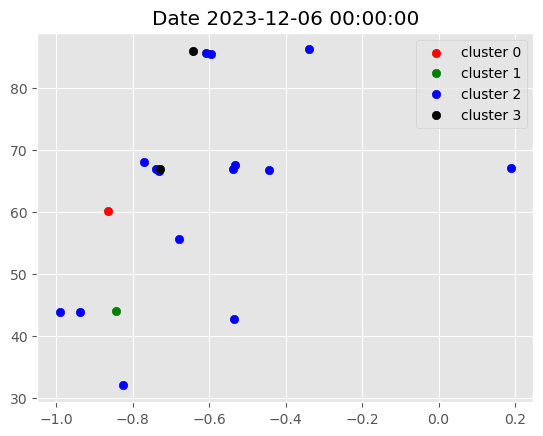

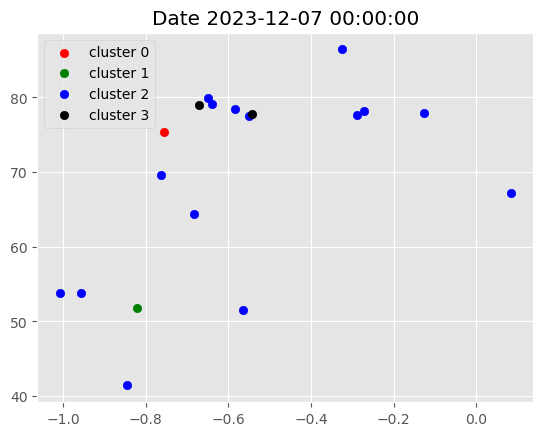

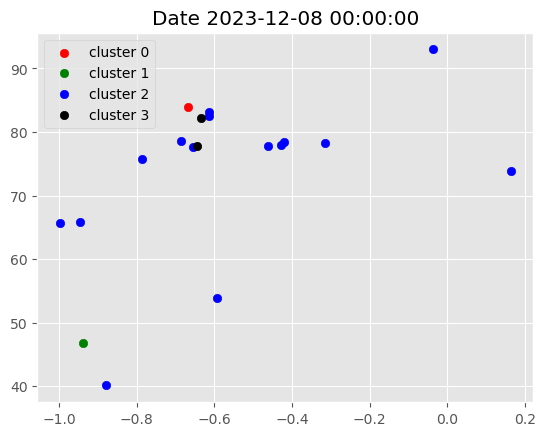

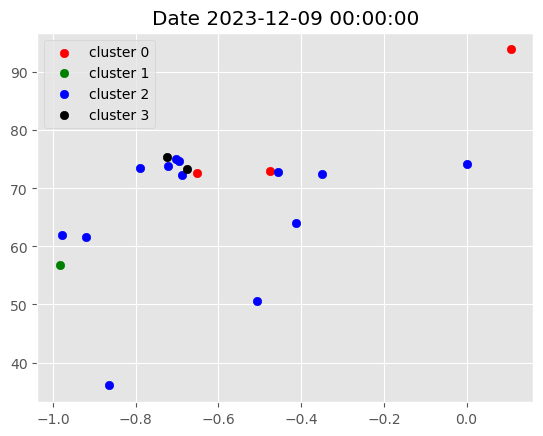

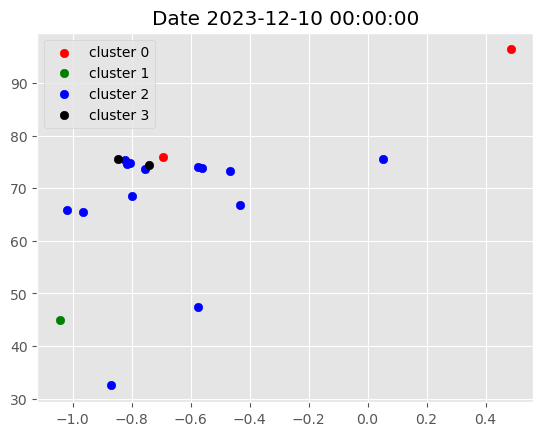

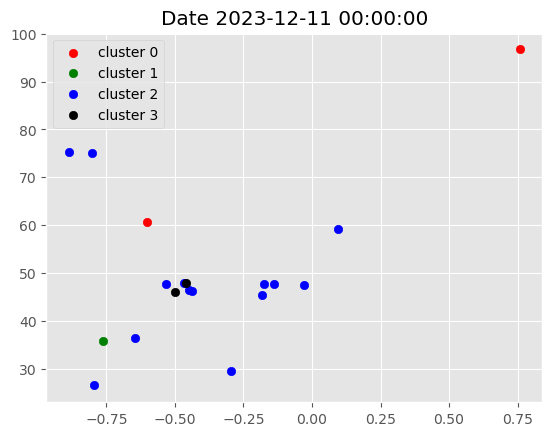

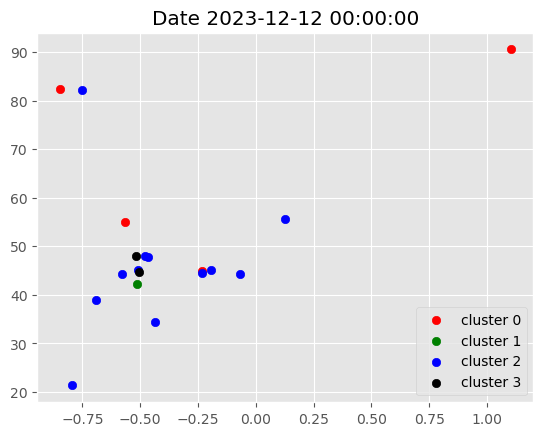

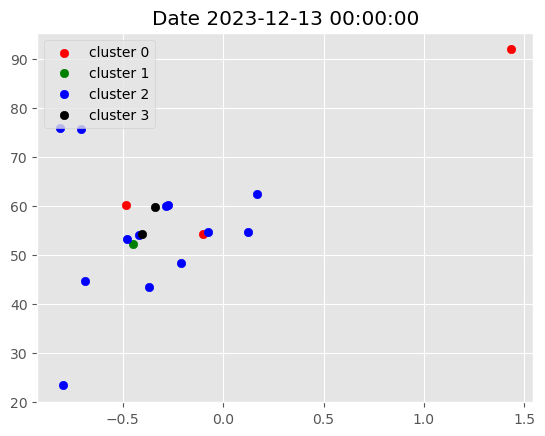

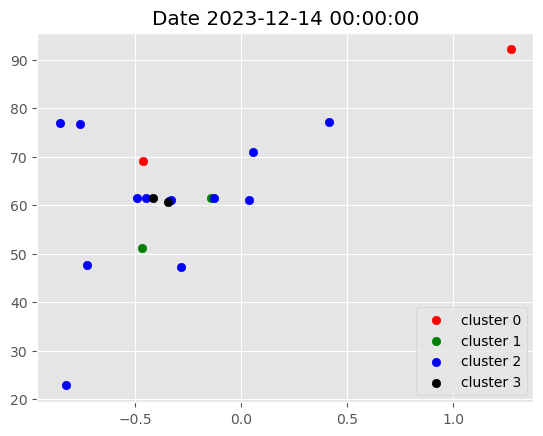

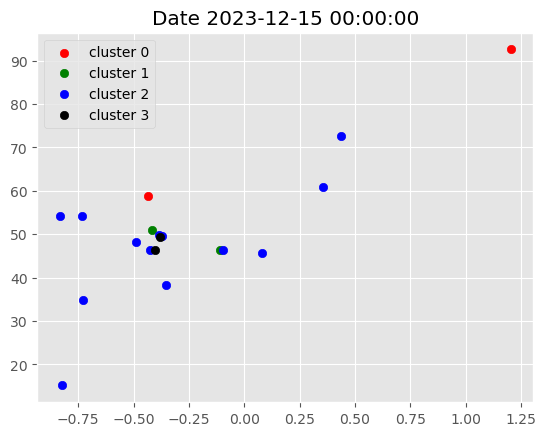

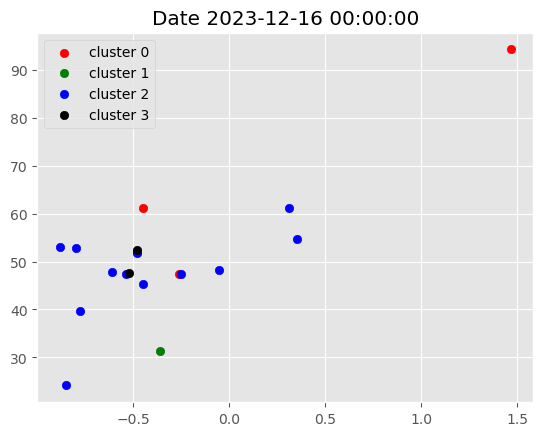

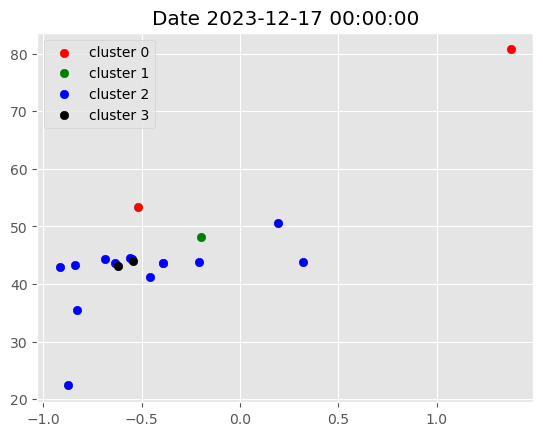

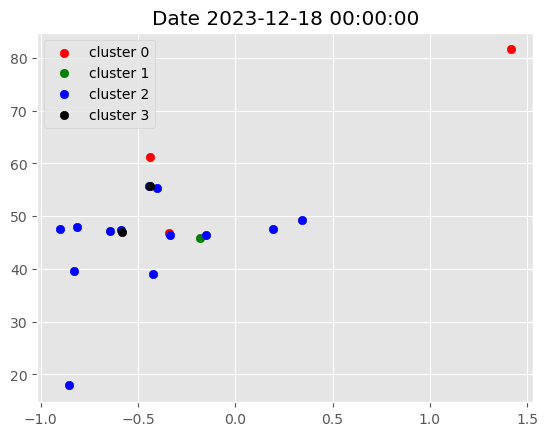

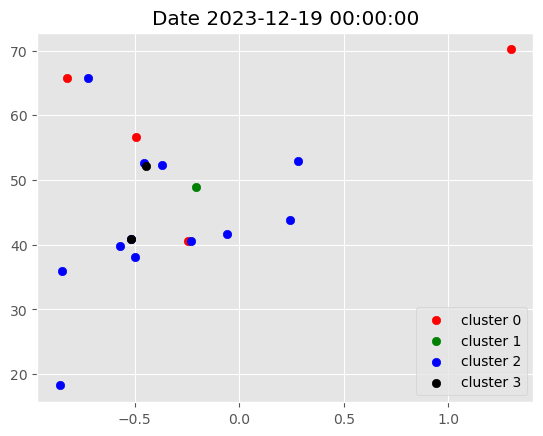

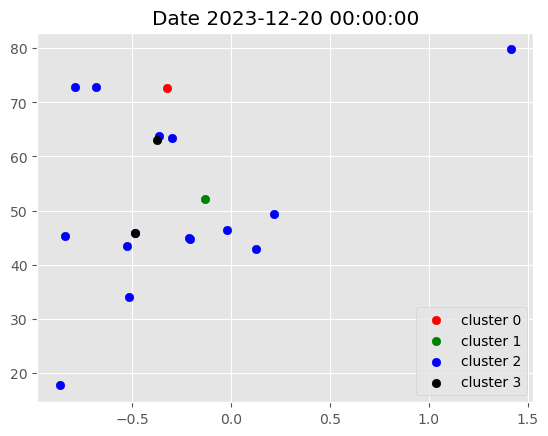

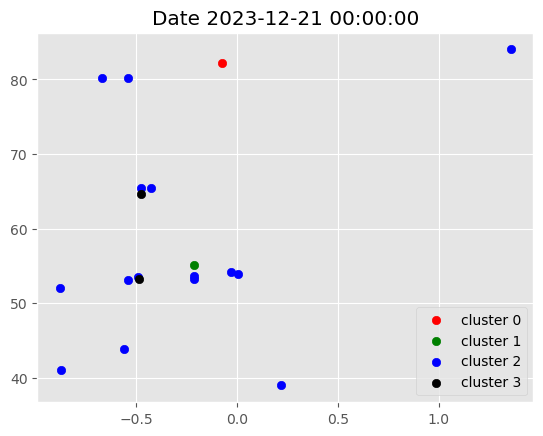

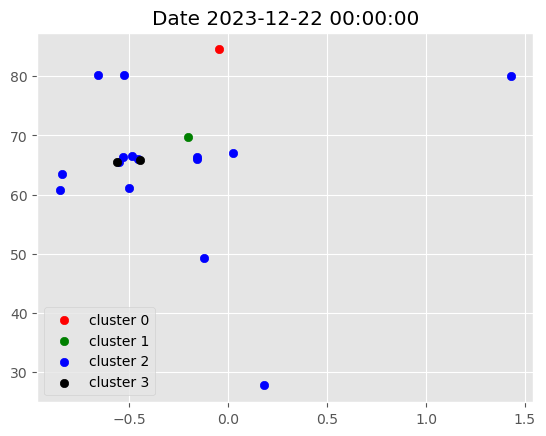

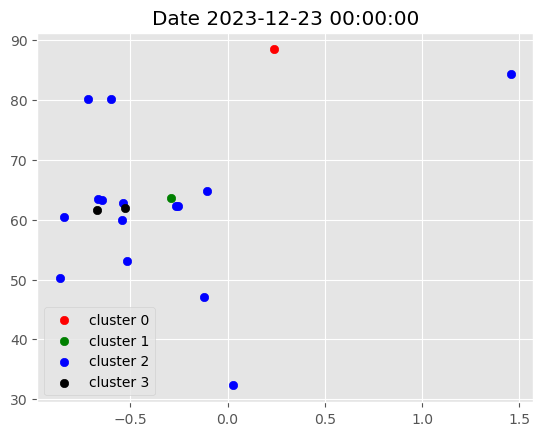

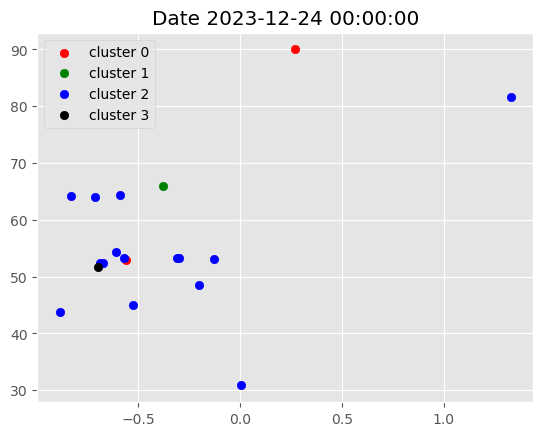

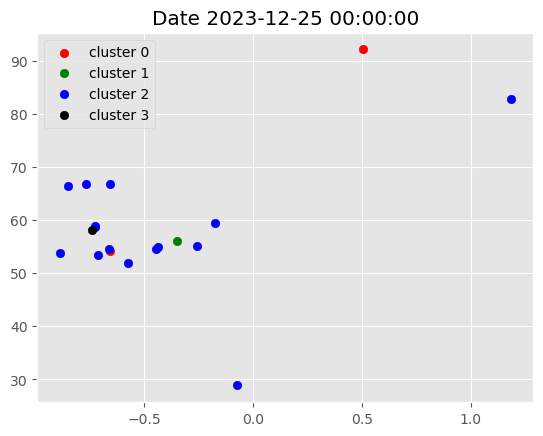

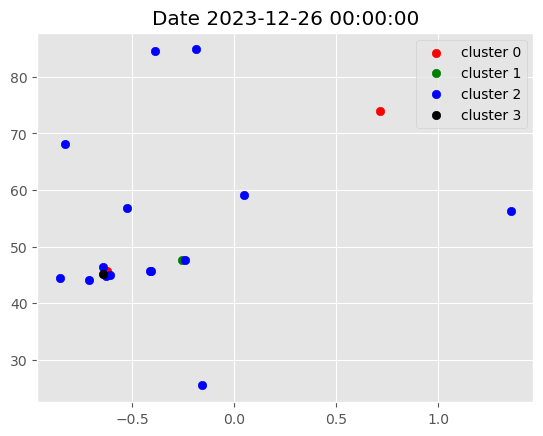

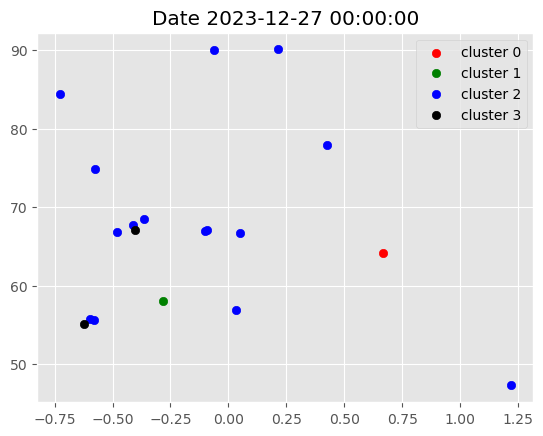

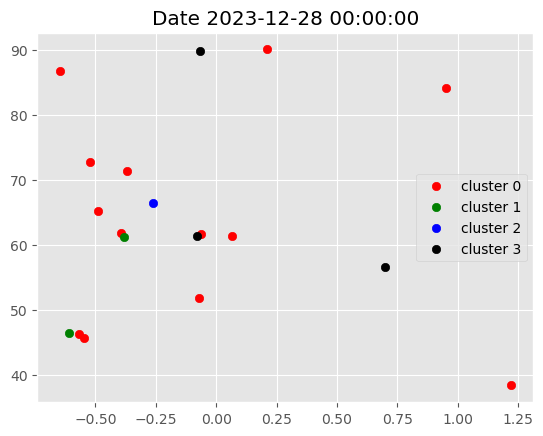

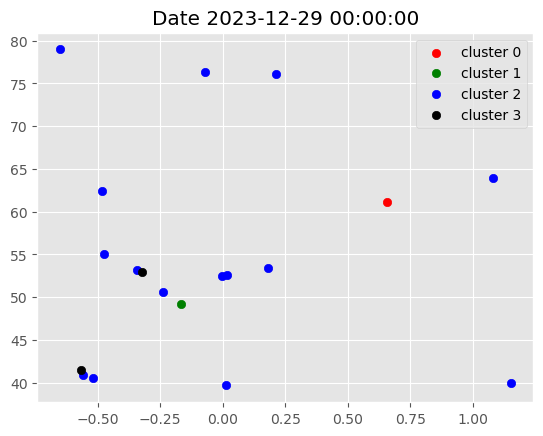

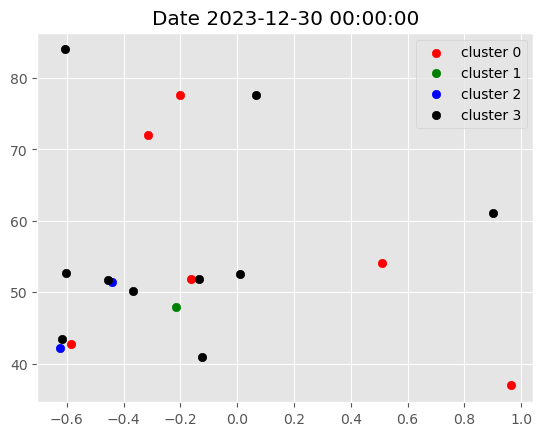

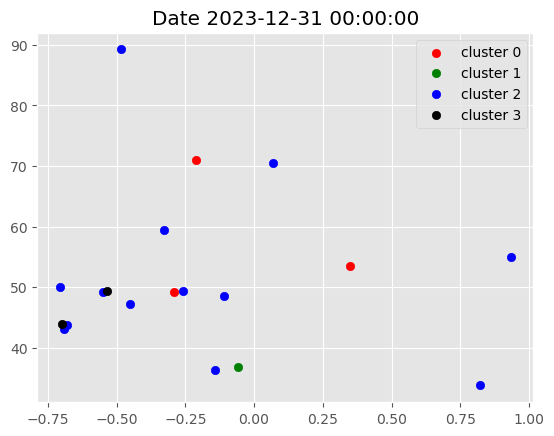

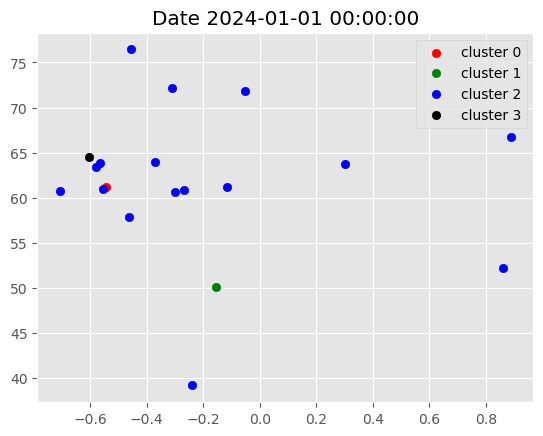

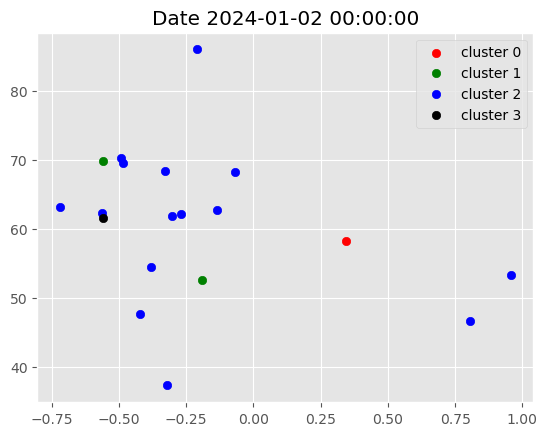

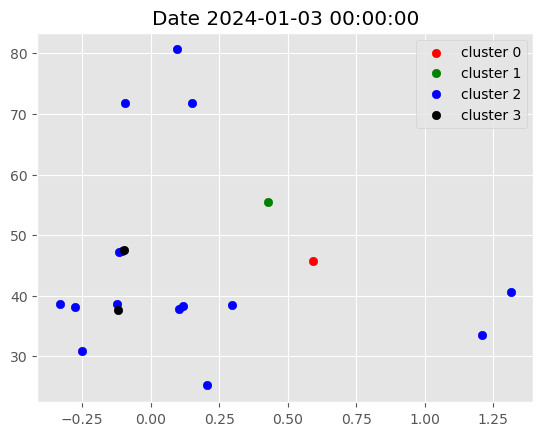

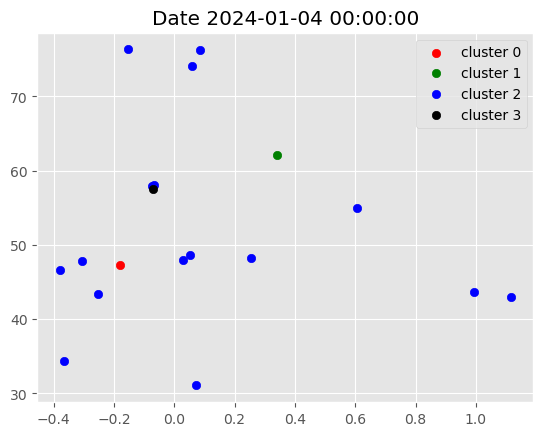

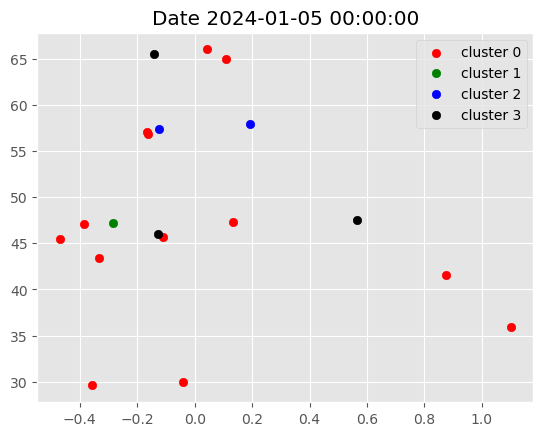

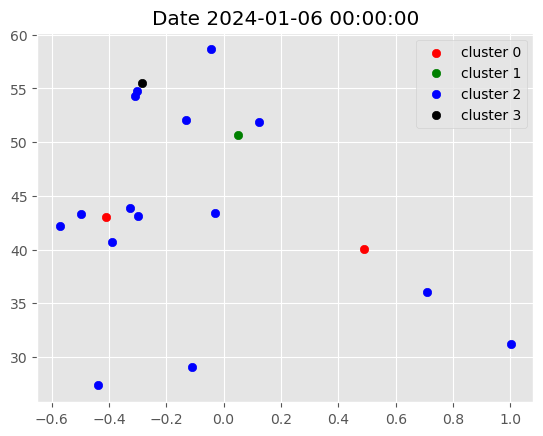

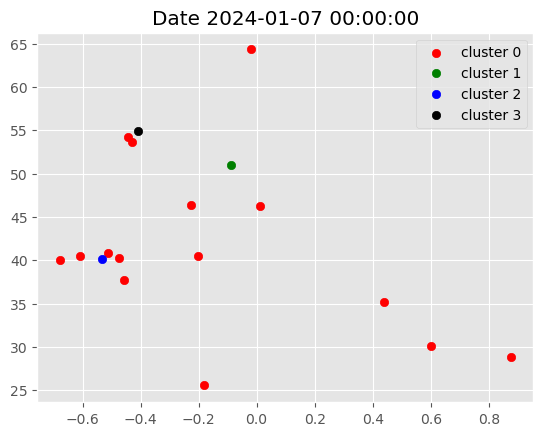

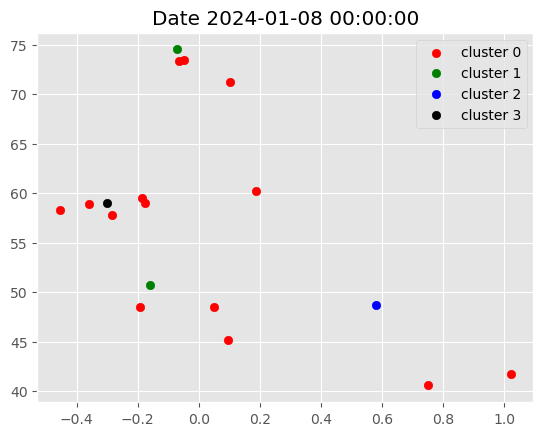

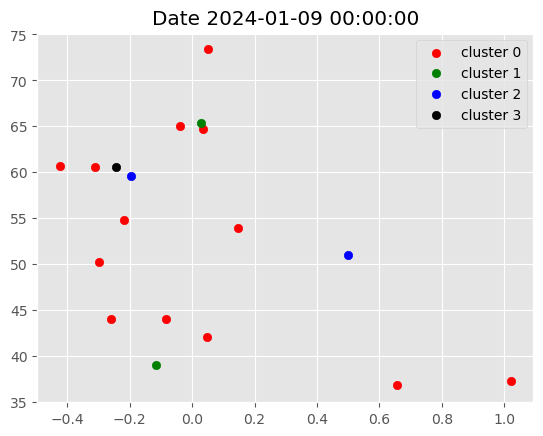

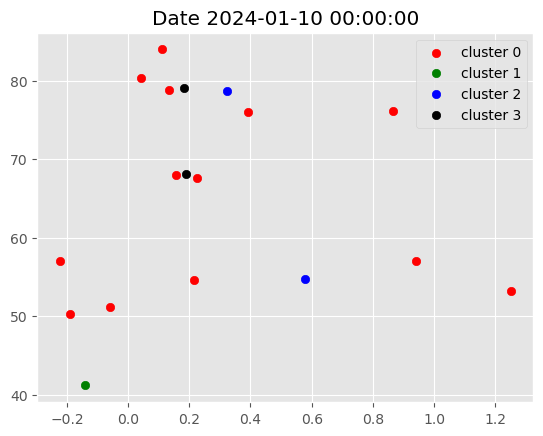

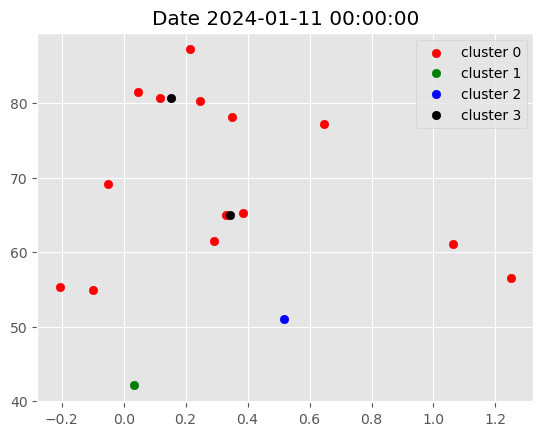

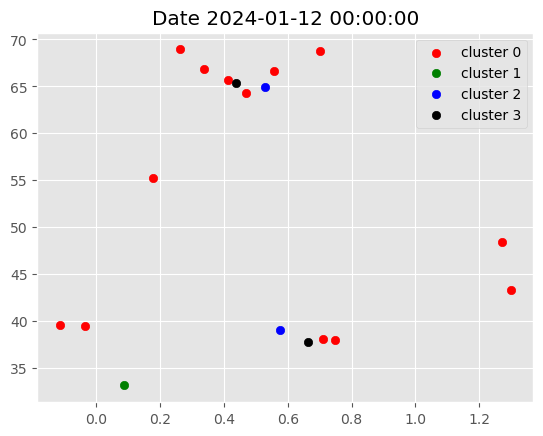

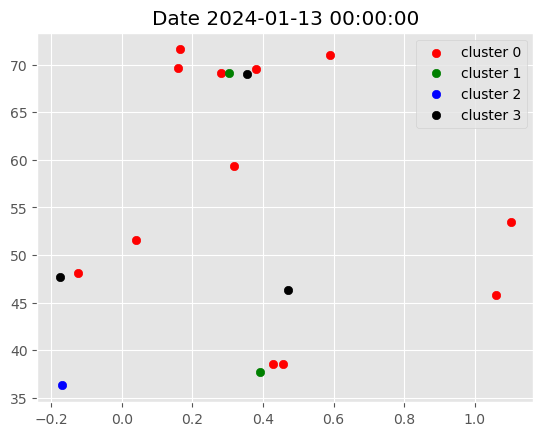

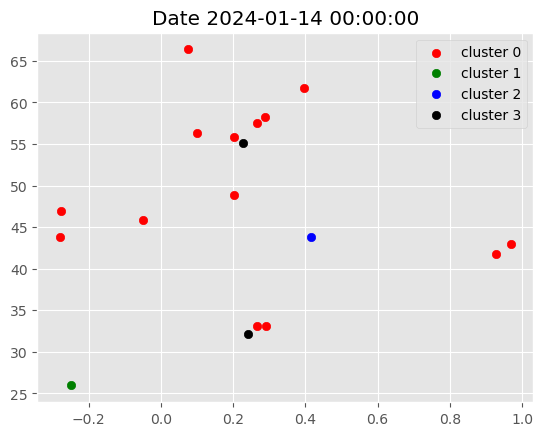

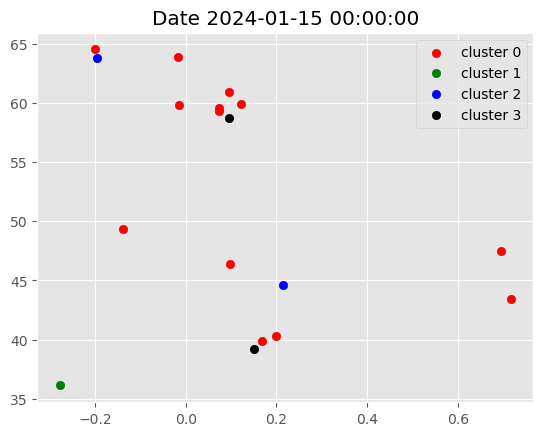

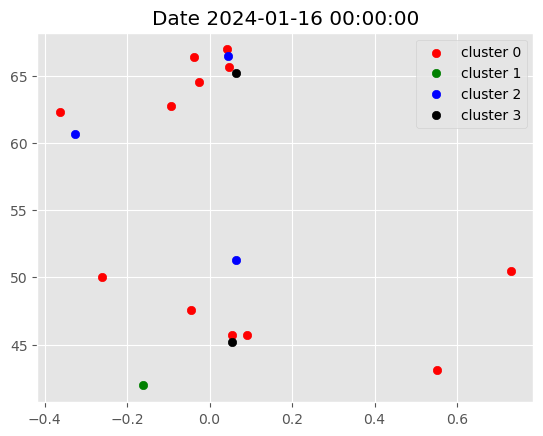

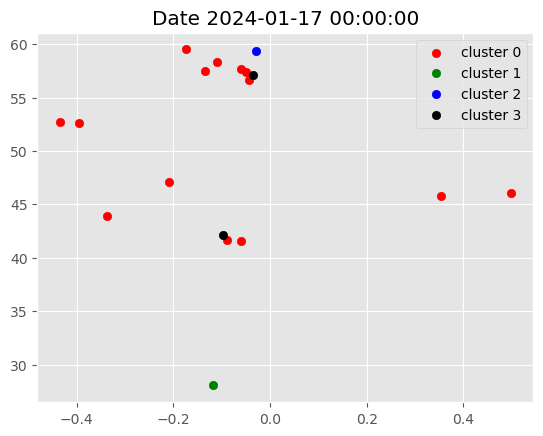

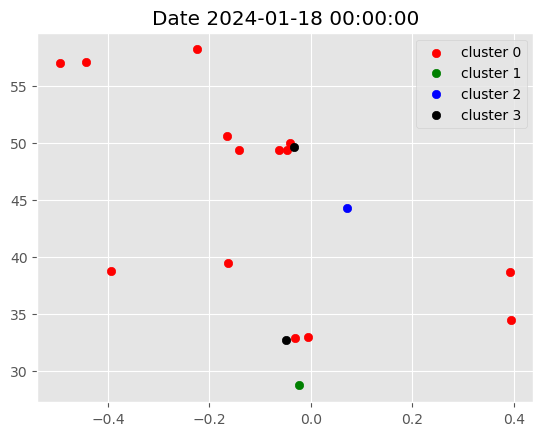

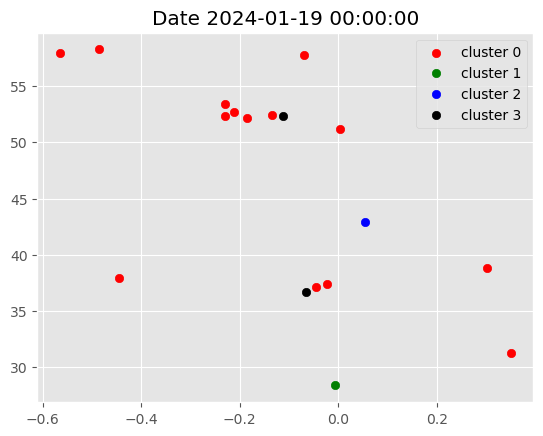

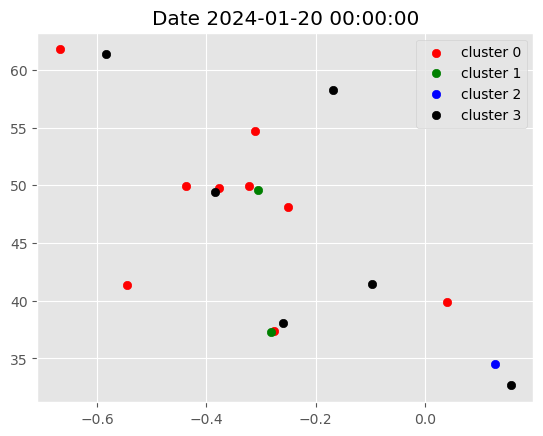

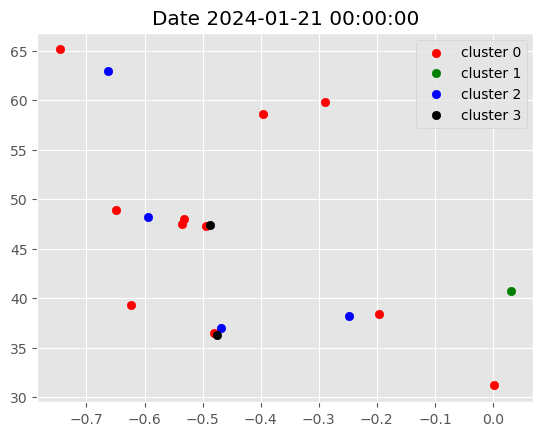

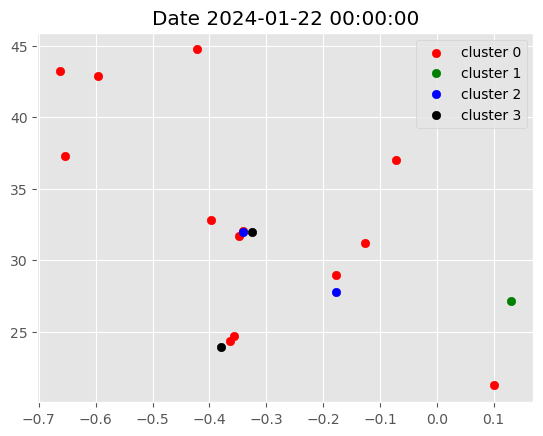

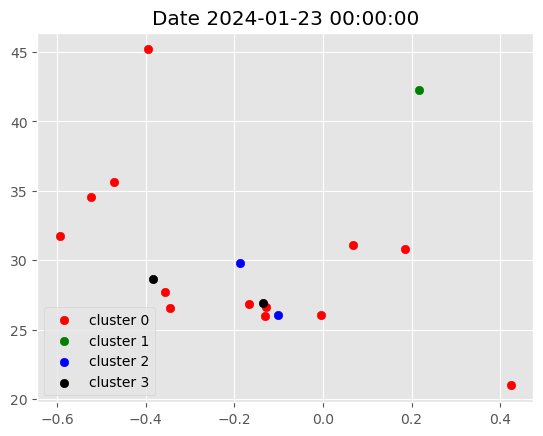

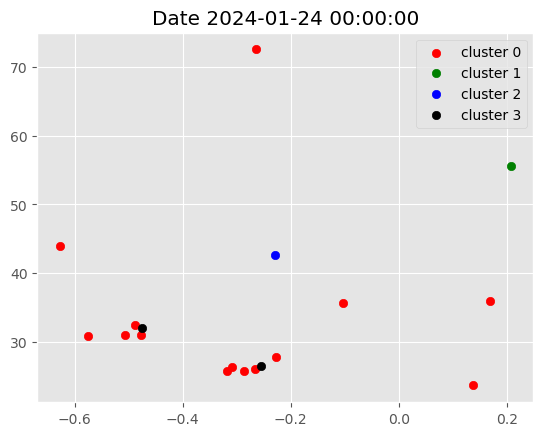

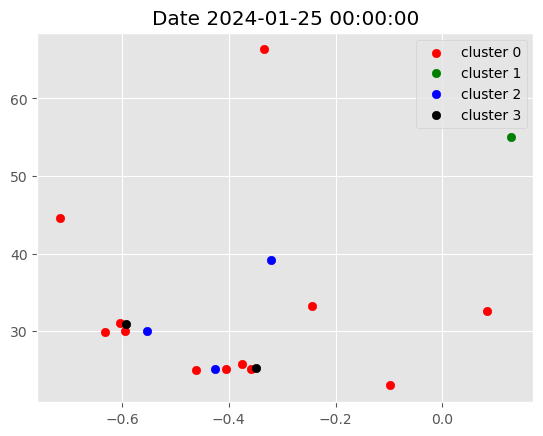

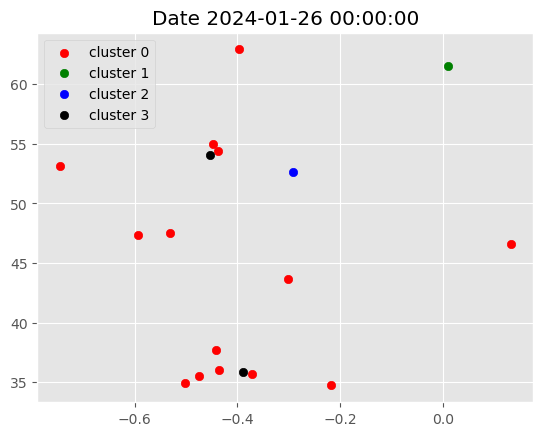

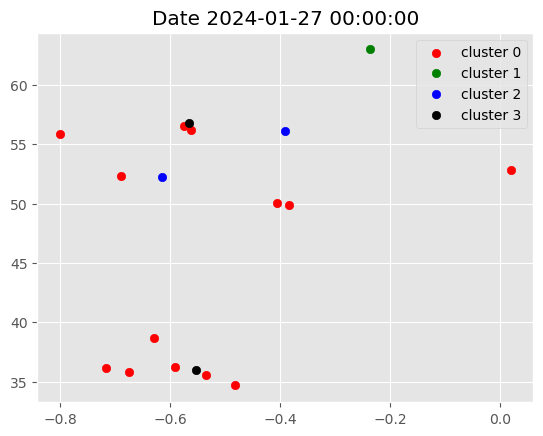

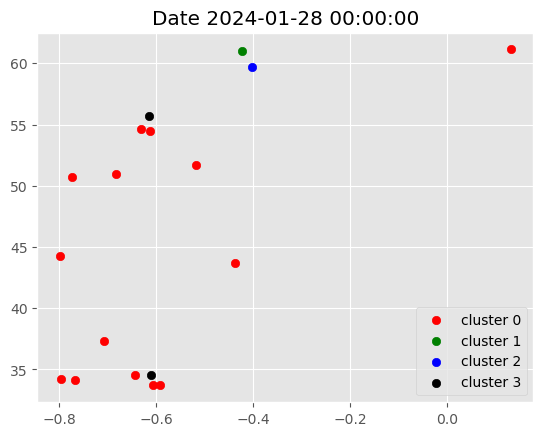

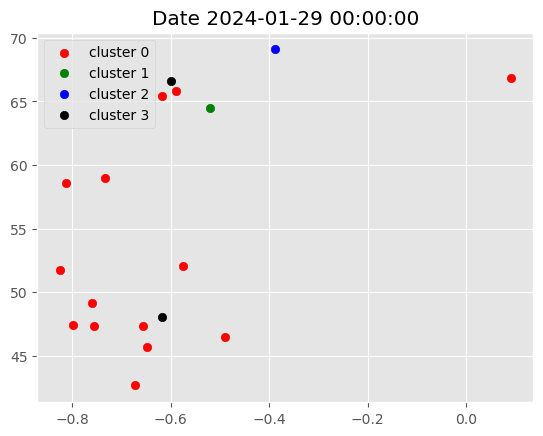

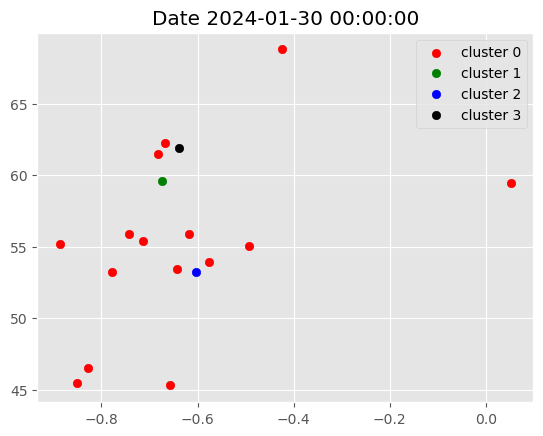

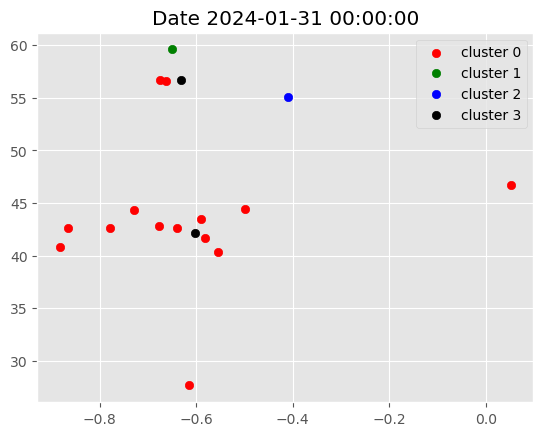

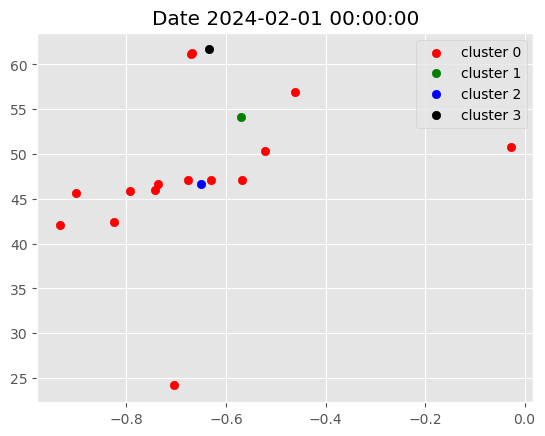

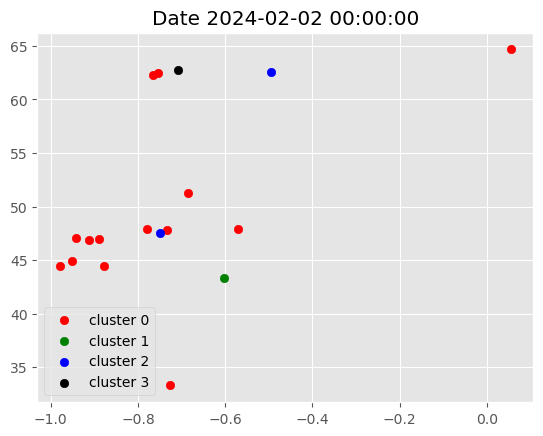

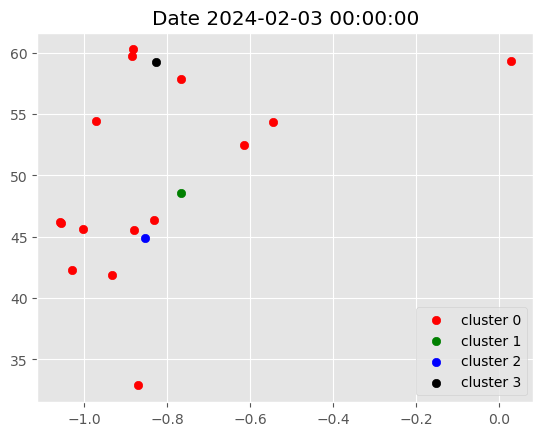

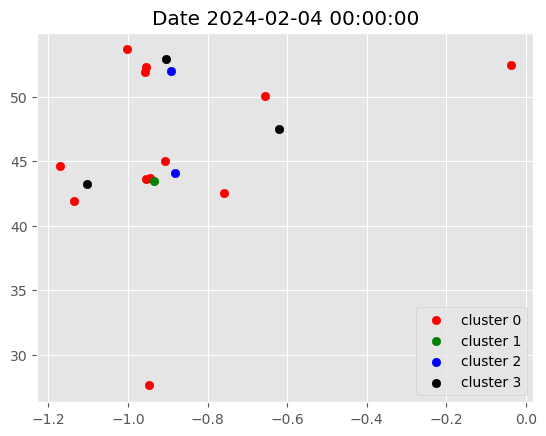

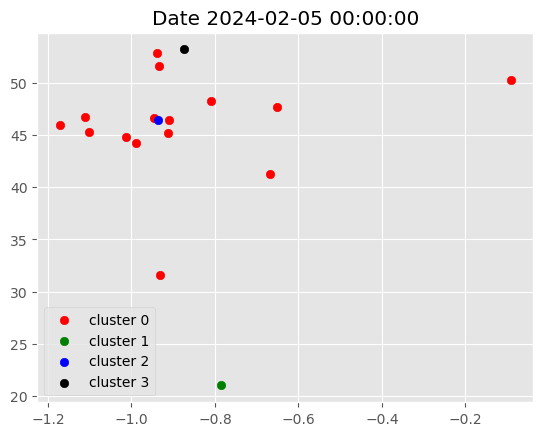

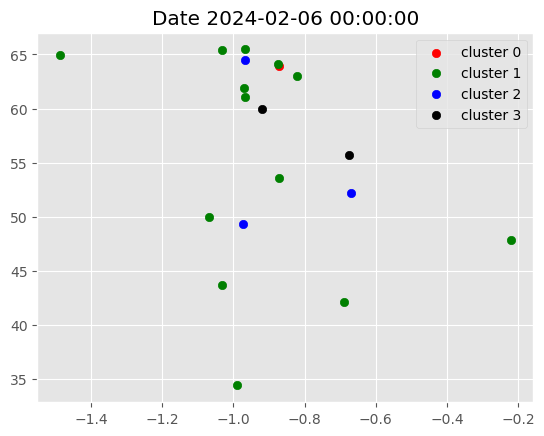

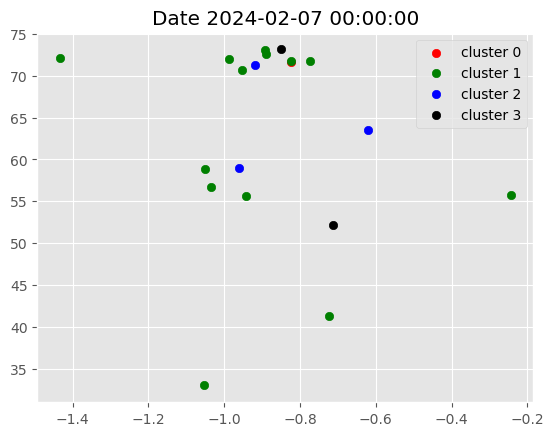

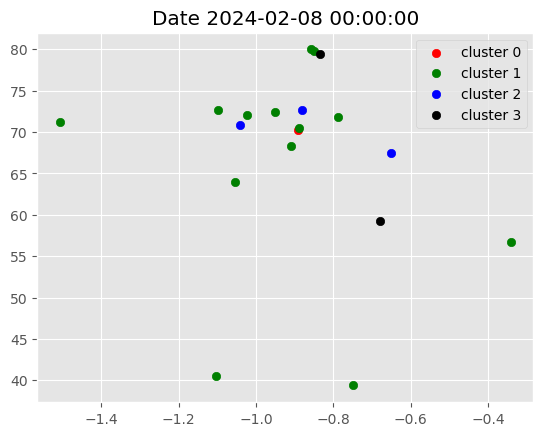

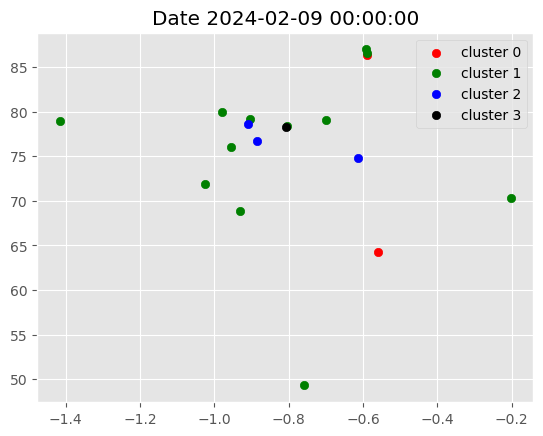

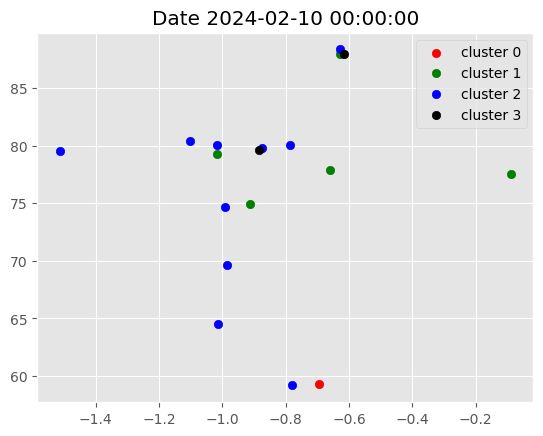

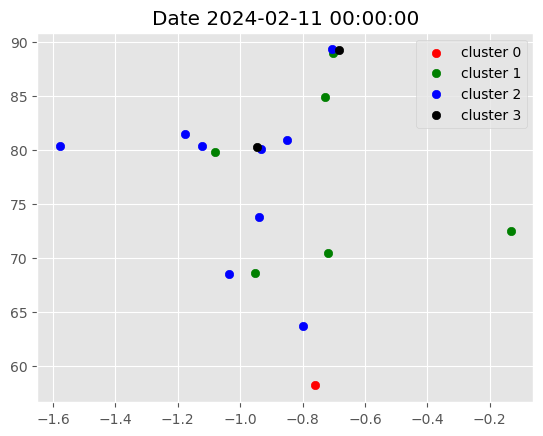

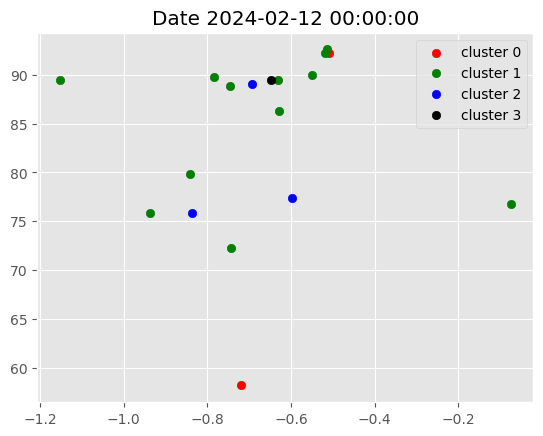

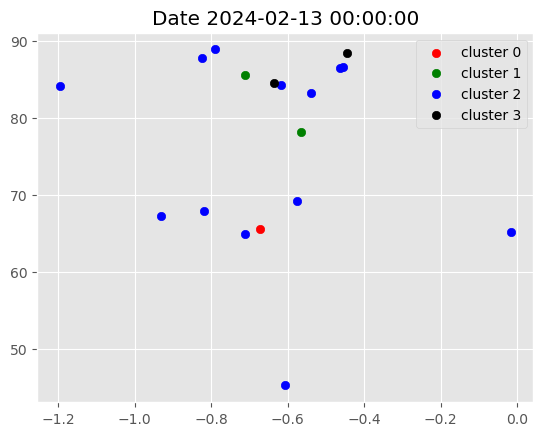

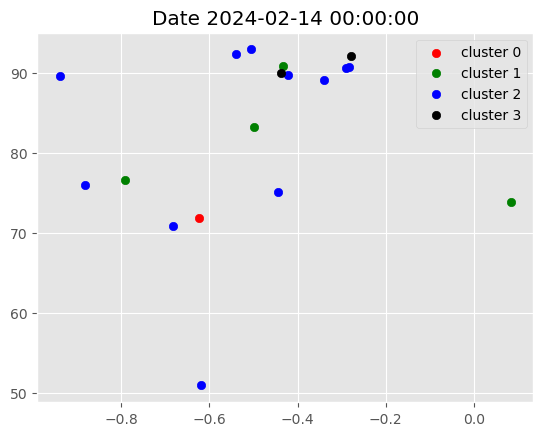

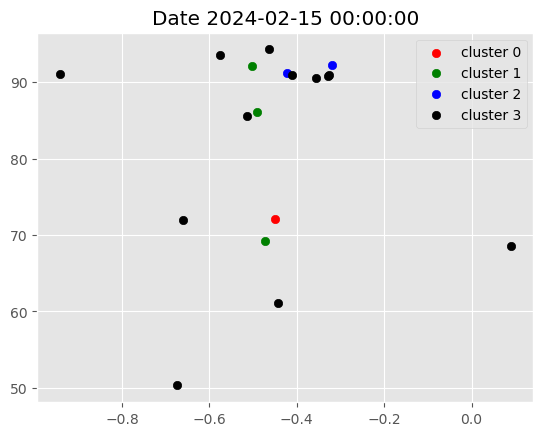

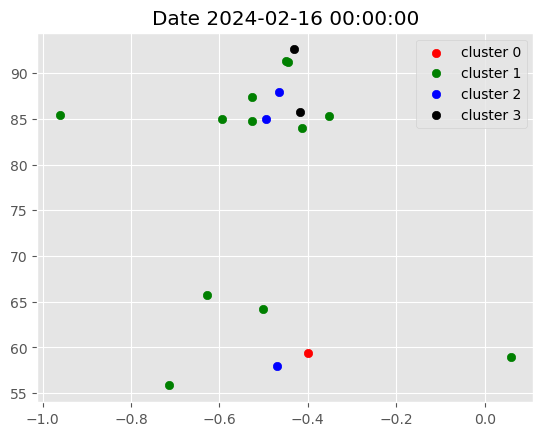

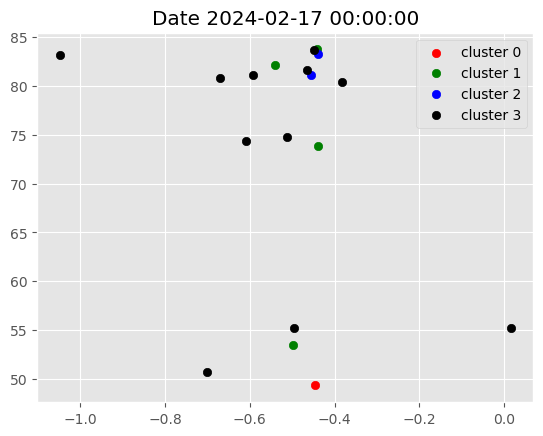

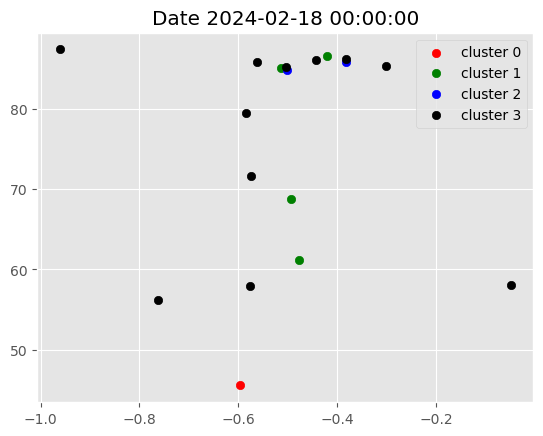

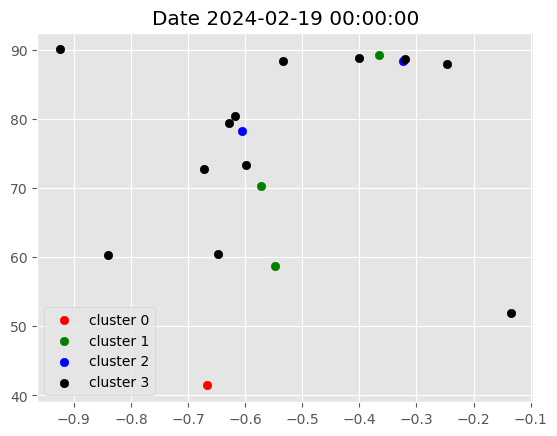

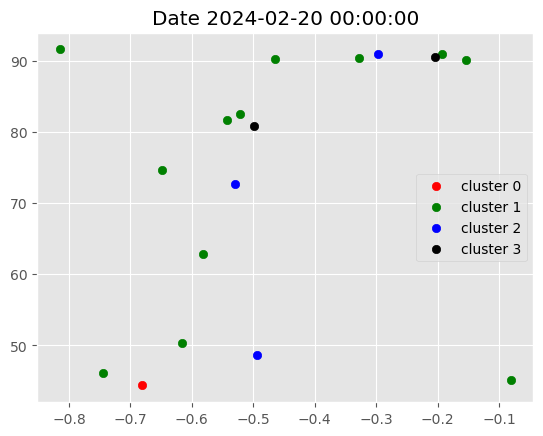

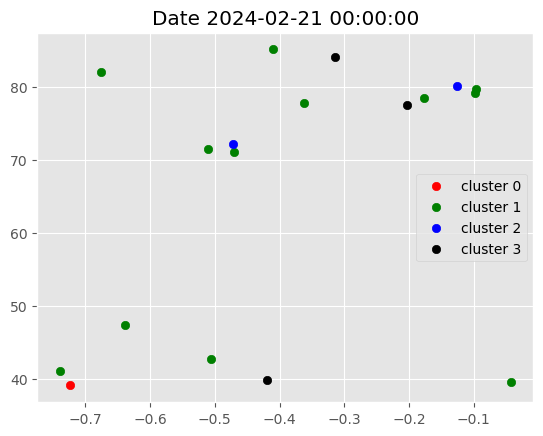

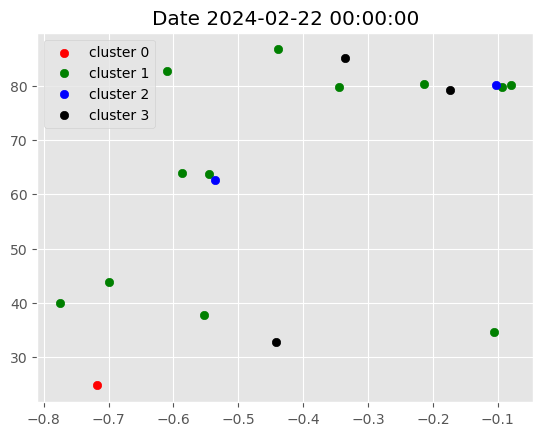

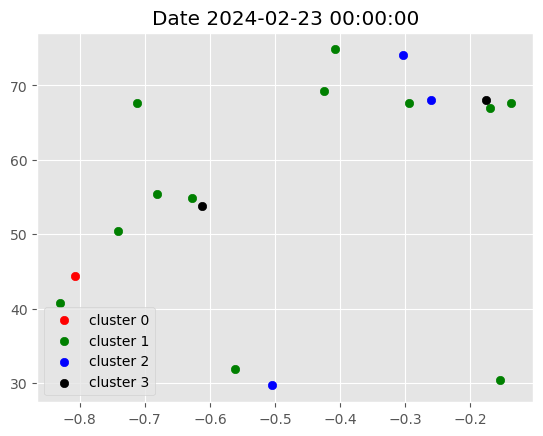

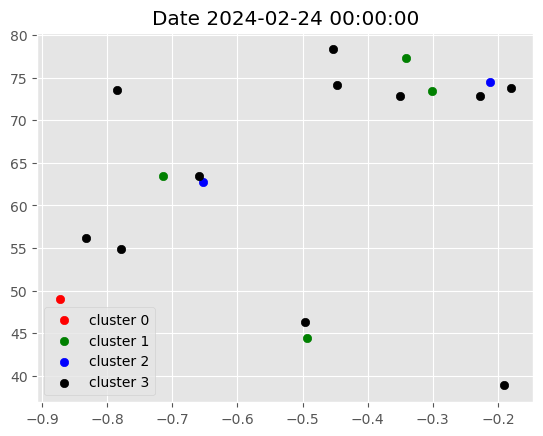

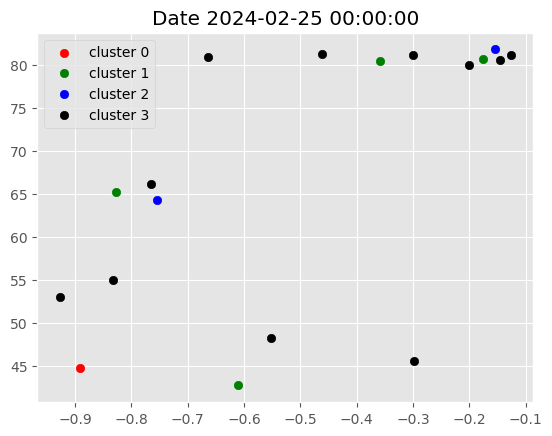

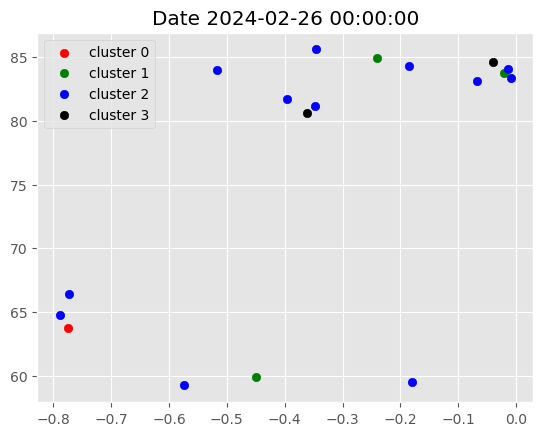

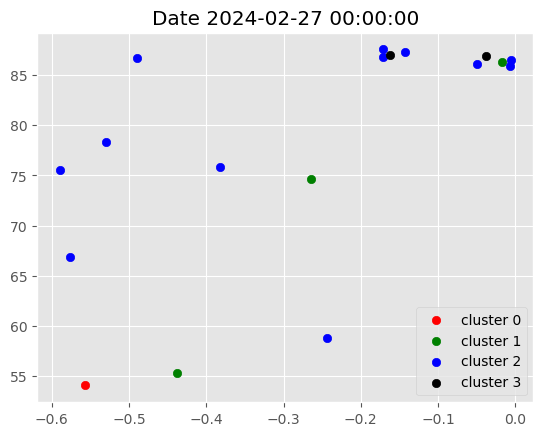

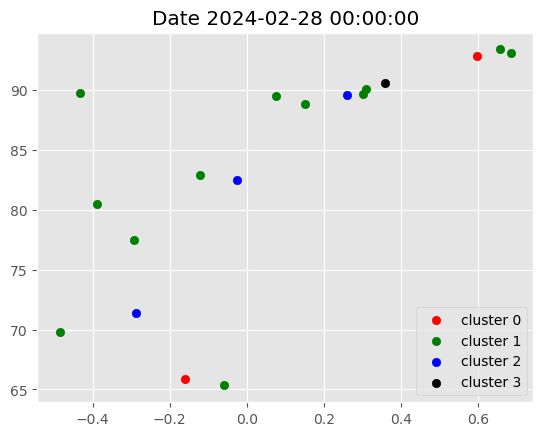

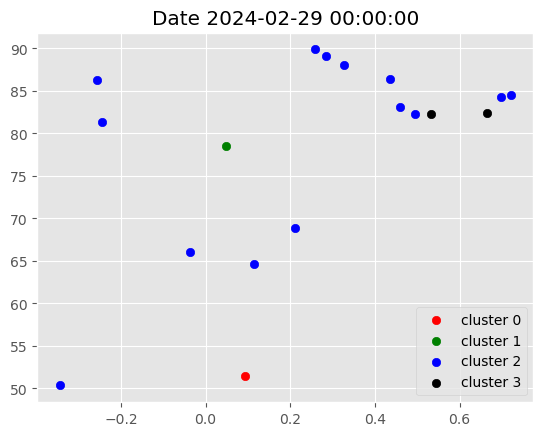

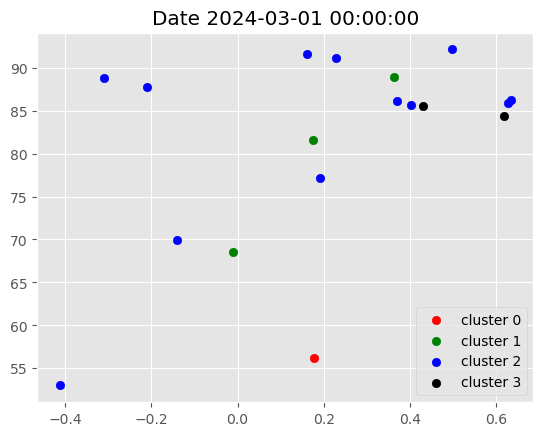

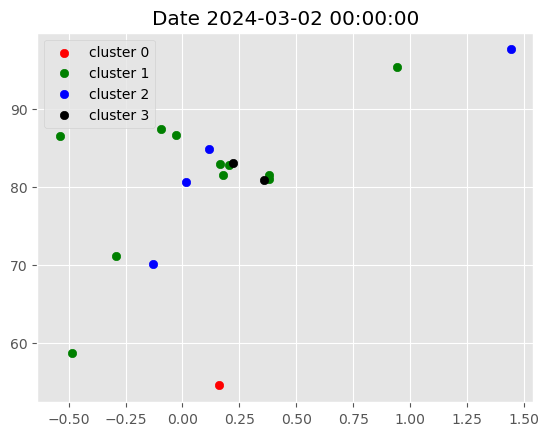

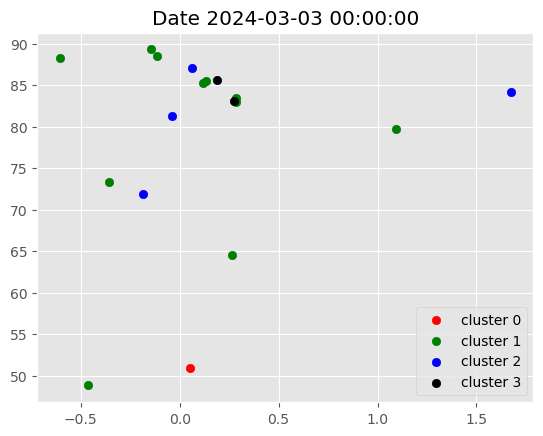

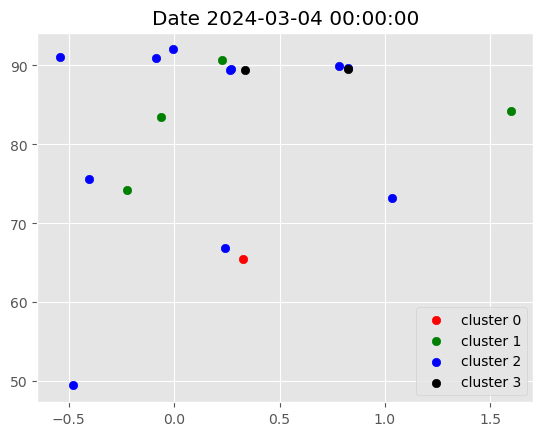

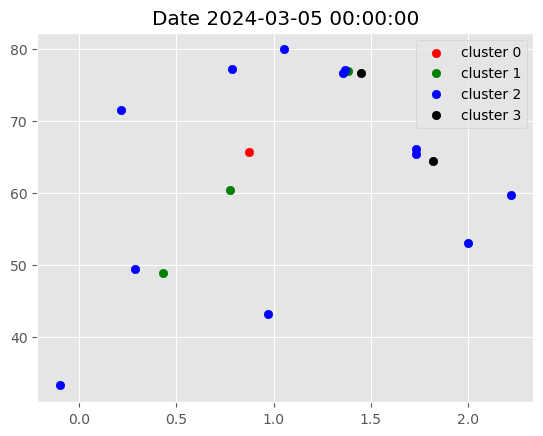

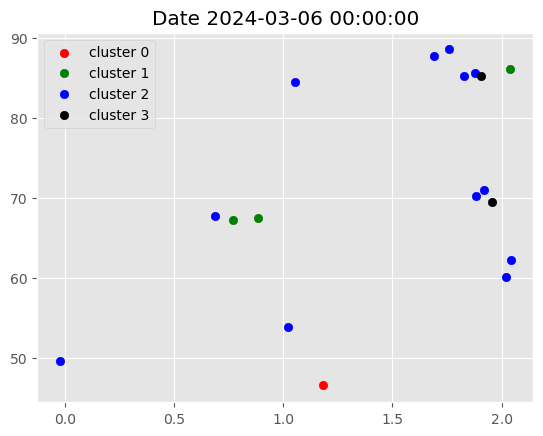

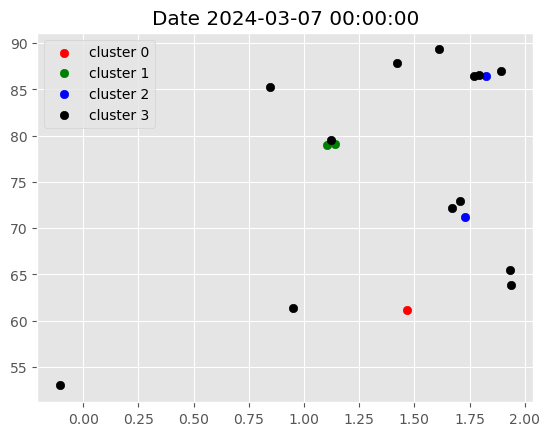

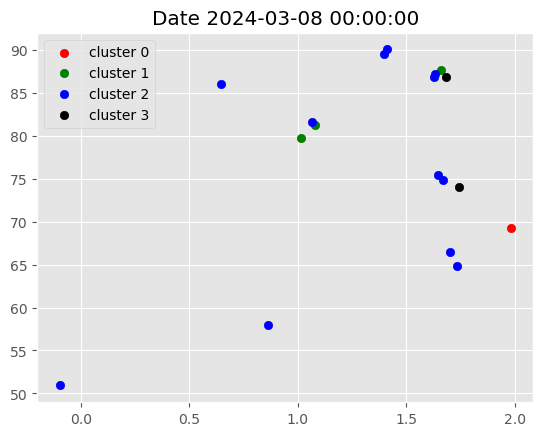

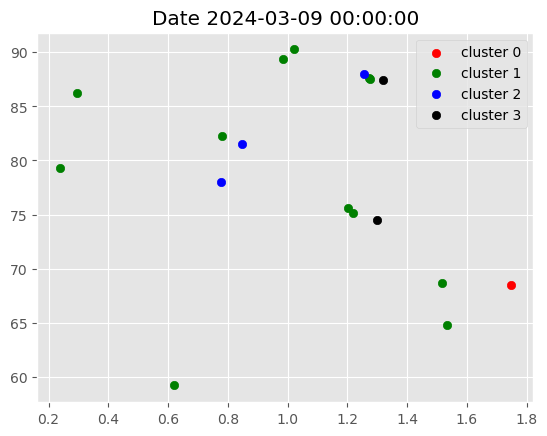

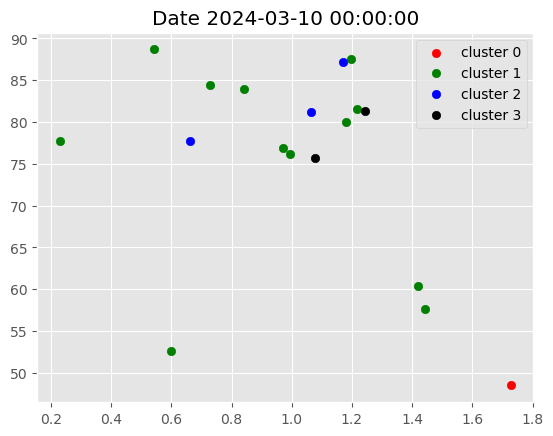

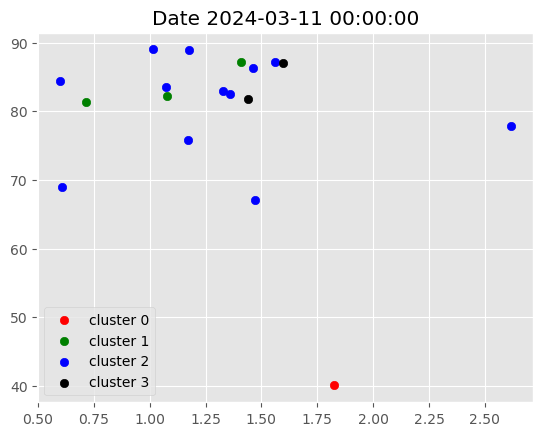

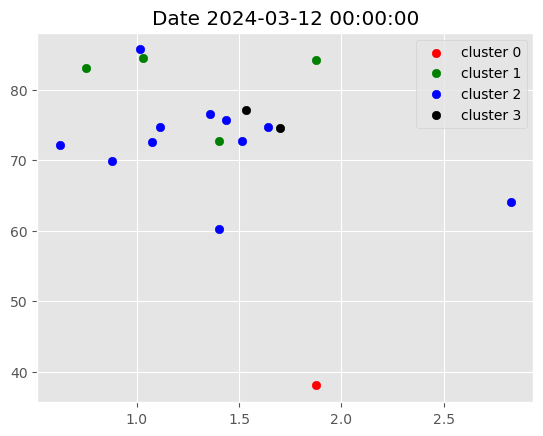

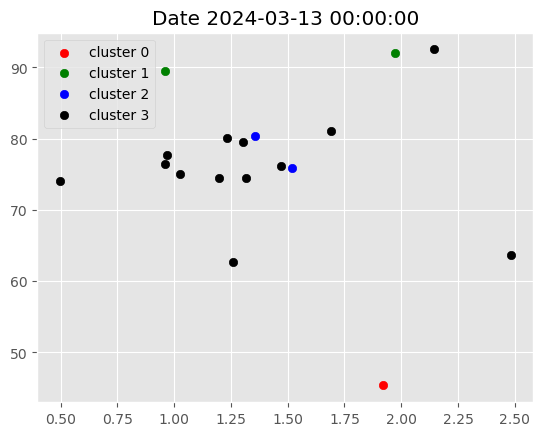

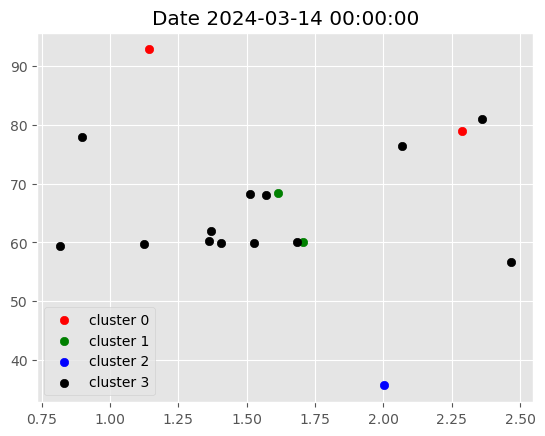

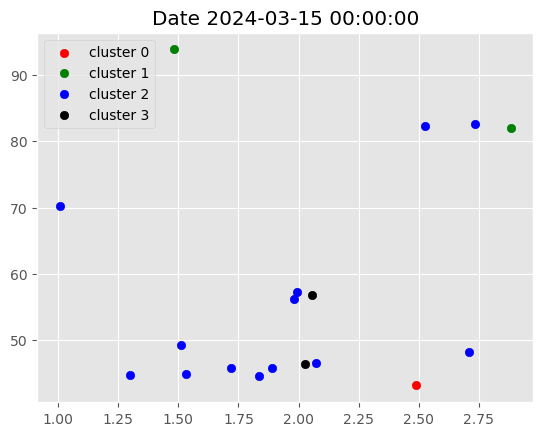

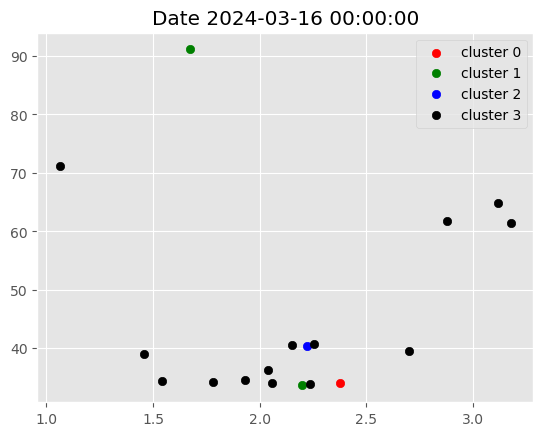

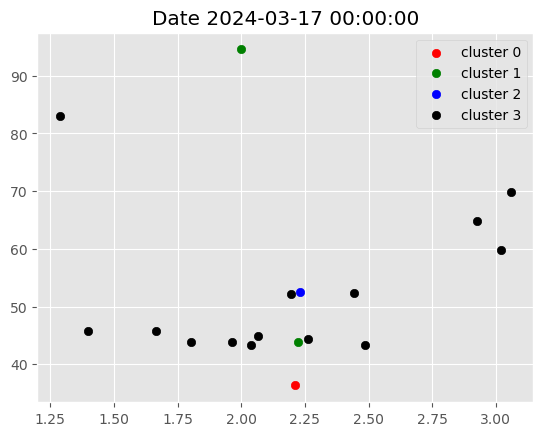

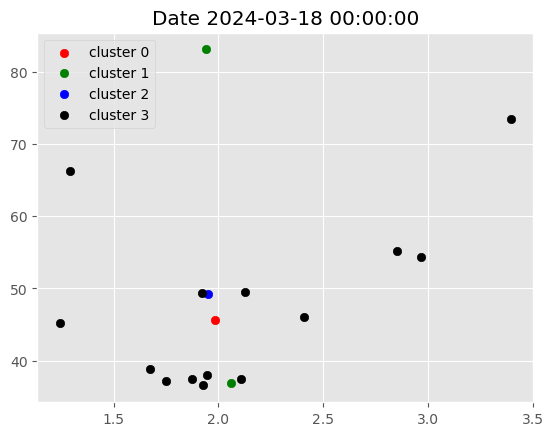

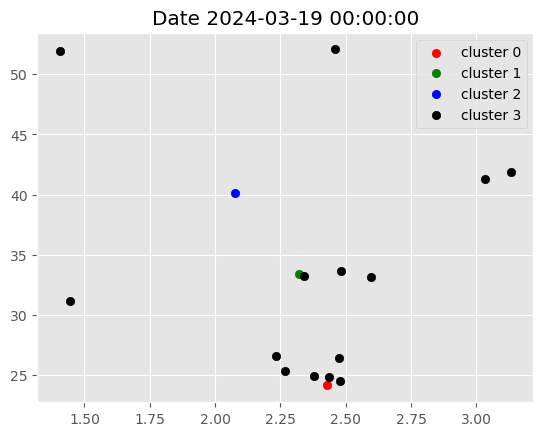

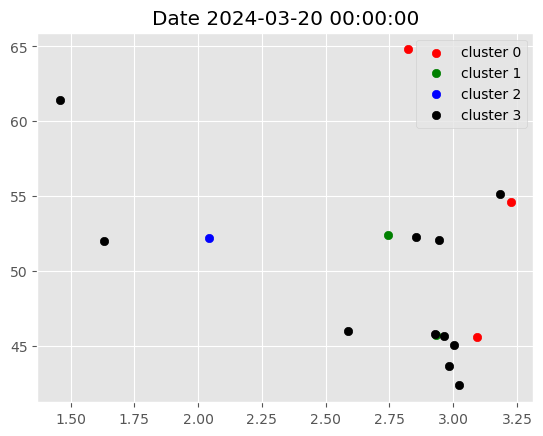

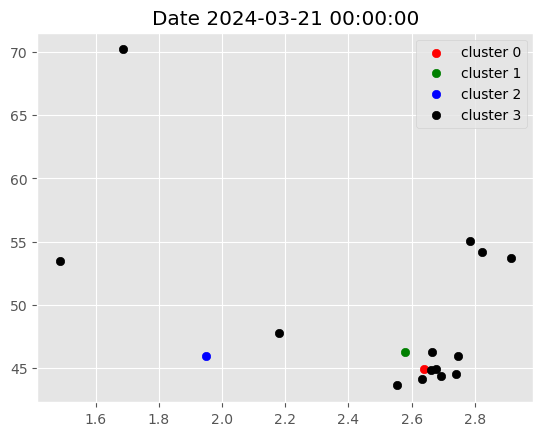

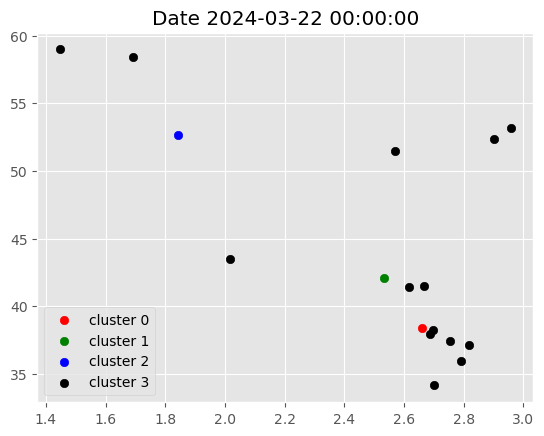

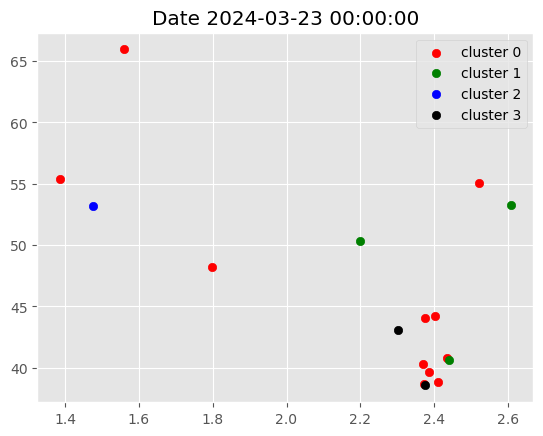

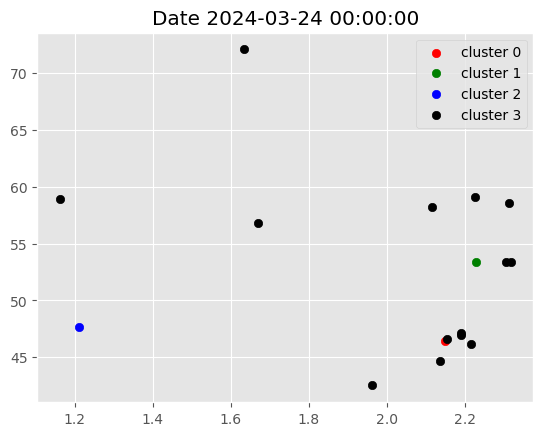

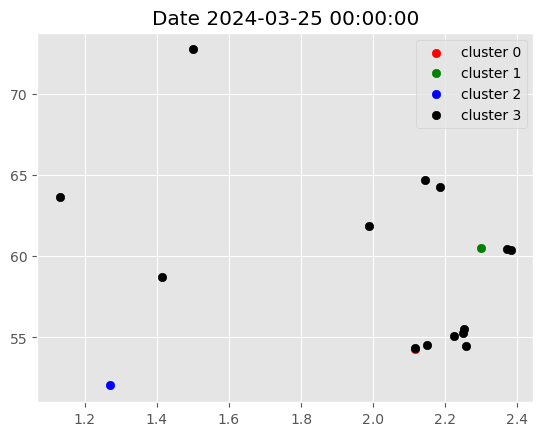

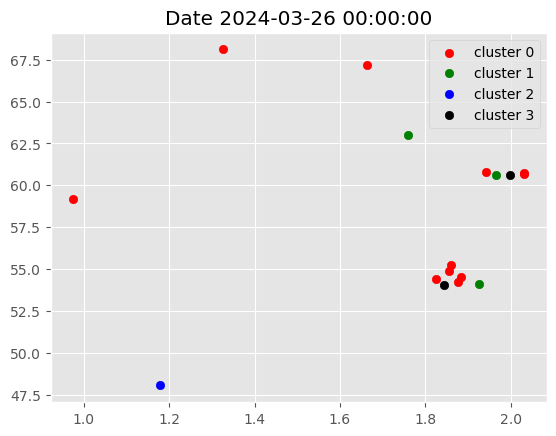

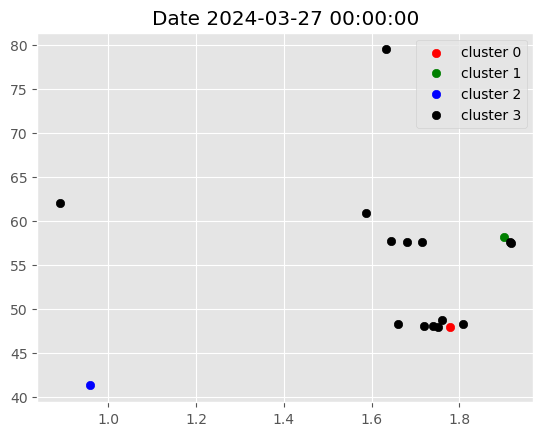

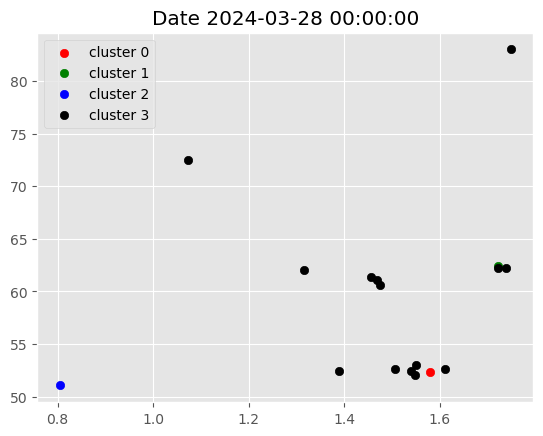

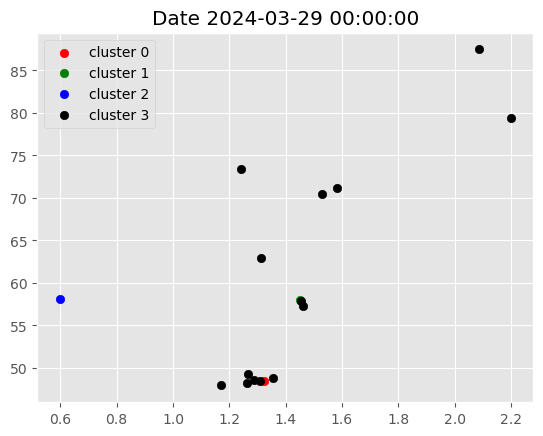

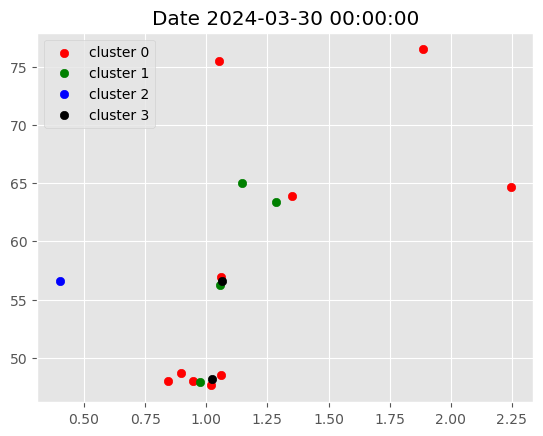

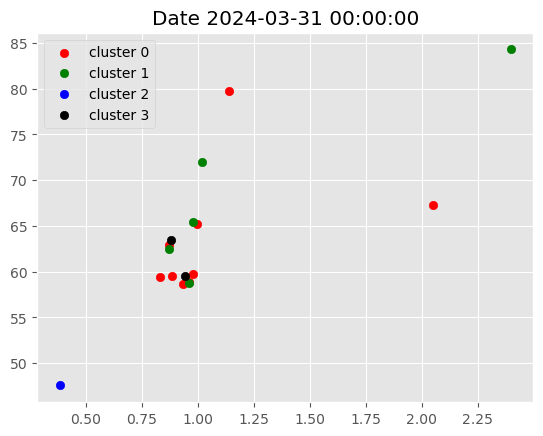

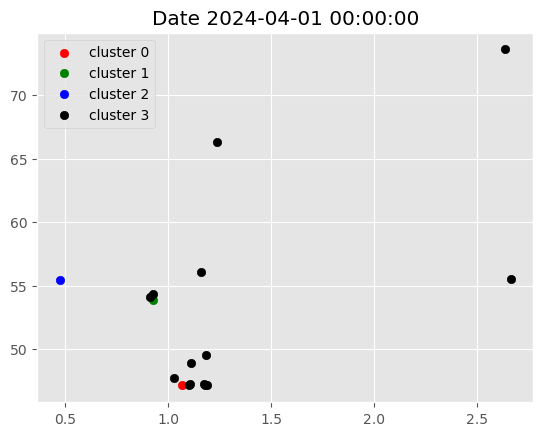

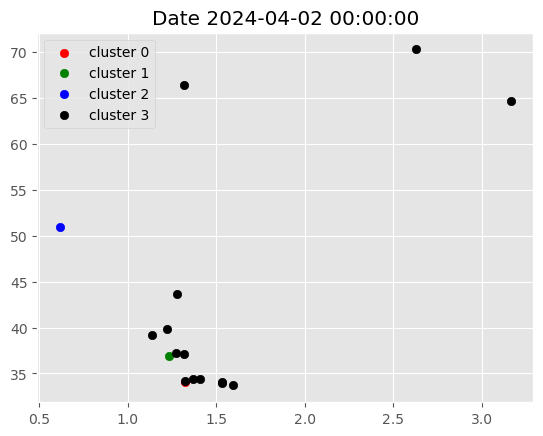

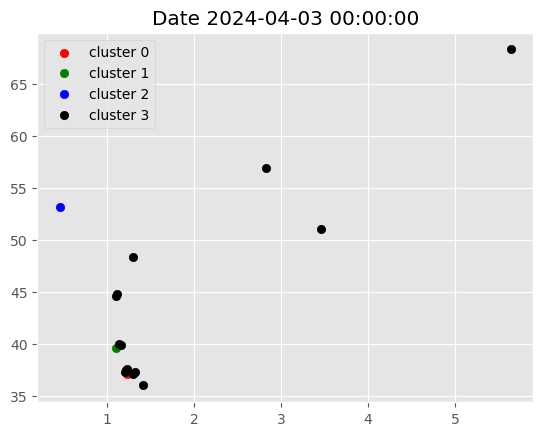

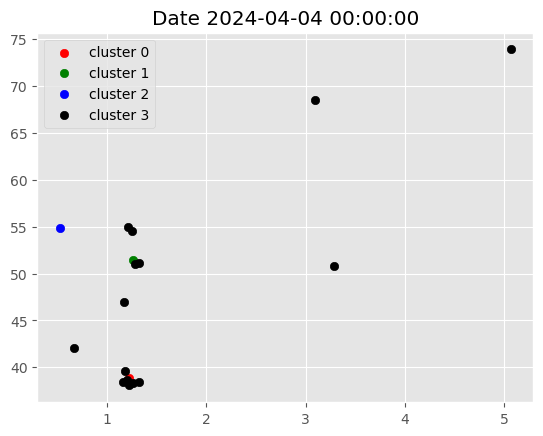

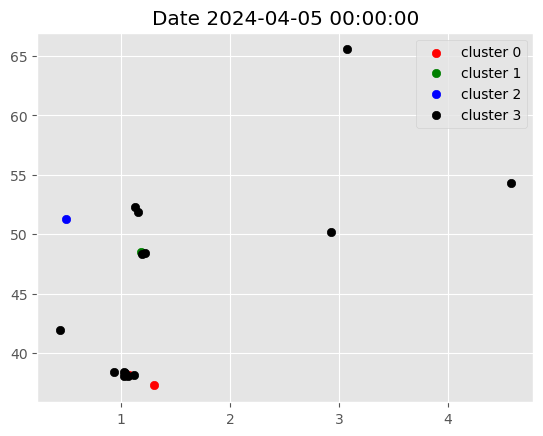

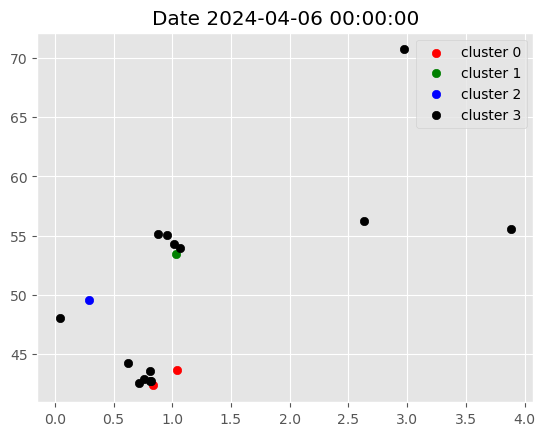

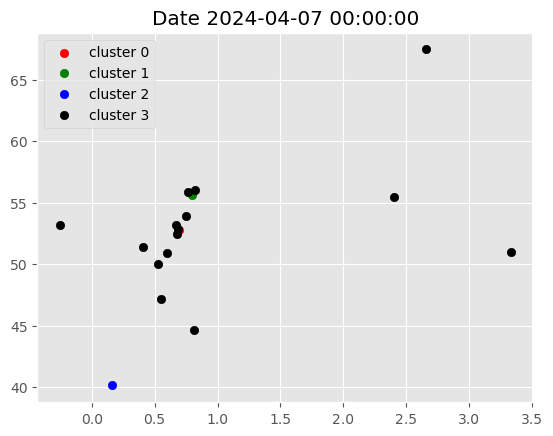

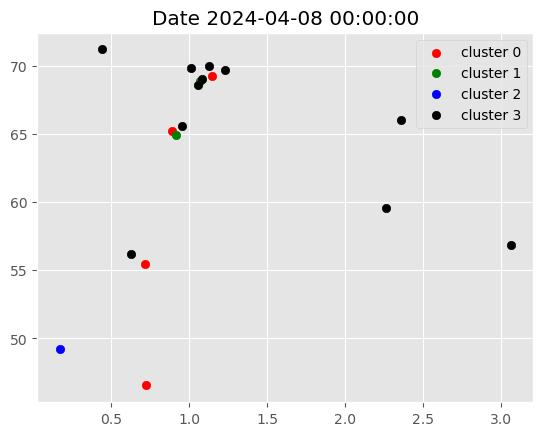

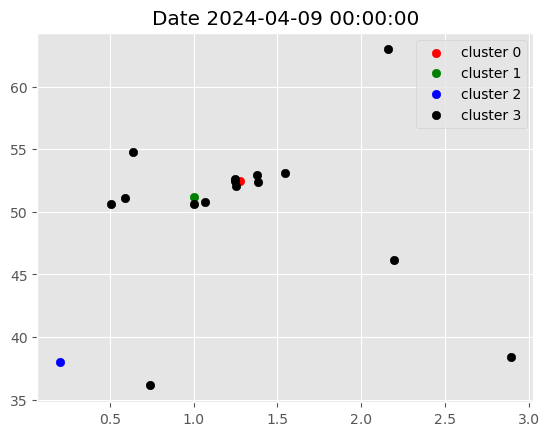

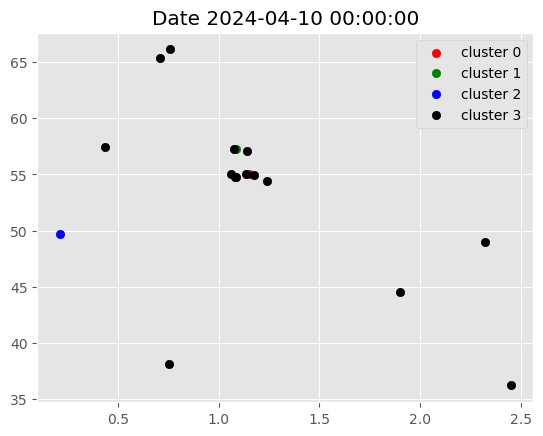

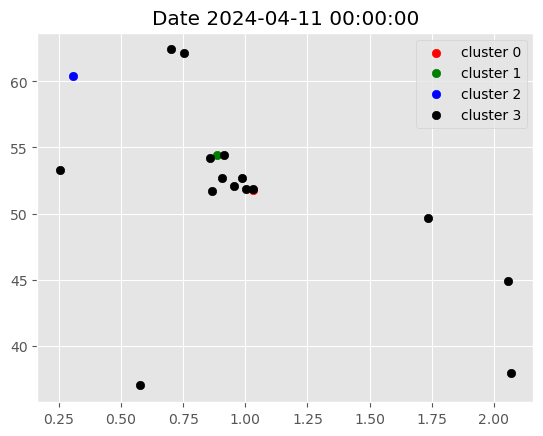

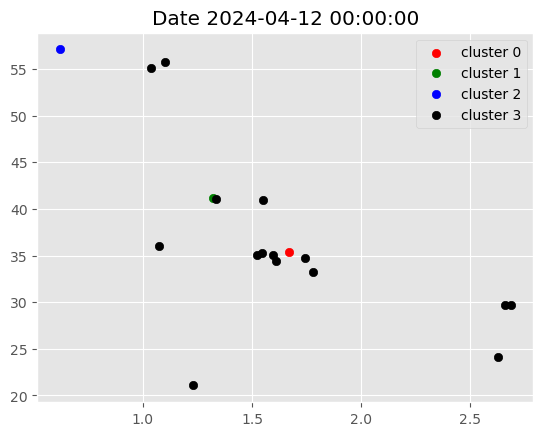

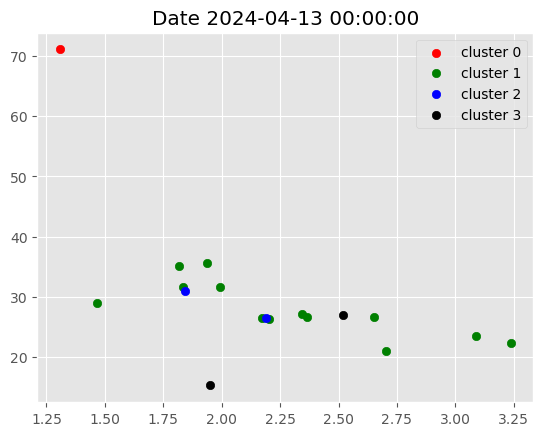

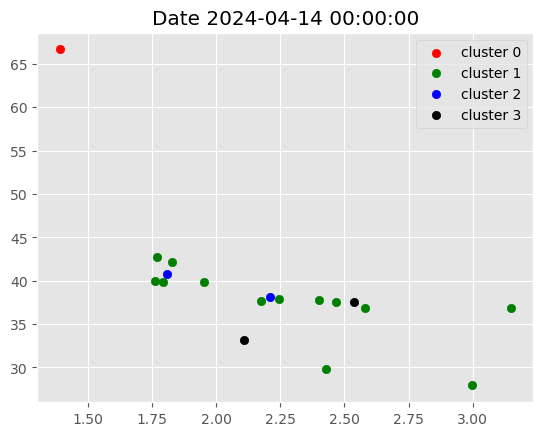

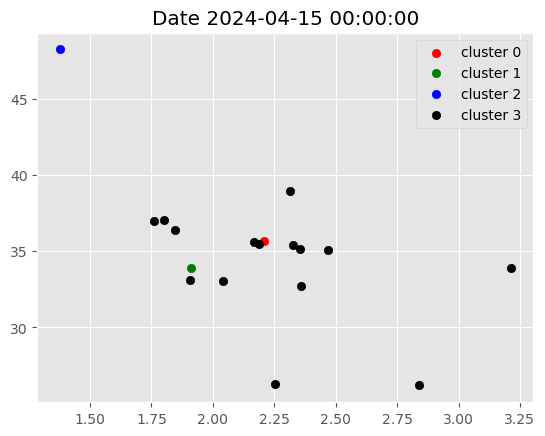

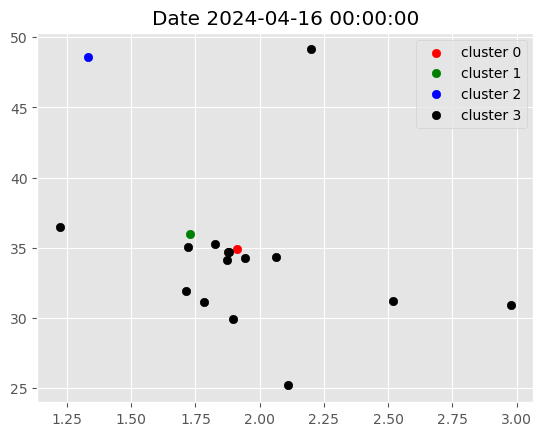

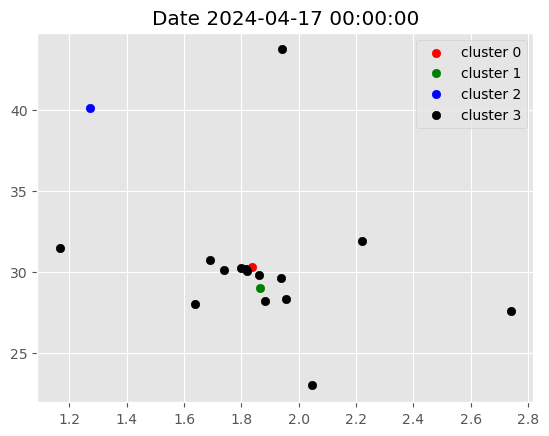

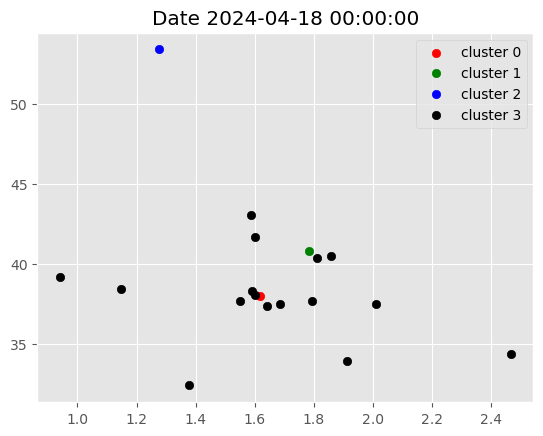

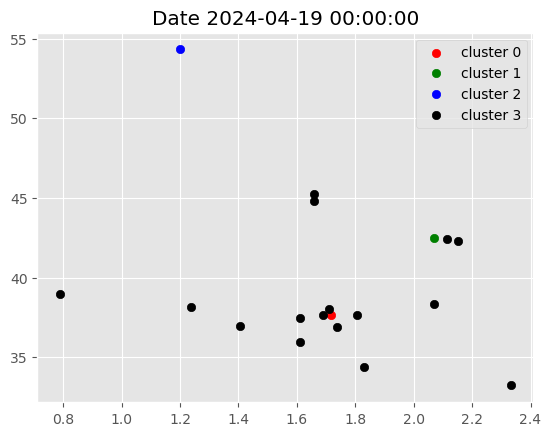

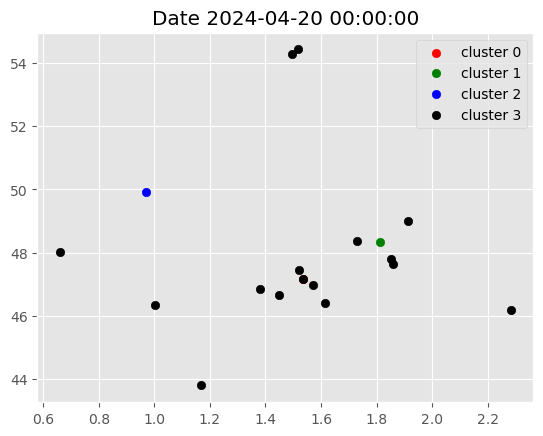

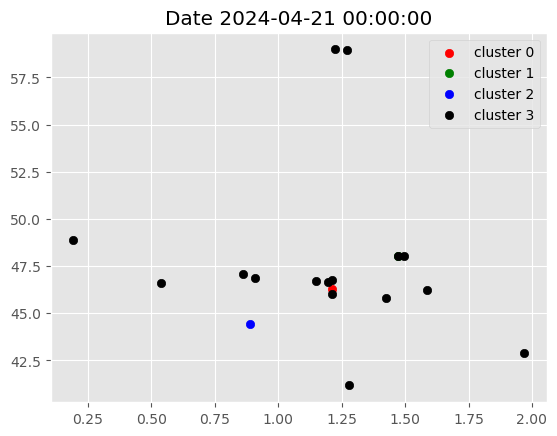

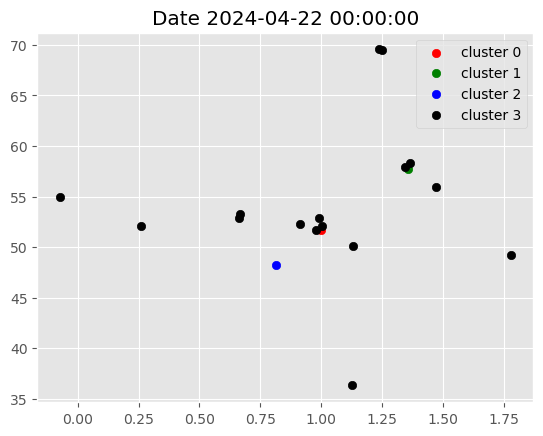

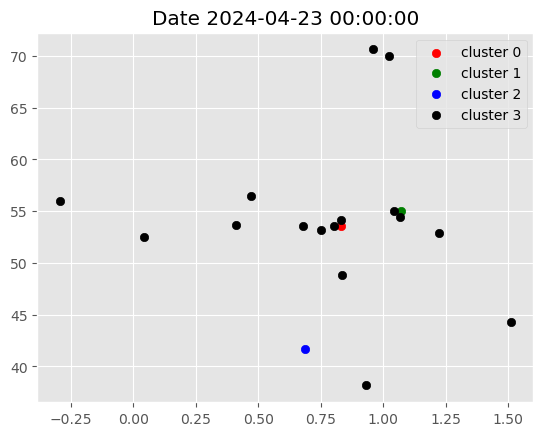

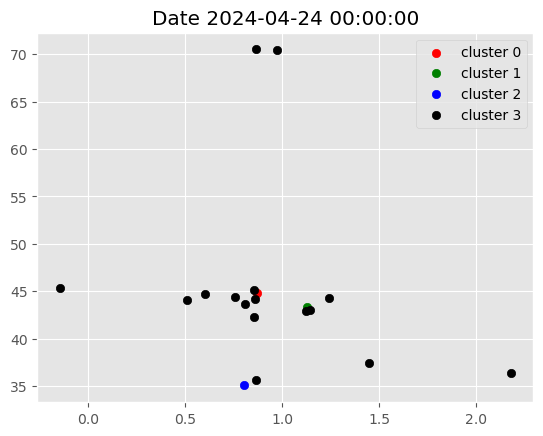

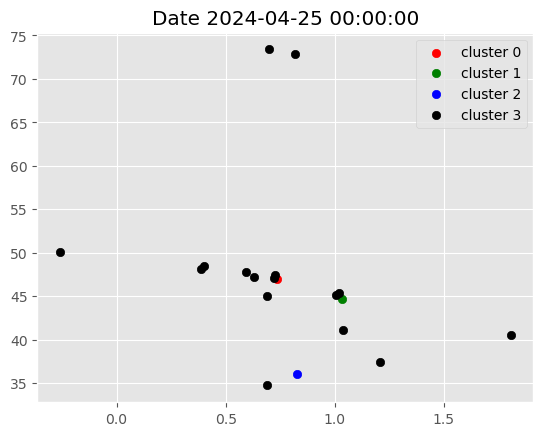

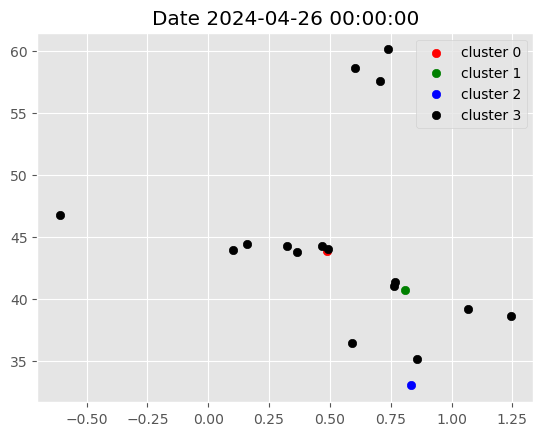

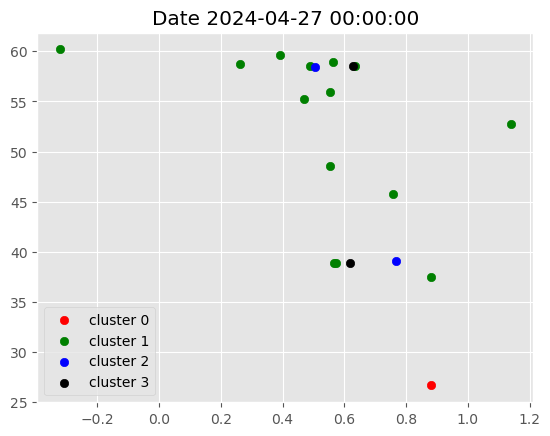

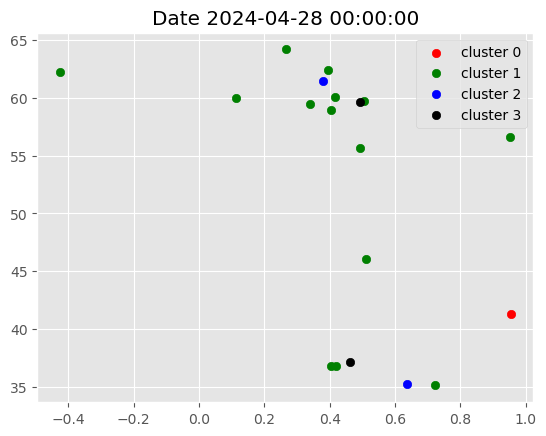

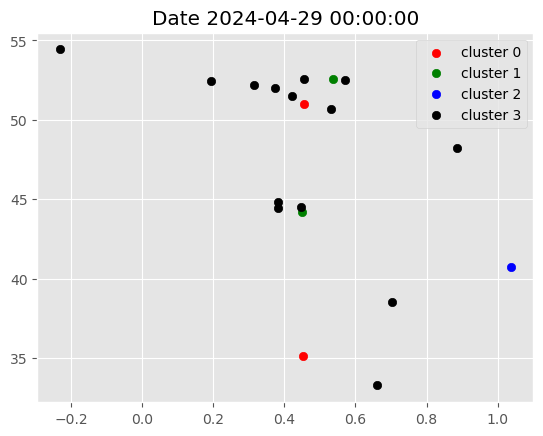

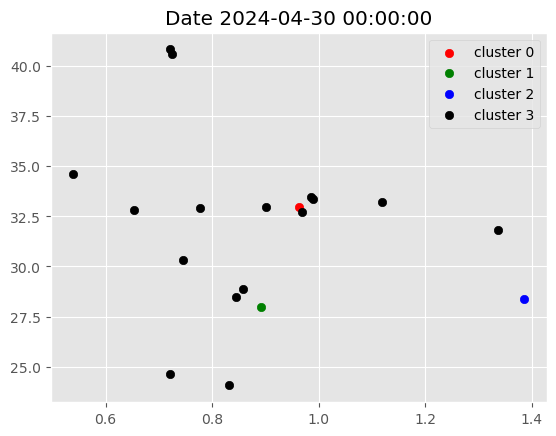

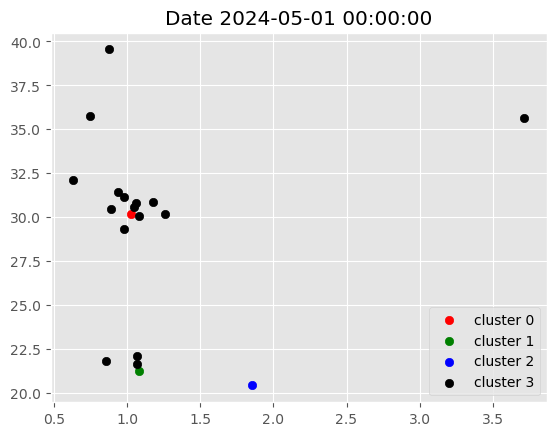

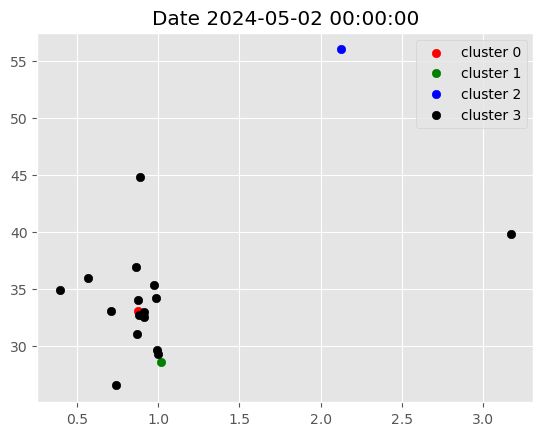

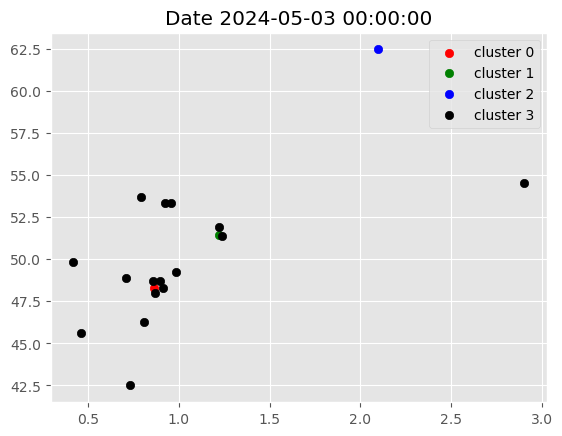

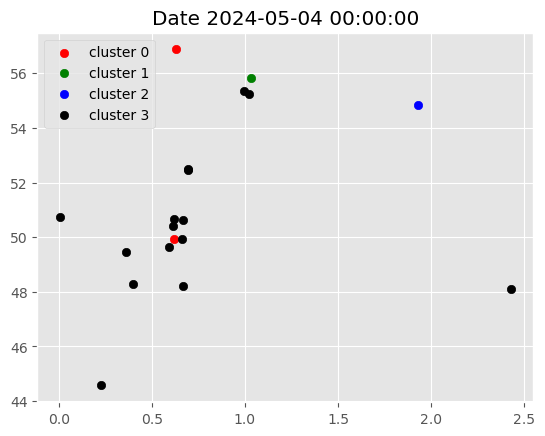

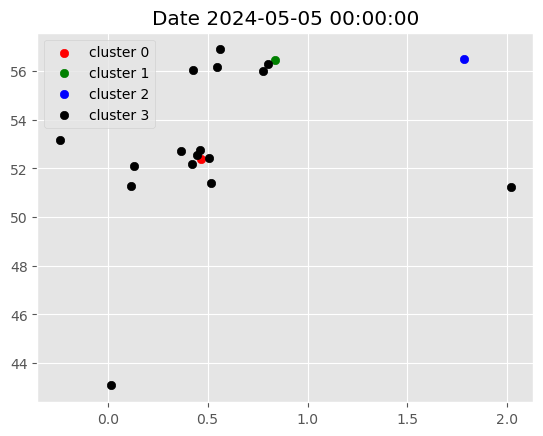

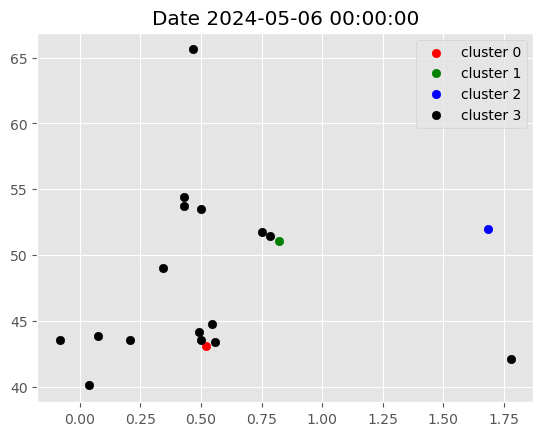

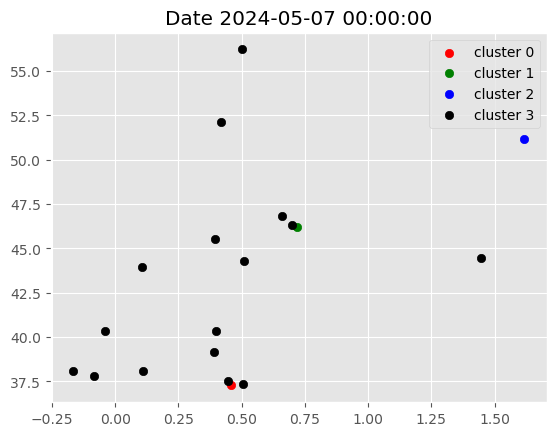

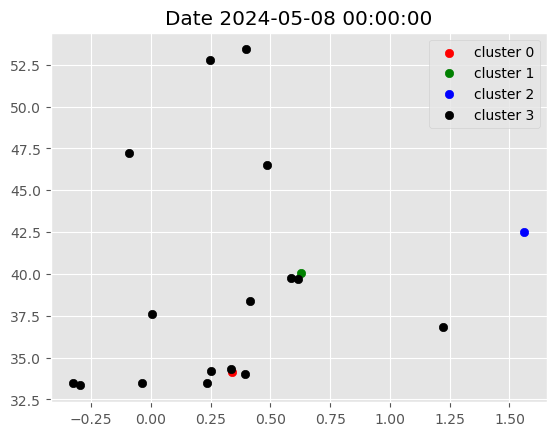

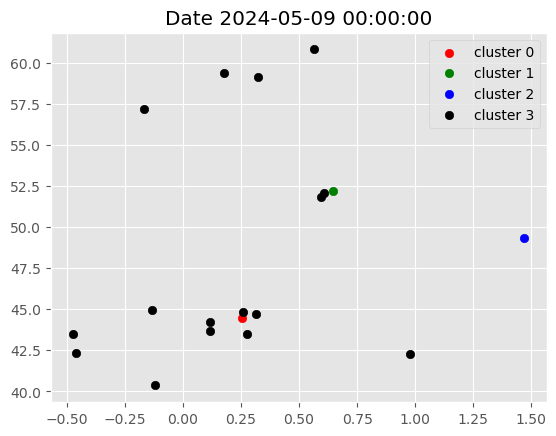

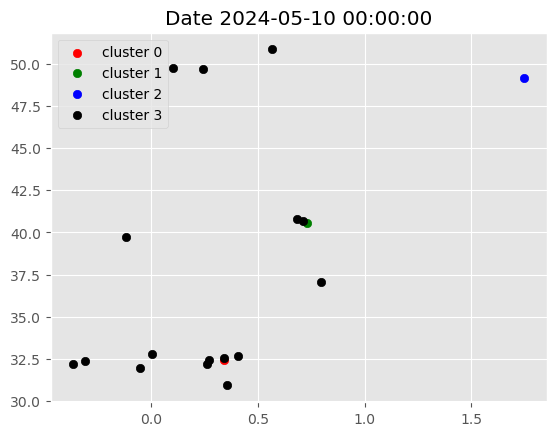

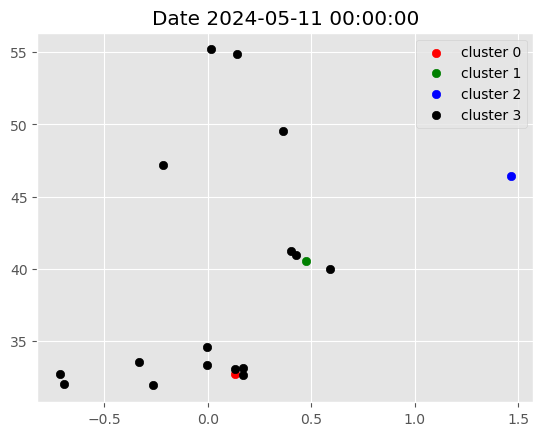

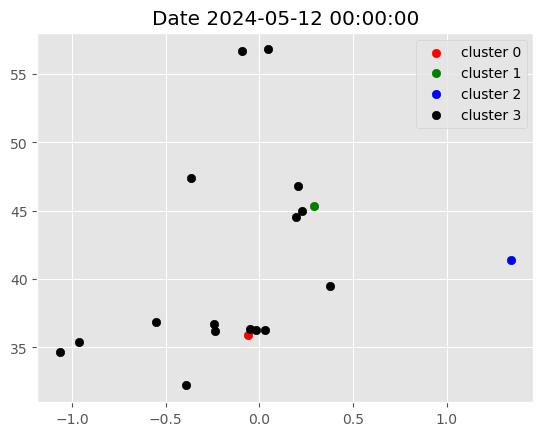

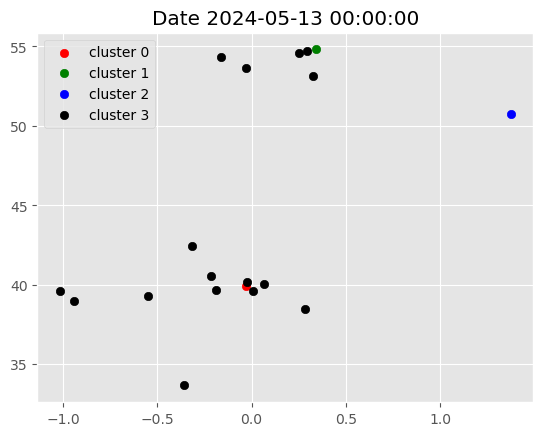

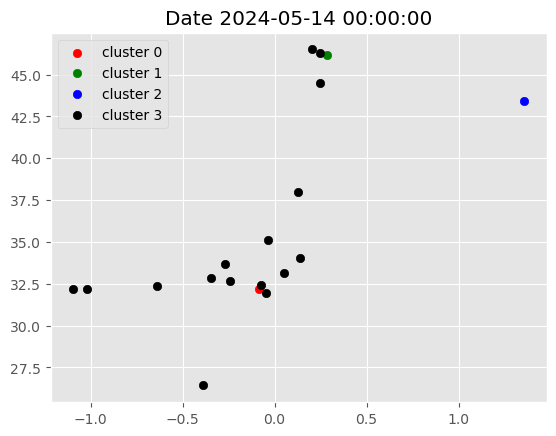

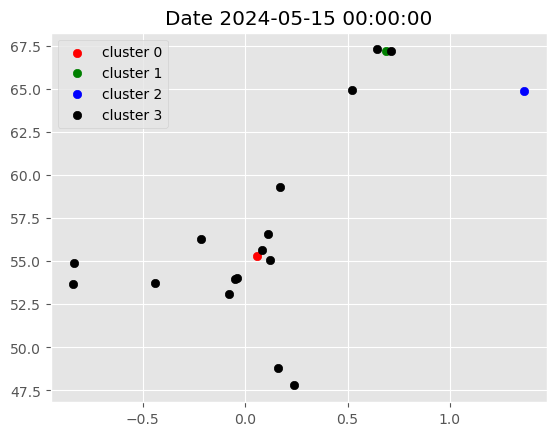

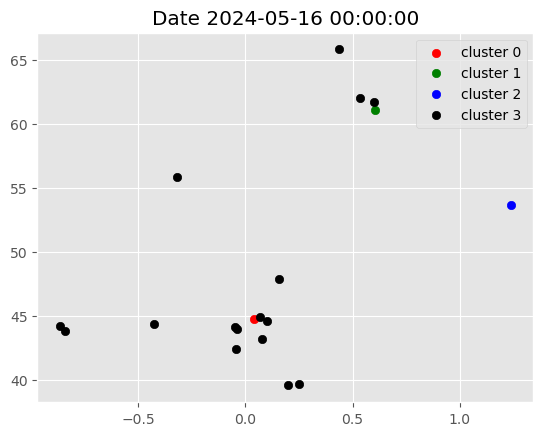

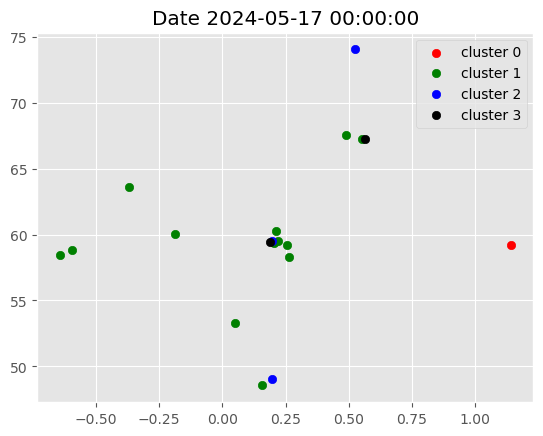

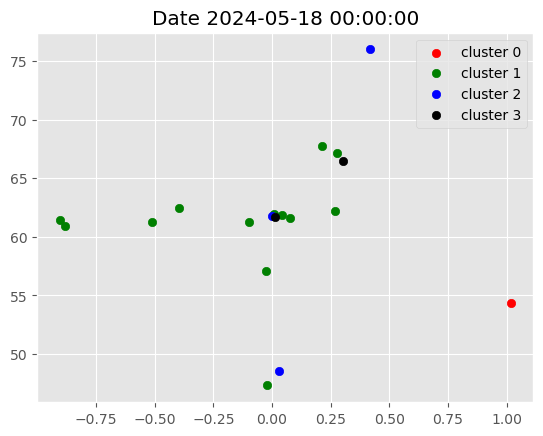

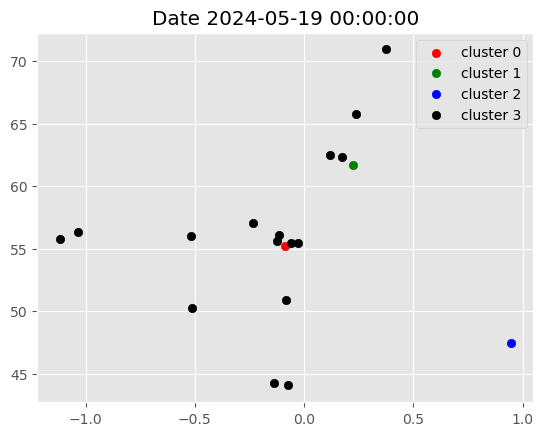

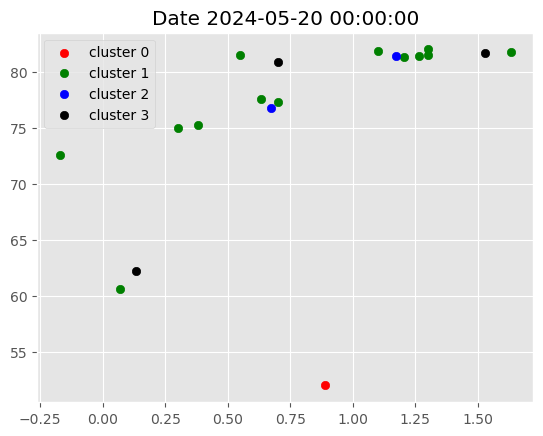

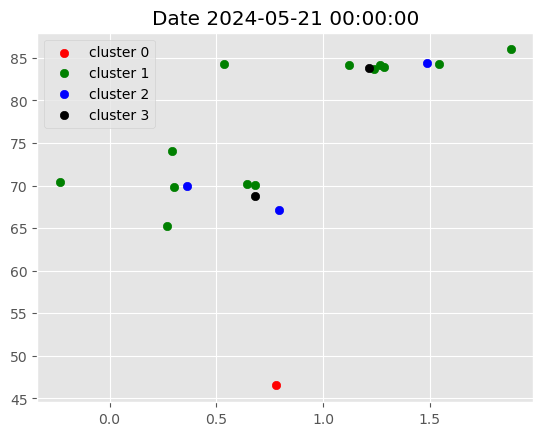

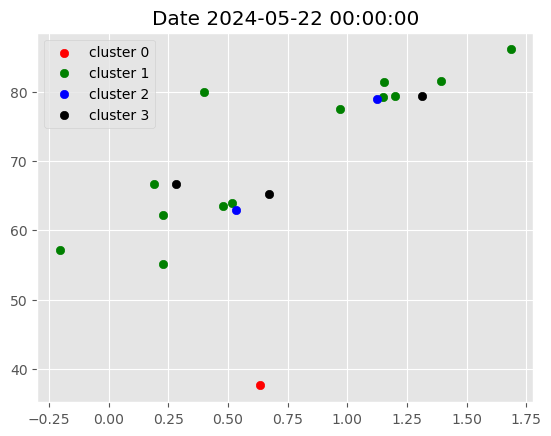

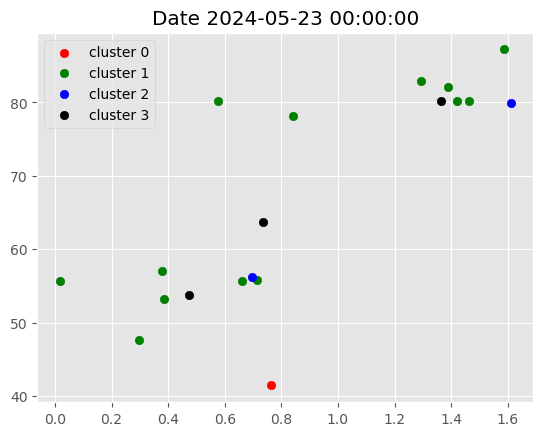

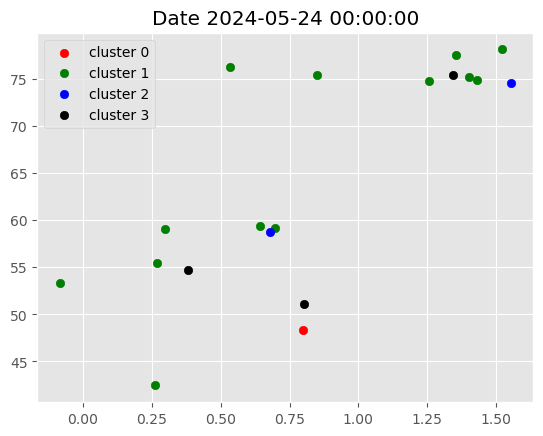

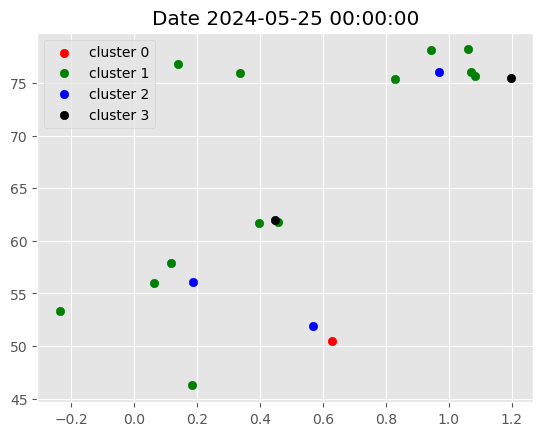

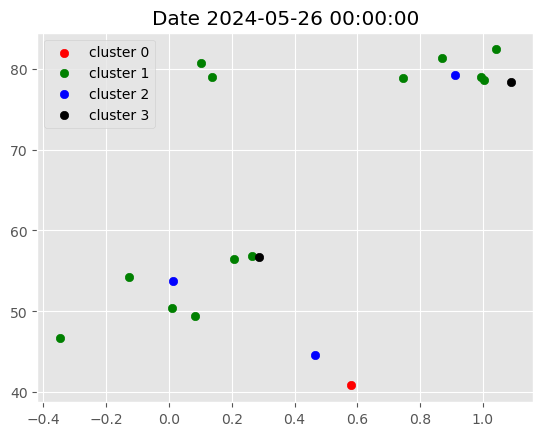

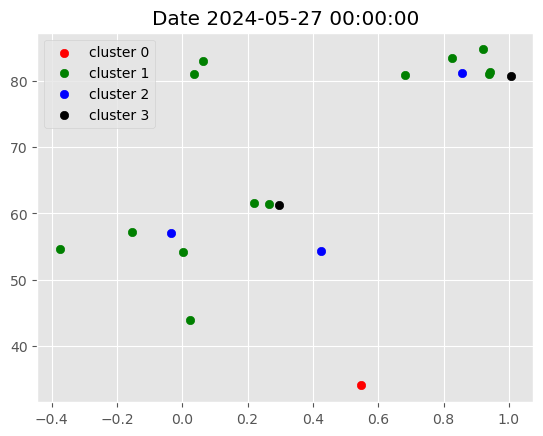

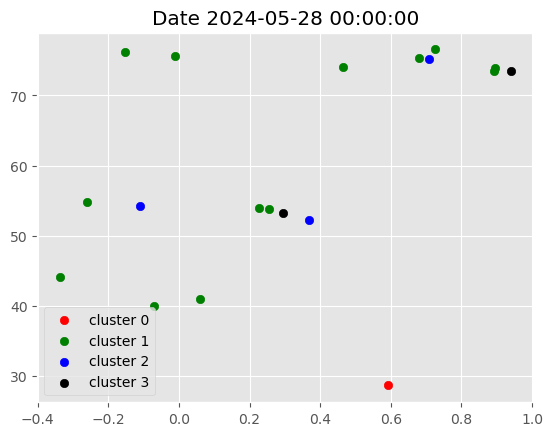

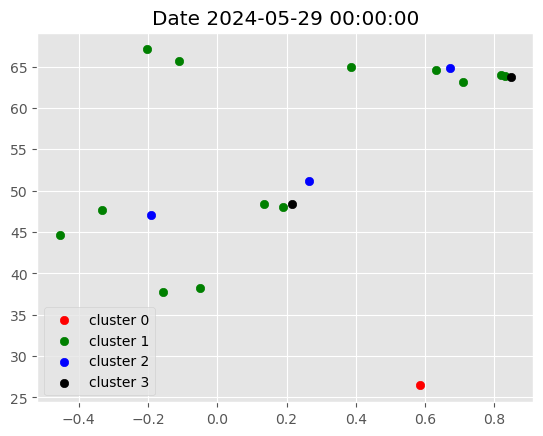

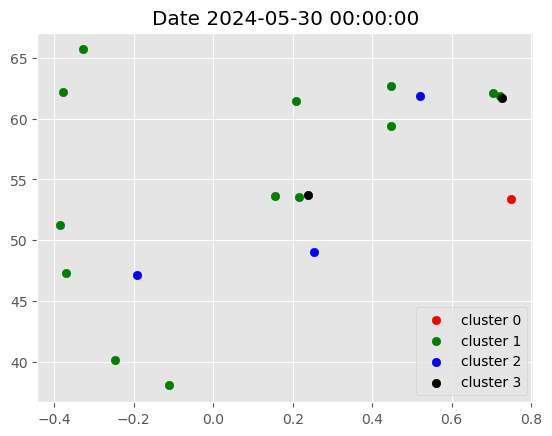

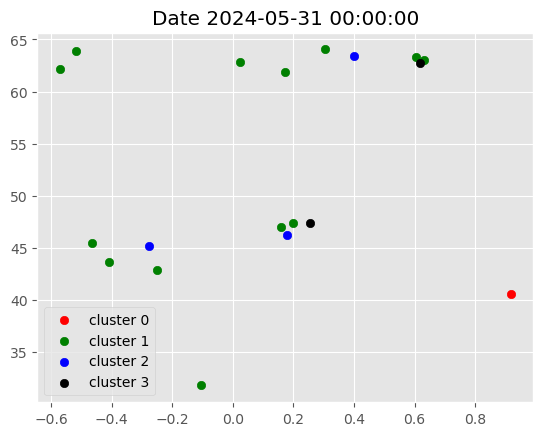

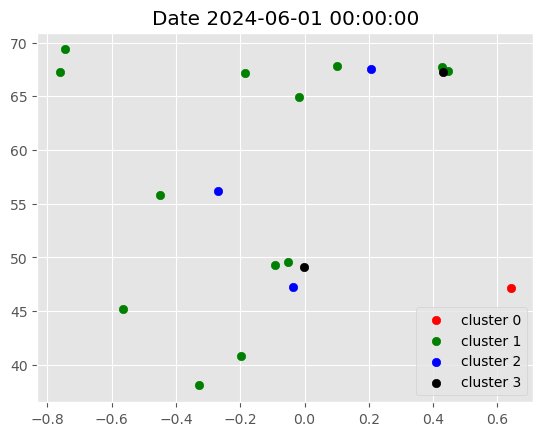

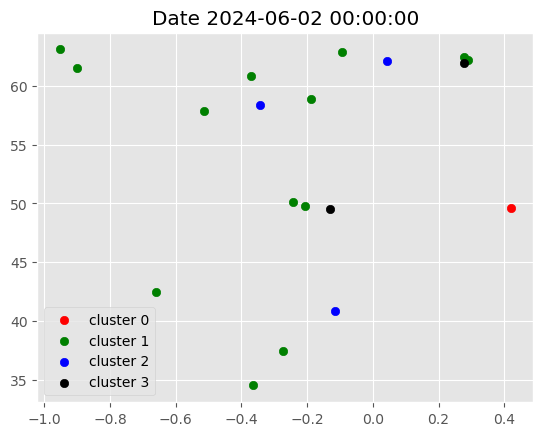

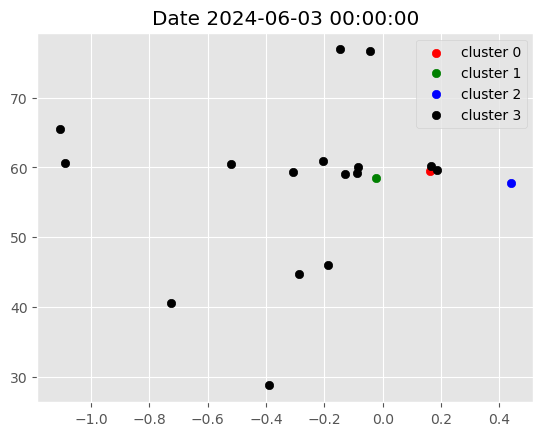

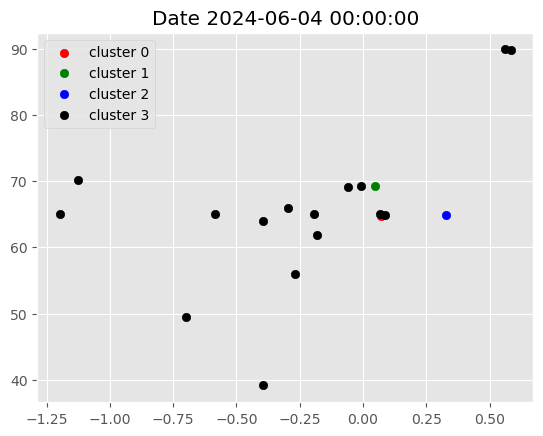

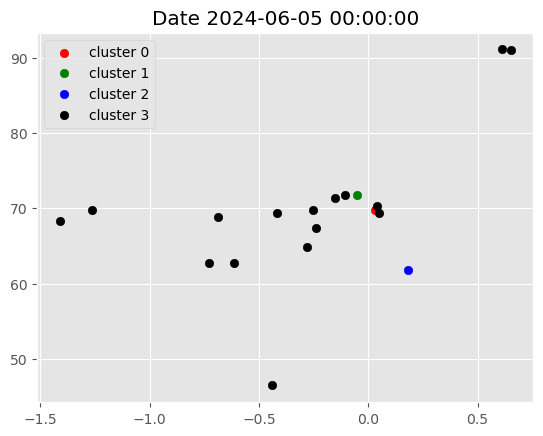

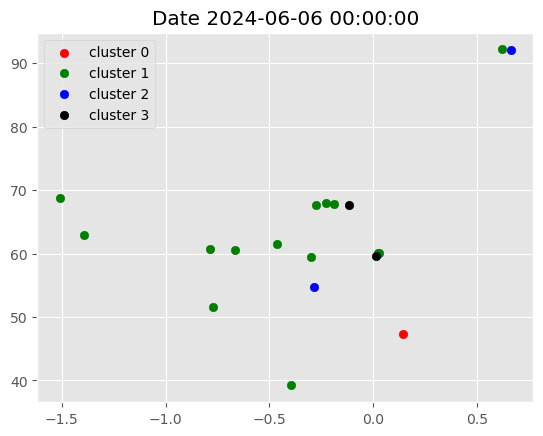

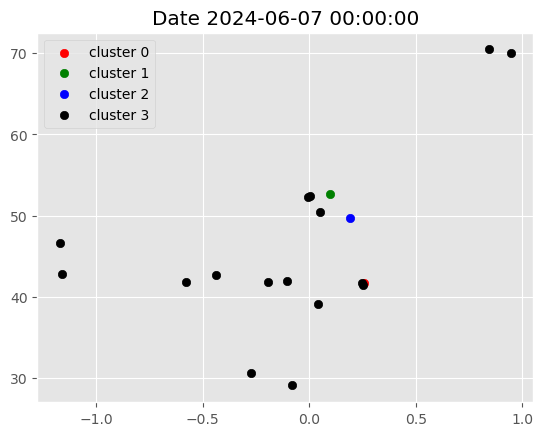

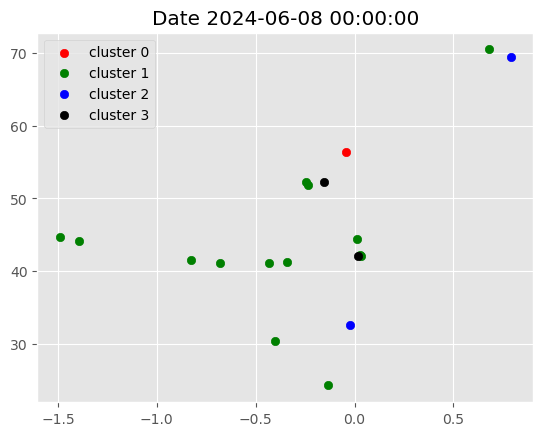

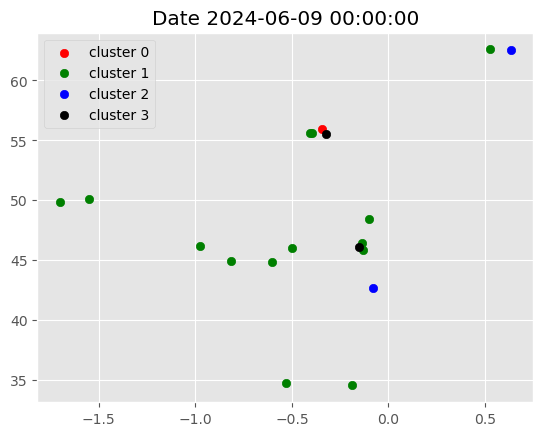

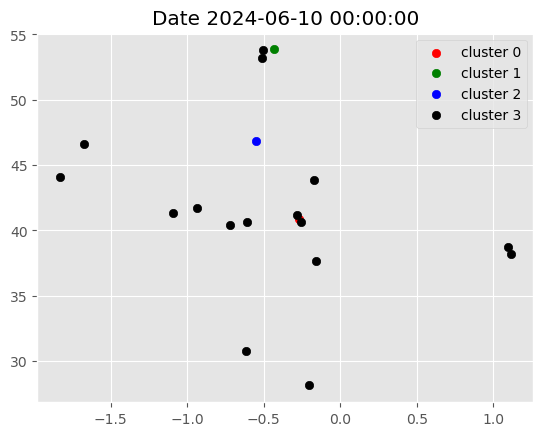

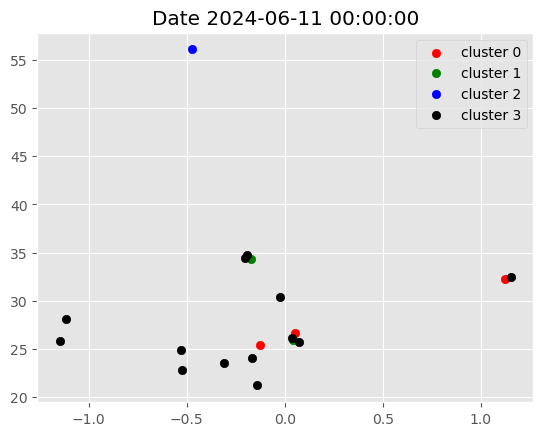

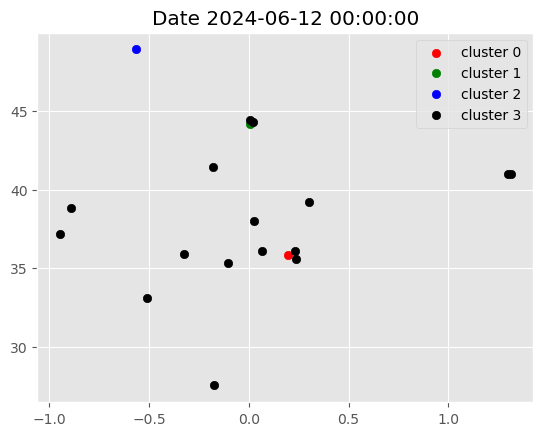

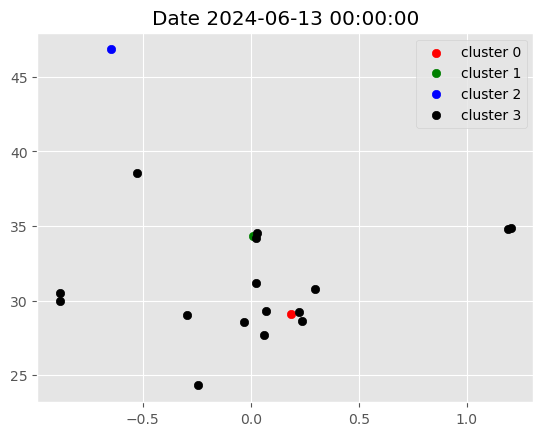

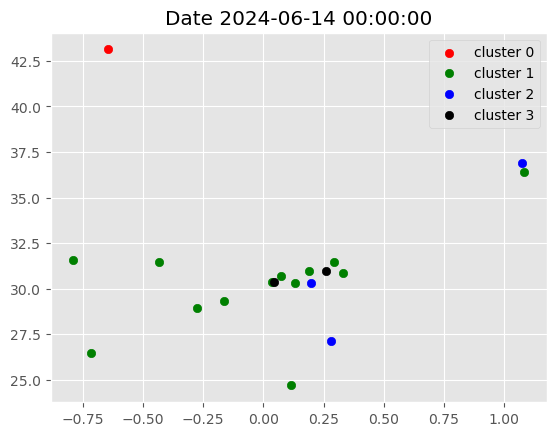

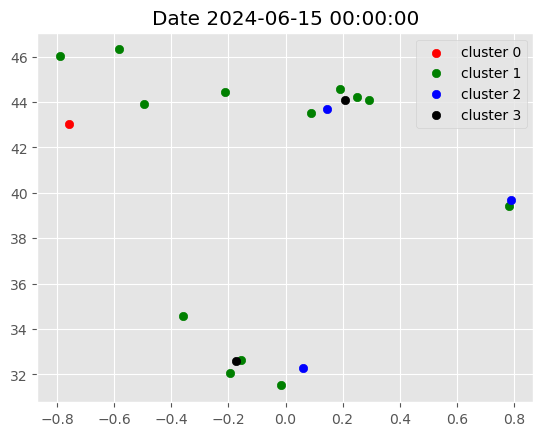

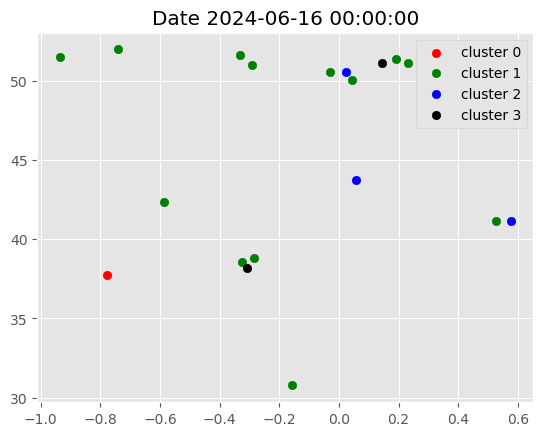

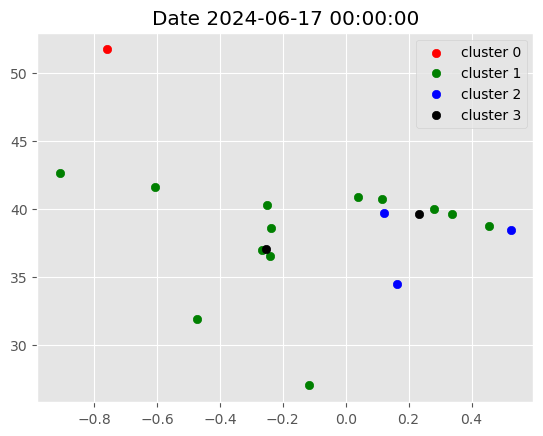

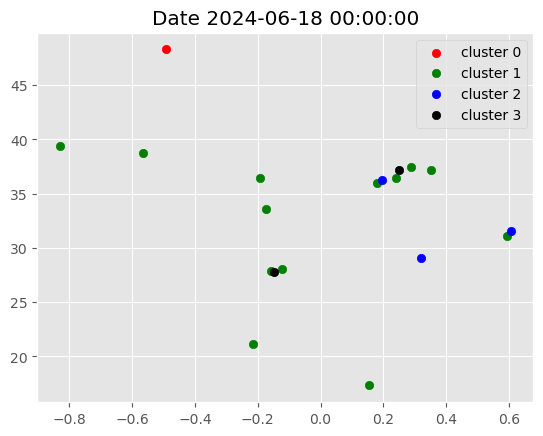

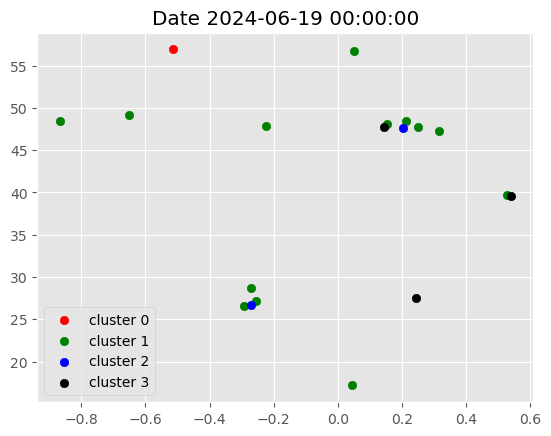

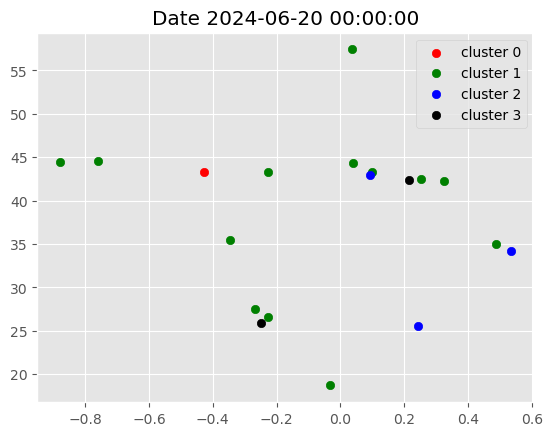

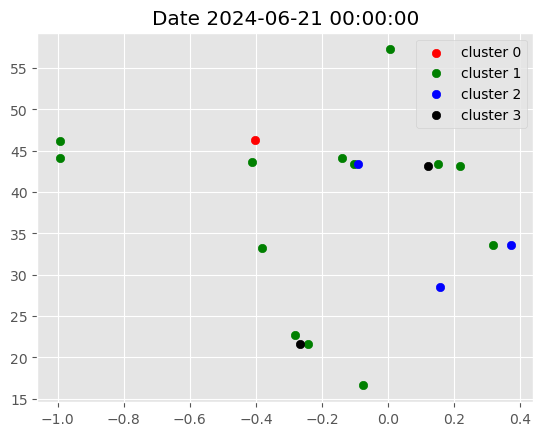

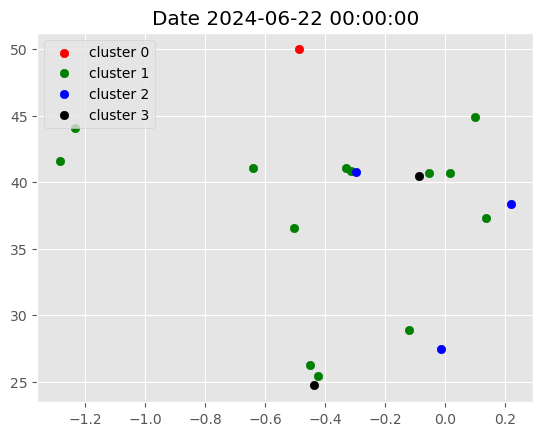

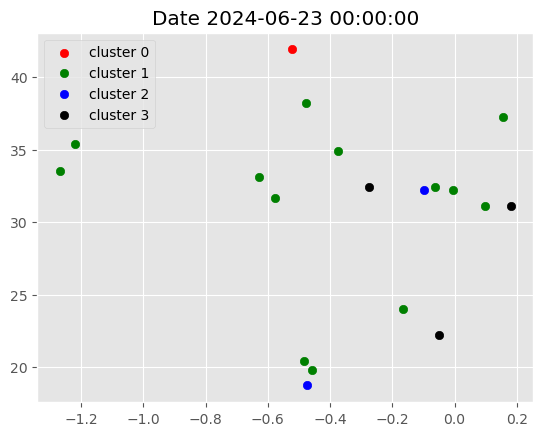

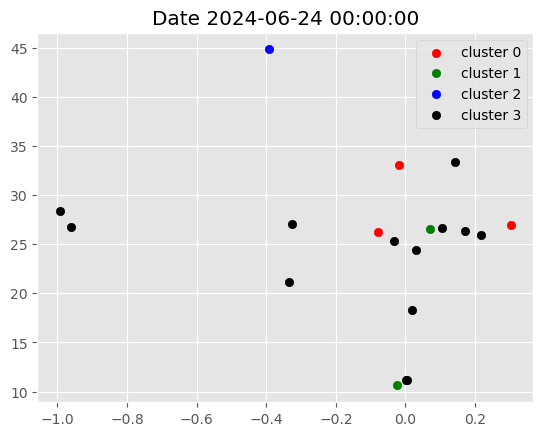

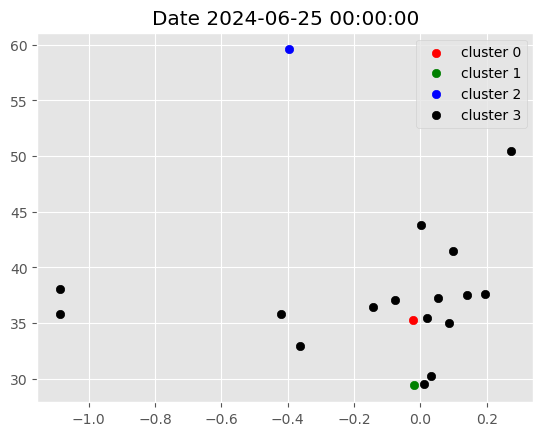

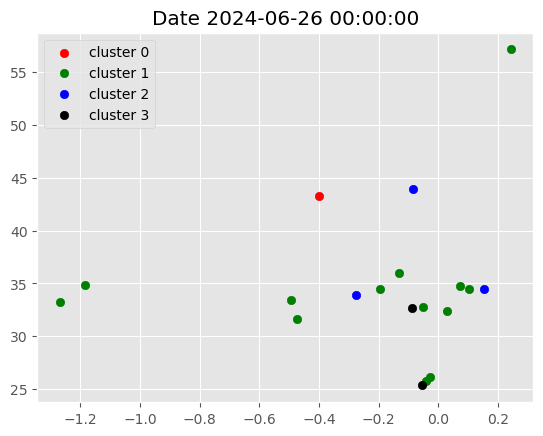

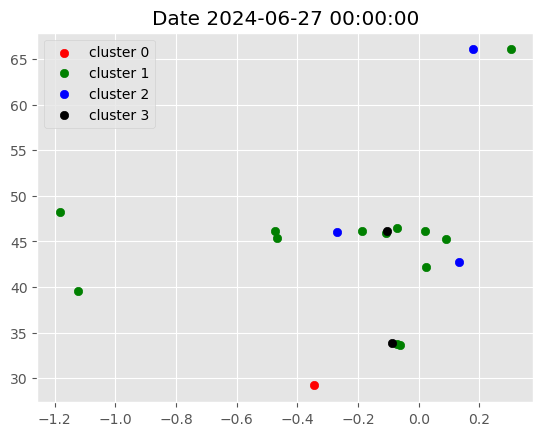

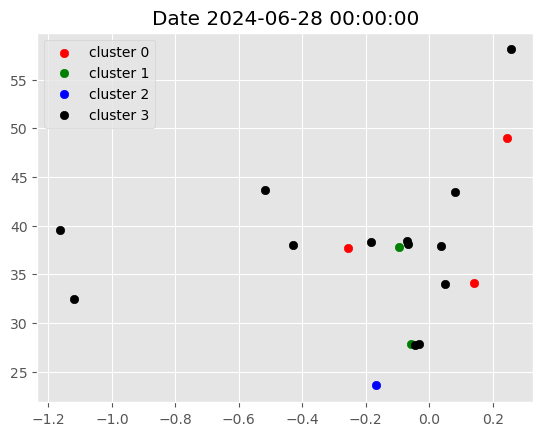

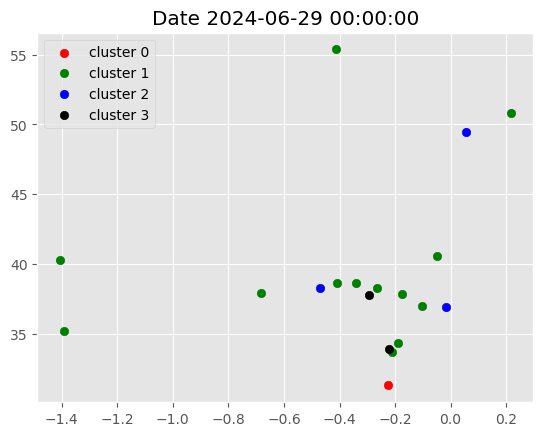

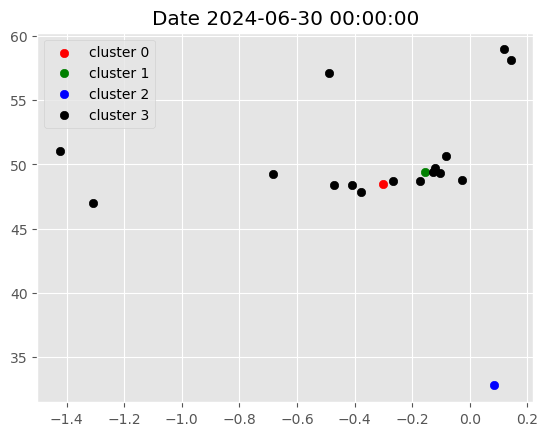

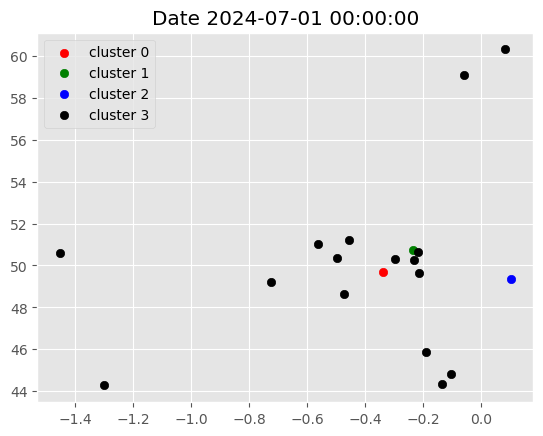

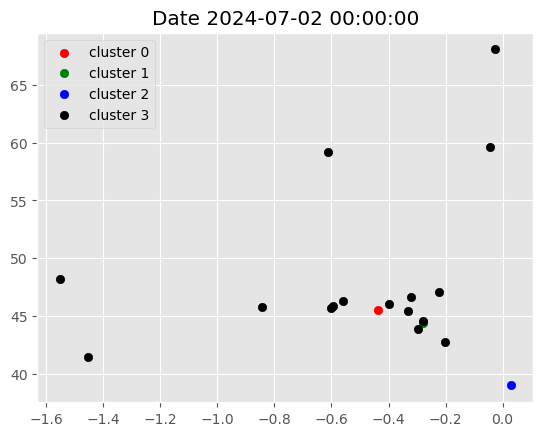

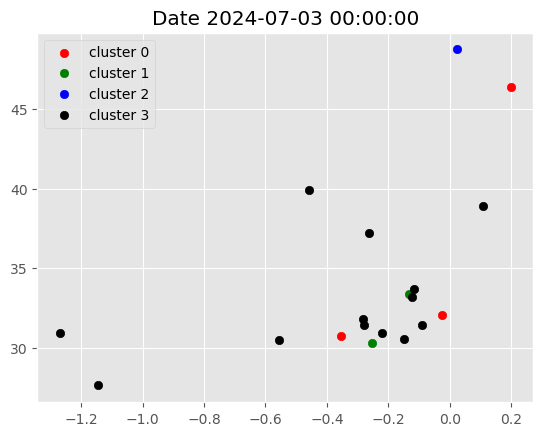

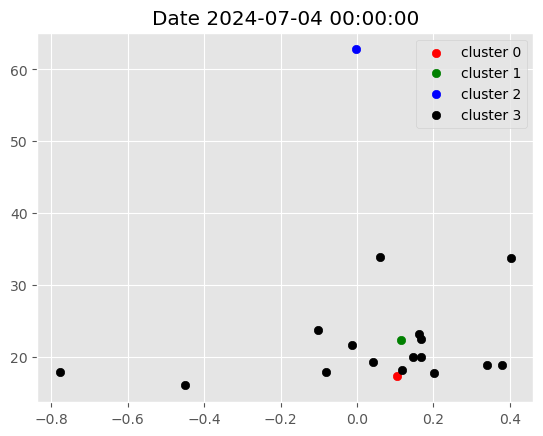

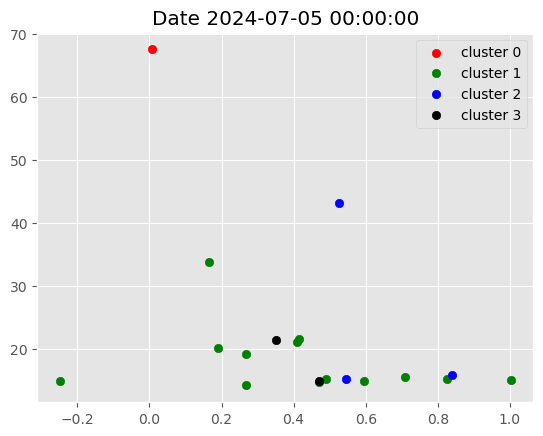

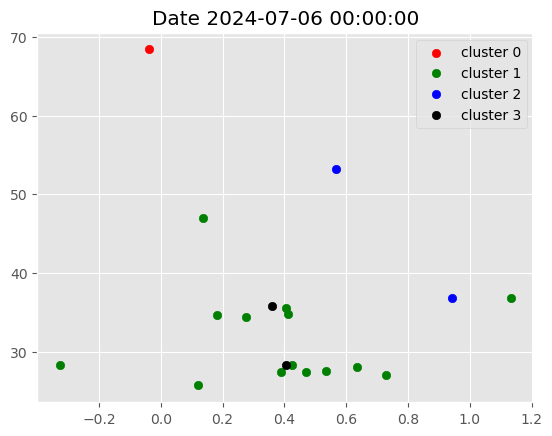

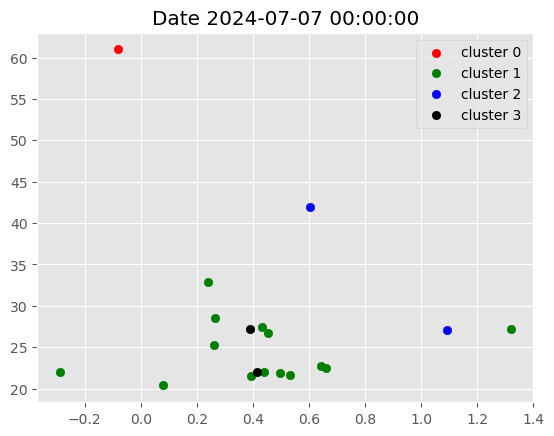

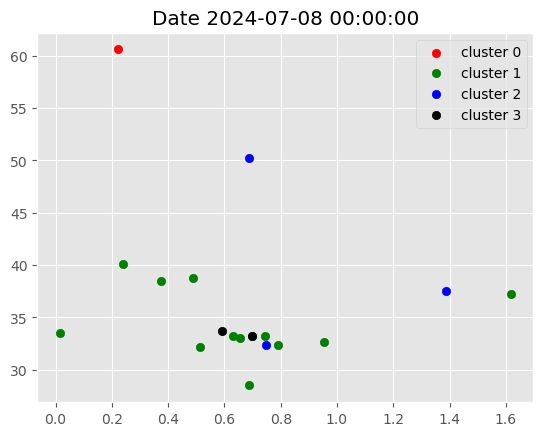

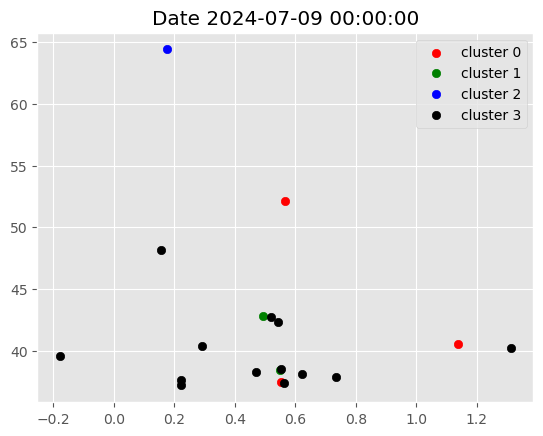

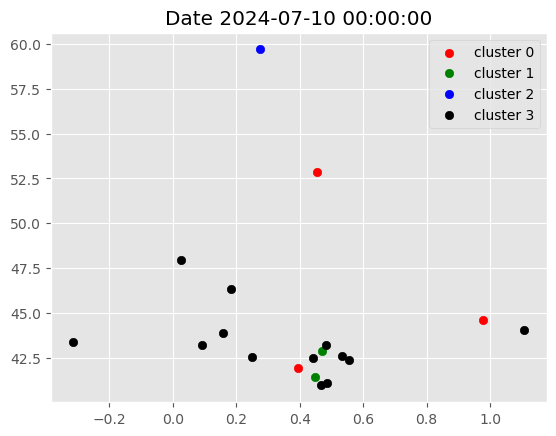

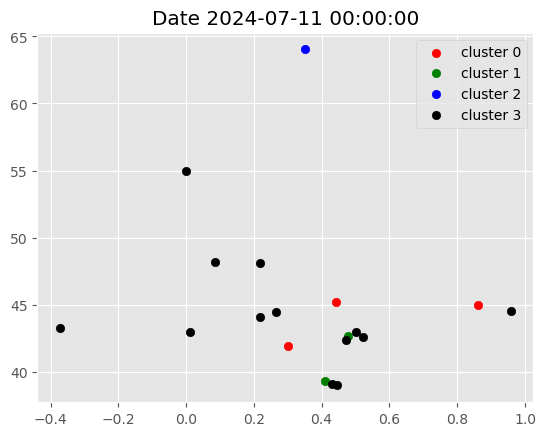

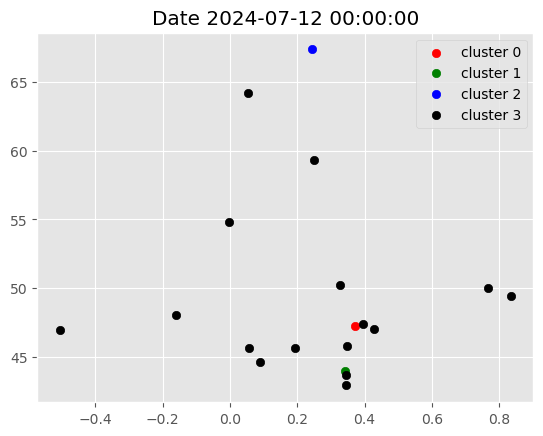

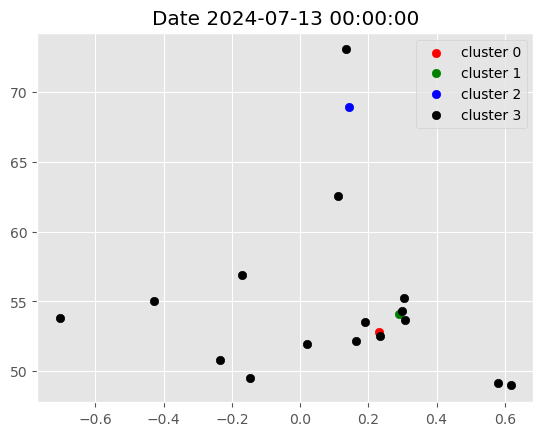

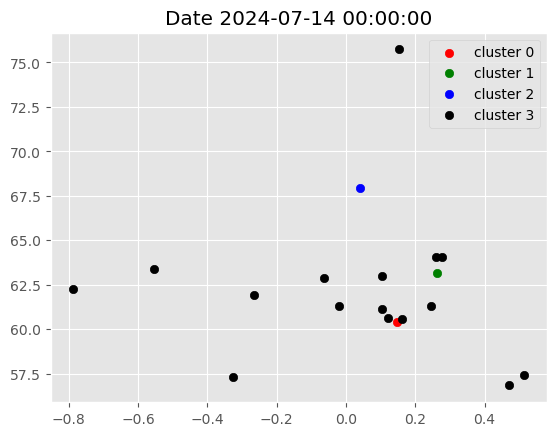

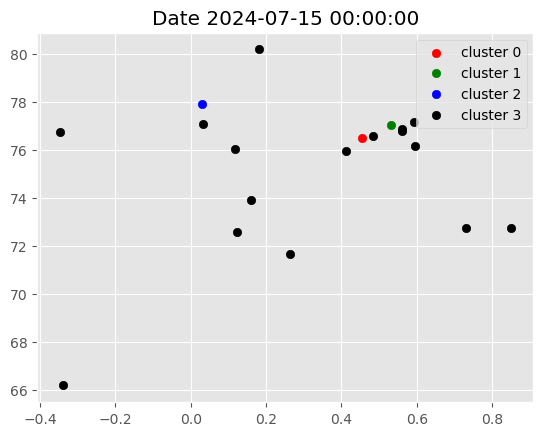

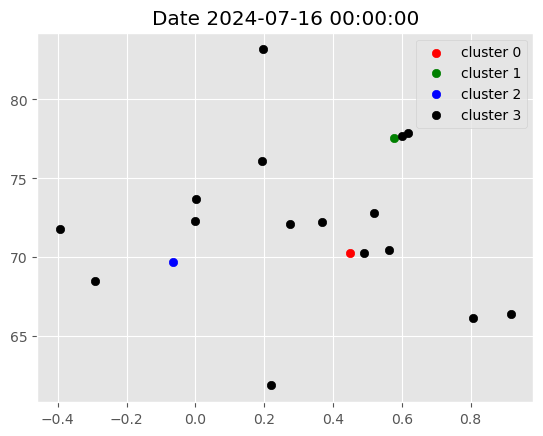

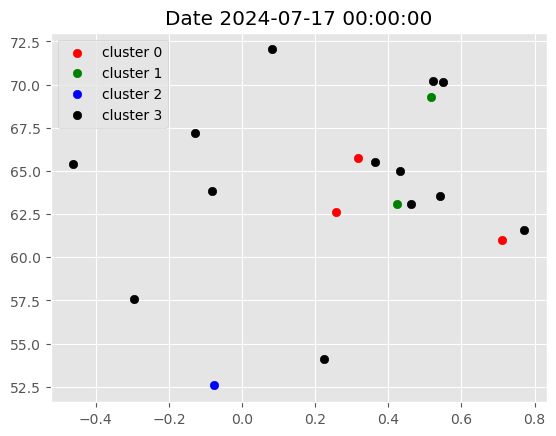

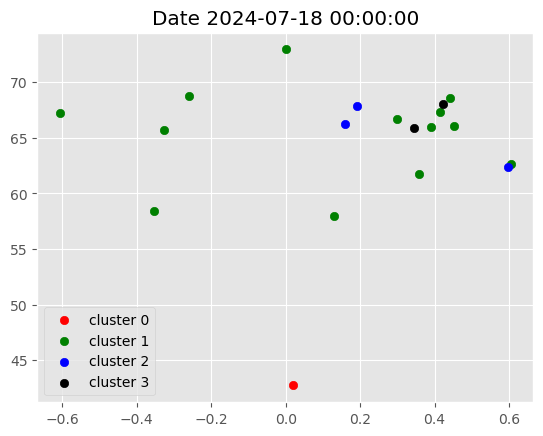

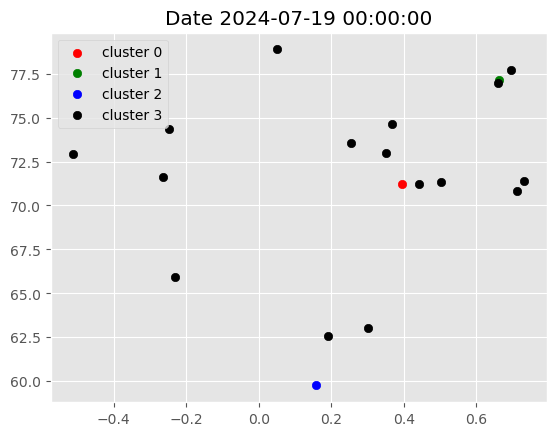

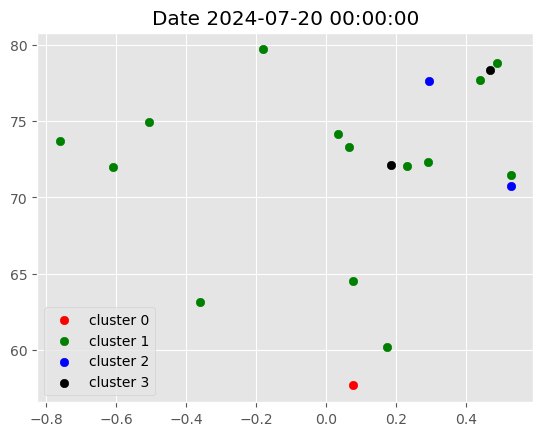

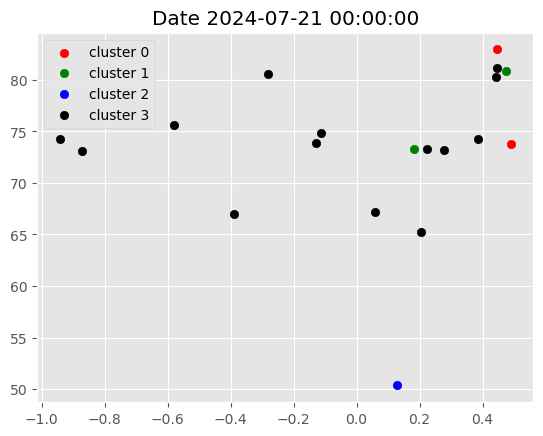

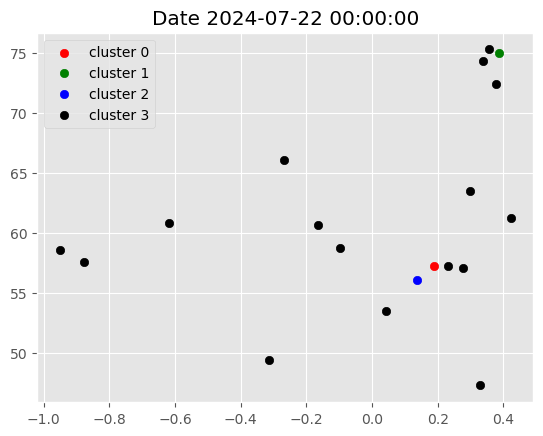

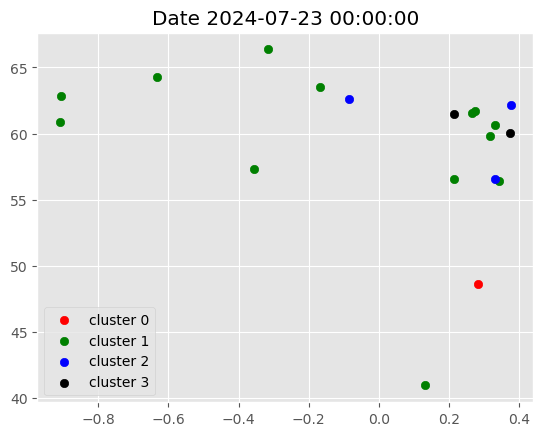

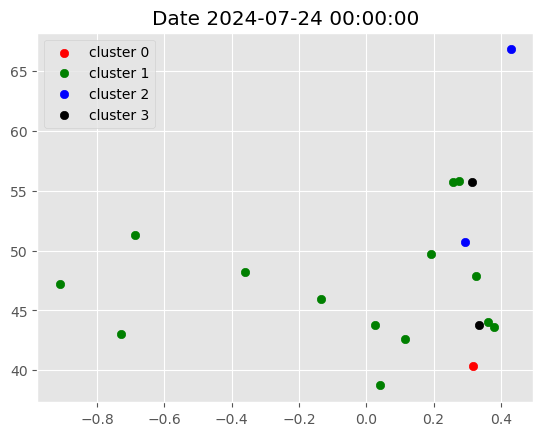

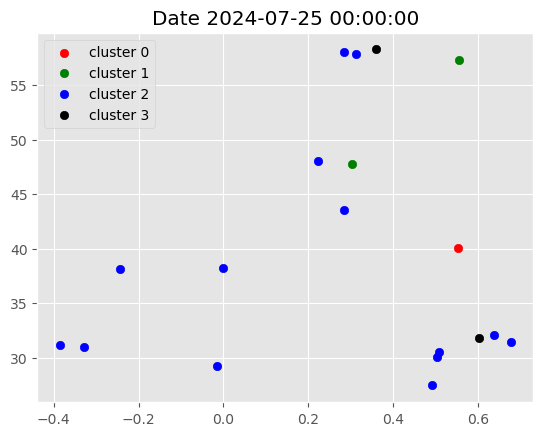

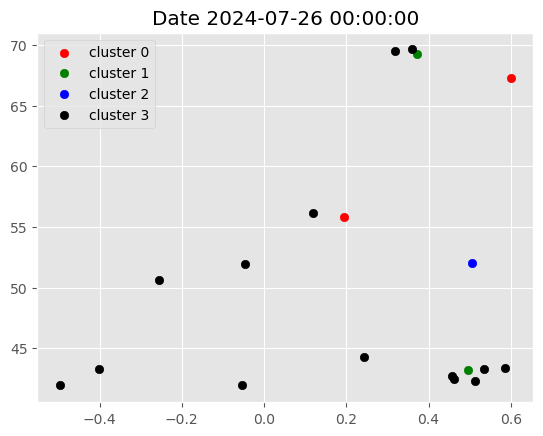

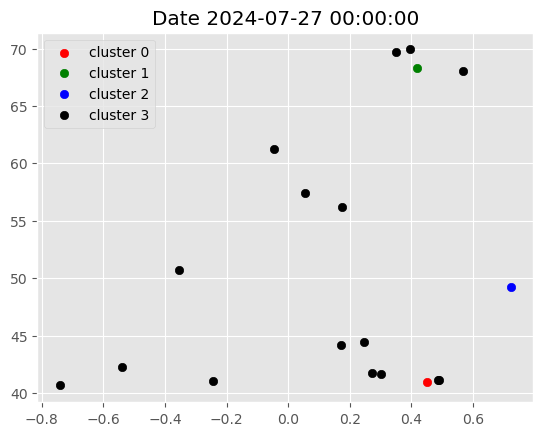

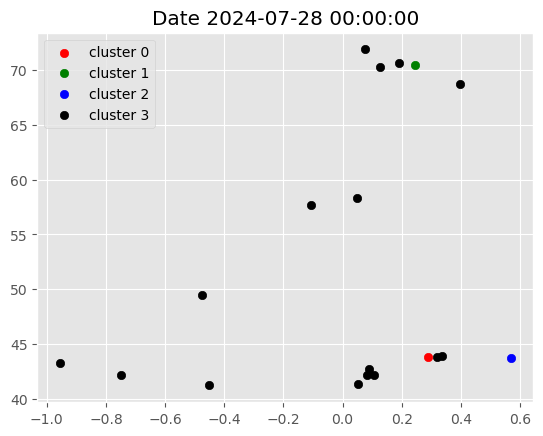

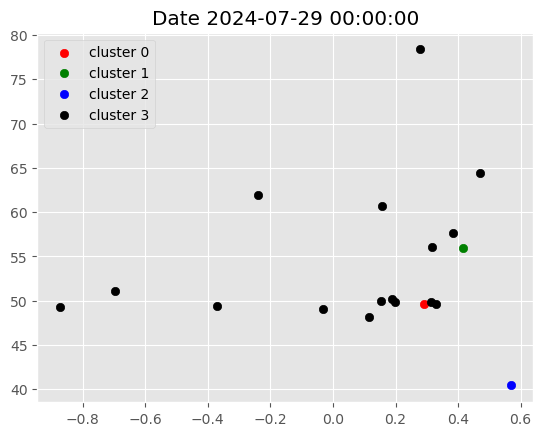

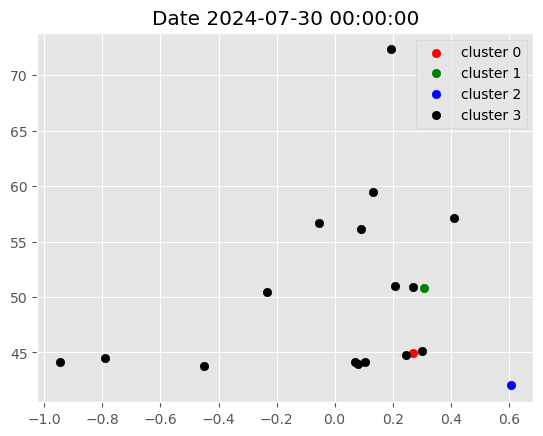

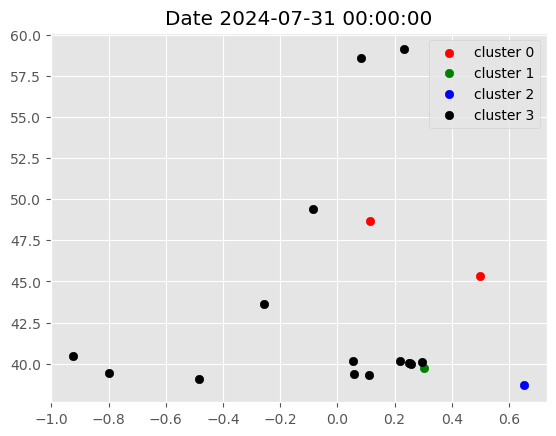

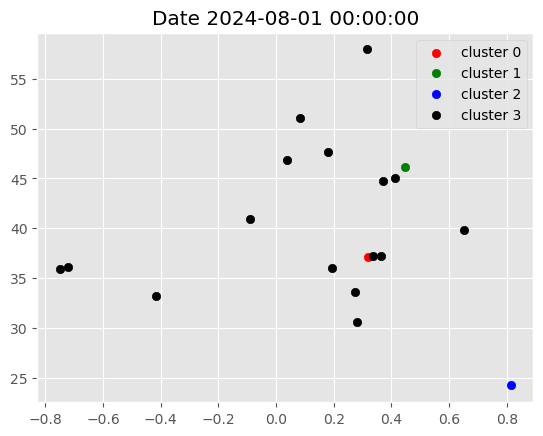

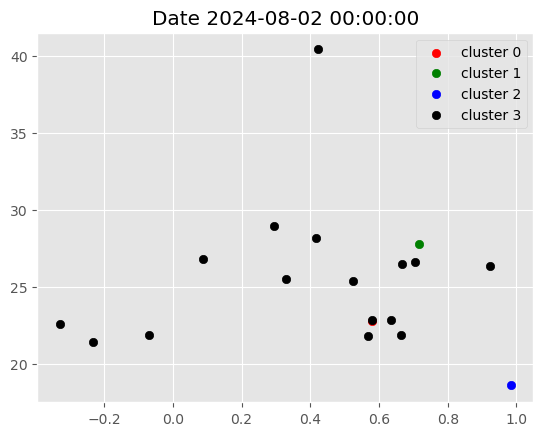

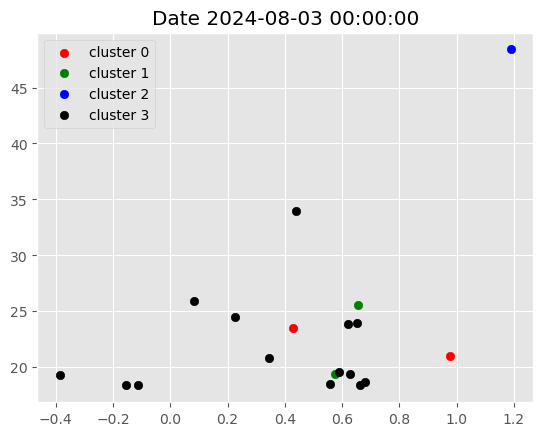

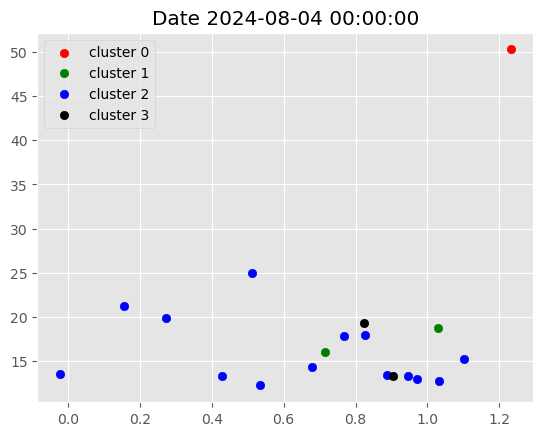

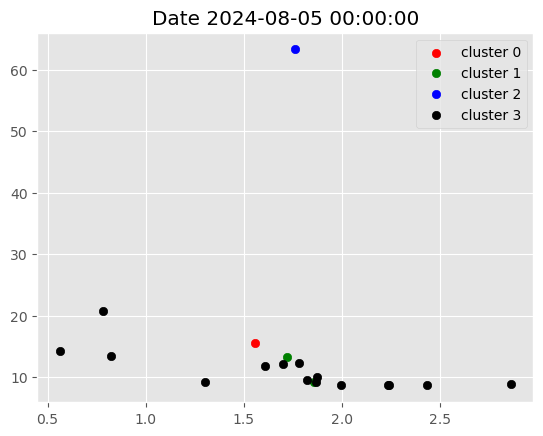

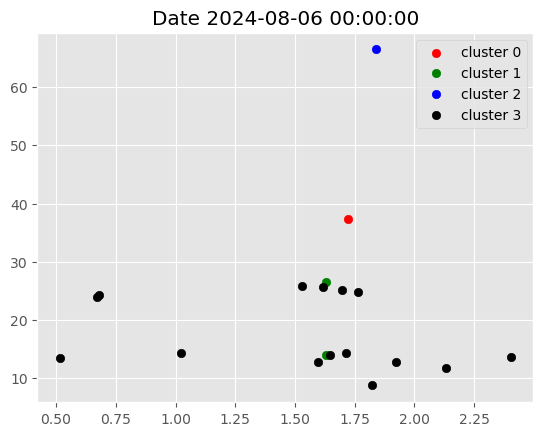

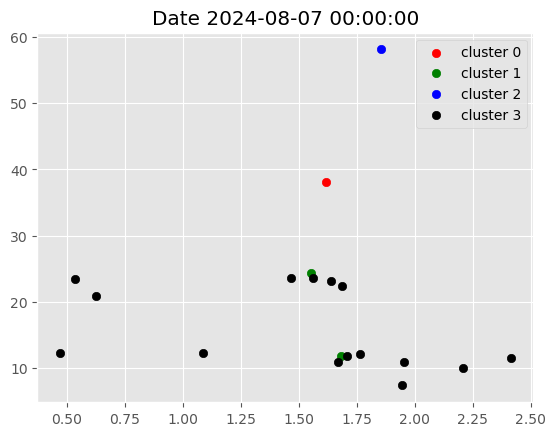

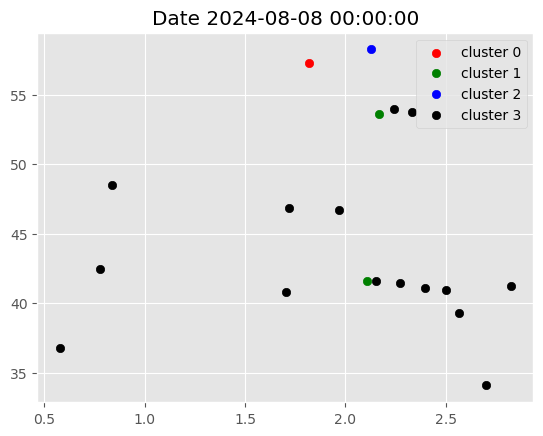

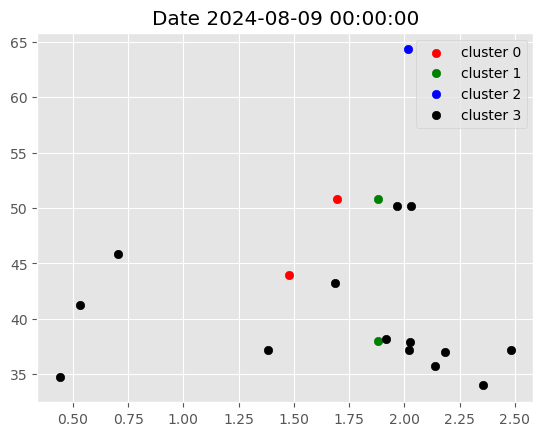

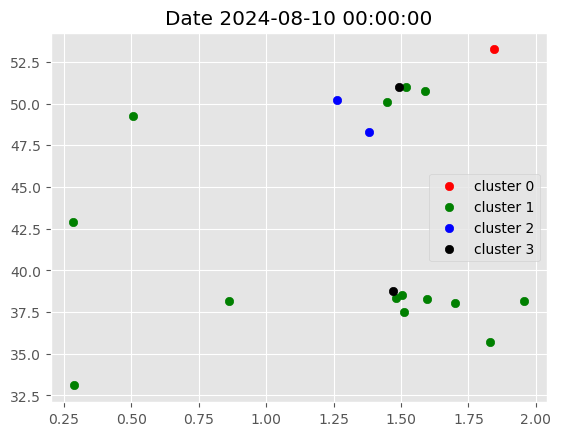

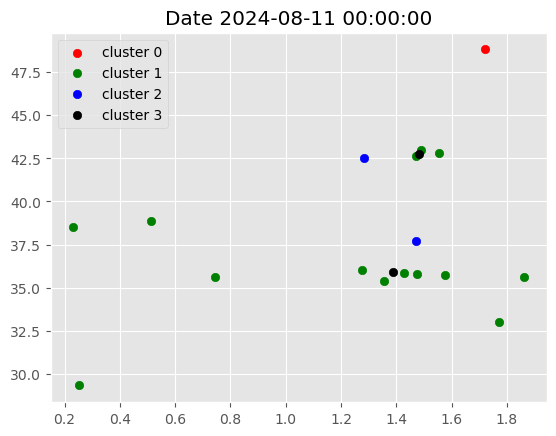

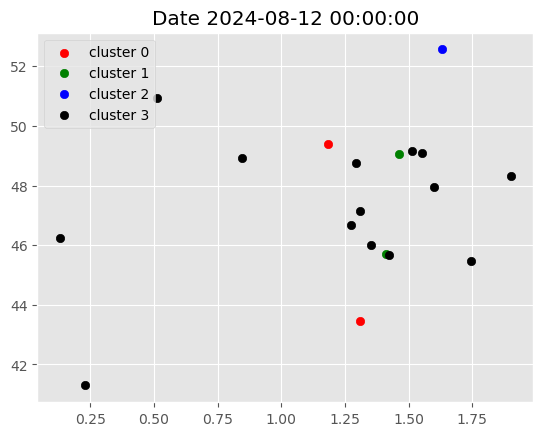

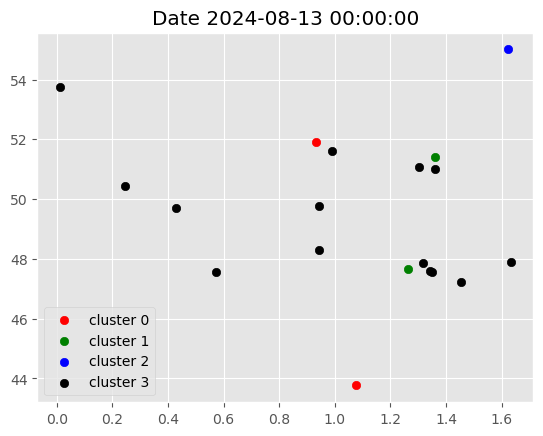

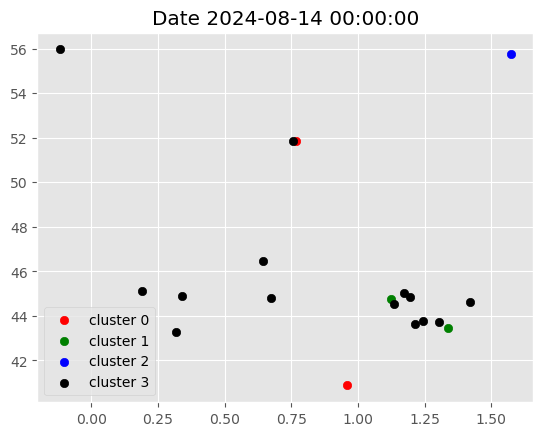

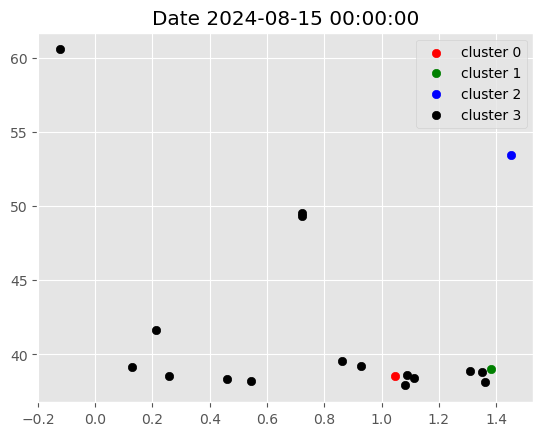

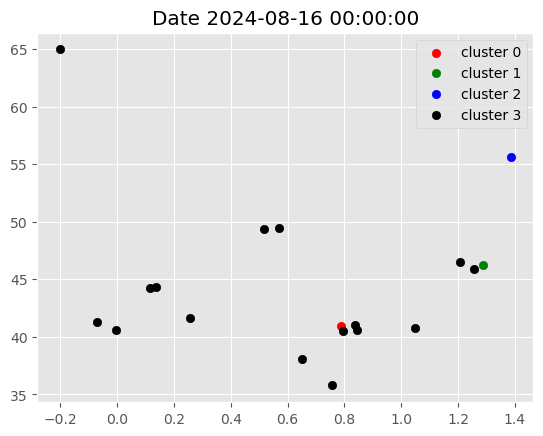

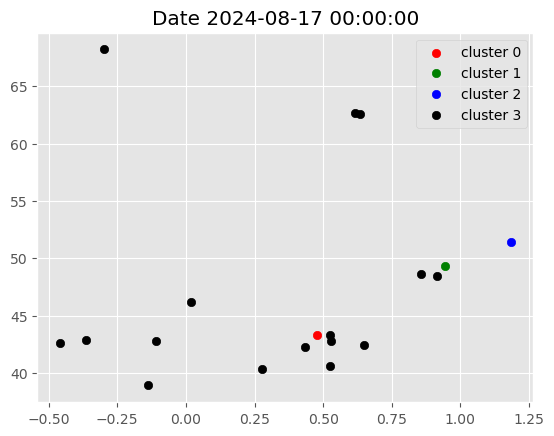

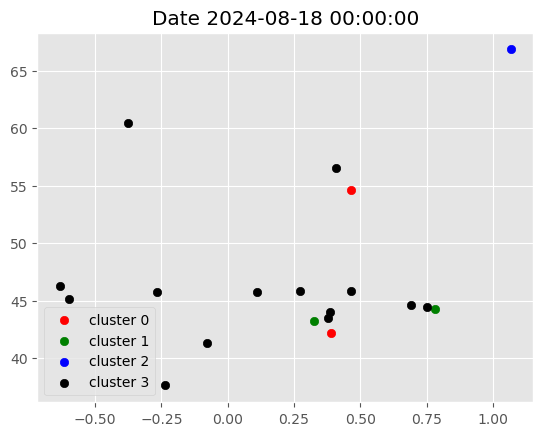

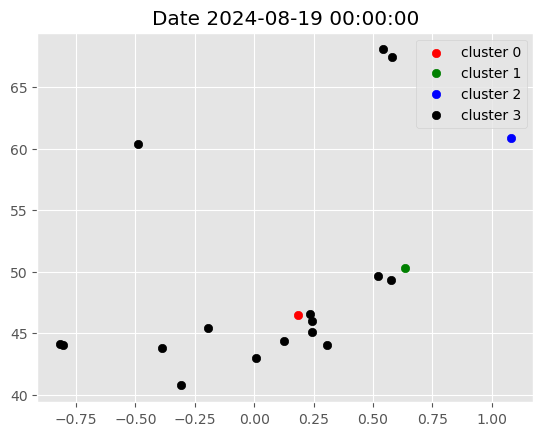

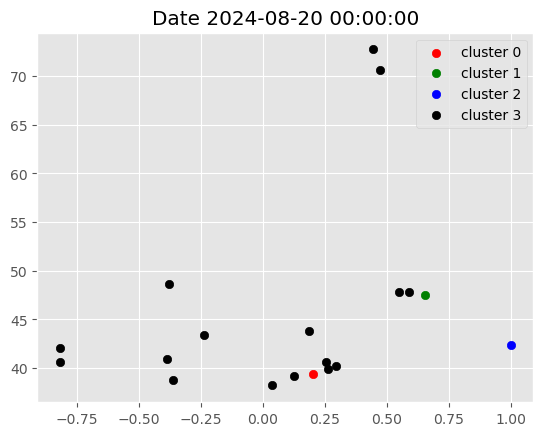

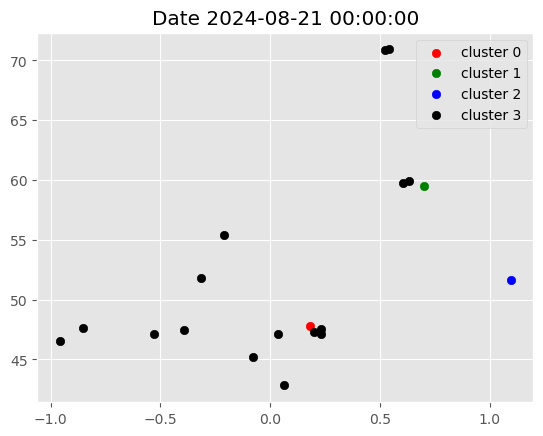

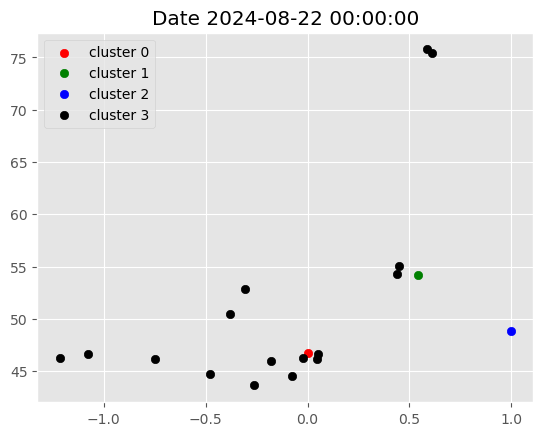

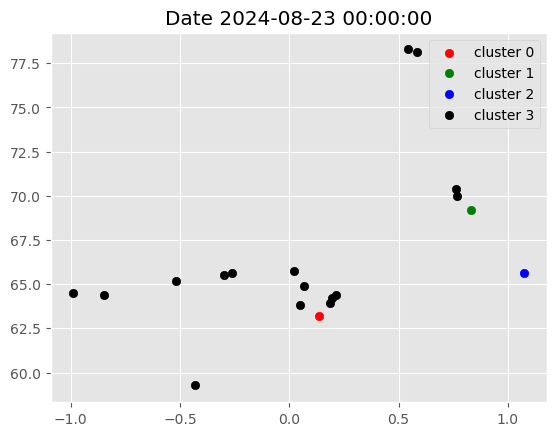

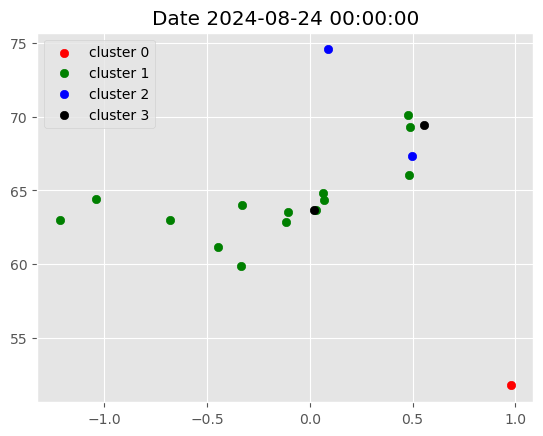

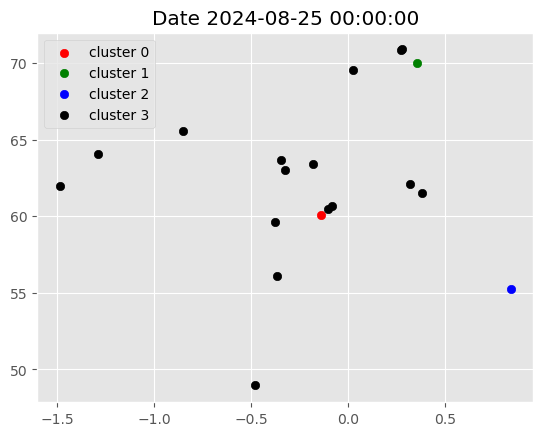

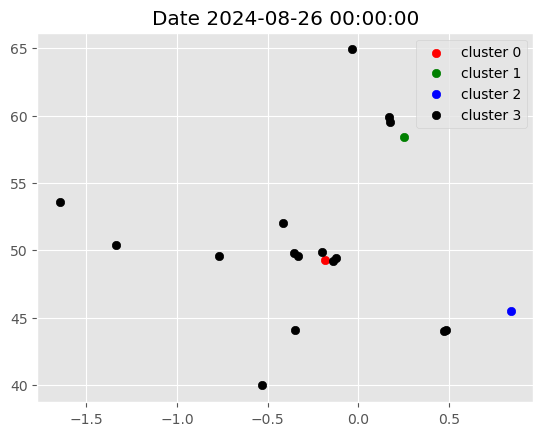

In [143]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():

    g = data.xs(i, level=0)

    plt.title(f'Date {i}')

    plot_clusters(g)

### Apply pre-defined centroids.

In [116]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

## 6. For each day select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

* First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

* Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 2.


In [144]:
filtered_df = data[data['cluster']==2].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:

    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2023-10-23': ['AAVE-USD',
  'AVAX-USD',
  'BCH-USD',
  'BNB-USD',
  'BTCB-USD',
  'LTC-USD',
  'MKR-USD',
  'RETH-USD',
  'STETH-USD',
  'TAO22974-USD',
  'WBETH-USD',
  'WBNB-USD',
  'WBTC-USD',
  'WSTETH-USD'],
 '2023-10-24': ['AAVE-USD',
  'AVAX-USD',
  'BCH-USD',
  'BNB-USD',
  'BTCB-USD',
  'LTC-USD',
  'MKR-USD',
  'RETH-USD',
  'STETH-USD',
  'TAO22974-USD',
  'WBETH-USD',
  'WBNB-USD',
  'WBTC-USD',
  'WSTETH-USD'],
 '2023-10-25': ['AAVE-USD',
  'AVAX-USD',
  'BCH-USD',
  'BNB-USD',
  'BTCB-USD',
  'LTC-USD',
  'MKR-USD',
  'RETH-USD',
  'STETH-USD',
  'TAO22974-USD',
  'WBETH-USD',
  'WBNB-USD',
  'WBTC-USD',
  'WSTETH-USD'],
 '2023-10-26': ['AAVE-USD',
  'AVAX-USD',
  'BCH-USD',
  'BNB-USD',
  'BTCB-USD',
  'LTC-USD',
  'MKR-USD',
  'RETH-USD',
  'STETH-USD',
  'TAO22974-USD',
  'WBETH-USD',
  'WBNB-USD',
  'WBTC-USD',
  'WSTETH-USD'],
 '2023-10-27': ['AAVE-USD',
  'AVAX-USD',
  'BCH-USD',
  'BNB-USD',
  'BTCB-USD',
  'LTC-USD',
  'MKR-USD',
  'RETH-USD',
  'STETH-USD',
  '

### Define portfolio optimization function

* We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

* To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

* Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [152]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):

    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=90)

    cov = risk_models.sample_cov(prices=prices,
                                 frequency=90)

    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')

    weights = ef.max_sharpe()

    return ef.clean_weights()


* Download Fresh Daily Prices Data only for short listed stocks.

In [173]:
coins = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=coins,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%***********************]  22 of 22 completed


Price                       Adj Close                                     \
Ticker                       AAVE-USD   AVAX-USD     BCH-USD     BNB-USD   
Date                                                                       
2022-10-22 00:00:00+00:00   82.085693  15.683672  108.700371  270.479492   
2022-10-23 00:00:00+00:00   88.873192  16.302294  110.886421  276.008179   
2022-10-24 00:00:00+00:00   85.102089  15.759552  107.931328  273.977417   
2022-10-25 00:00:00+00:00   82.307846  16.668629  112.795784  284.432526   
2022-10-26 00:00:00+00:00   83.502785  17.015156  114.589546  290.376984   
...                               ...        ...         ...         ...   
2024-08-21 00:00:00+00:00  140.289597  23.527414  349.232208  570.019714   
2024-08-22 00:00:00+00:00  135.798233  25.267035  346.558228  583.051880   
2024-08-23 00:00:00+00:00  143.749832  26.519520  365.193390  591.806030   
2024-08-24 00:00:00+00:00  137.038132  27.165842  363.680237  580.762207   
2024-08-25 00:00:00+00:00  135.574158  26.964920  356.380157  574.249939   

Price                                                               \
Ticker                          BTC-USD      BTCB-USD      ETH-USD   
Date                                                                 
2022-10-22 00:00:00+00:00  19208.189453  19205.000000  1314.299194   
2022-10-23 00:00:00+00:00  19567.007812  19582.816406  1363.447021   
2022-10-24 00:00:00+00:00  19345.572266  19353.625000  1344.998535   
2022-10-25 00:00:00+00:00  20095.857422  20066.140625  1461.665405   
2022-10-26 00:00:00+00:00  20770.441406  20775.515625  1566.566650   
...                                 ...           ...          ...   
2024-08-21 00:00:00+00:00  61175.191406  61129.894531  2631.395508   
2024-08-22 00:00:00+00:00  60381.914062  60372.761719  2622.951416   
2024-08-23 00:00:00+00:00  64094.355469  64087.375000  2764.447021   
2024-08-24 00:00:00+00:00  64178.992188  63986.316406  2769.389648   
2024-08-25 00:00:00+00:00  64333.542969  64439.148438  2749.157715   

Price                                                           ...  \
Ticker                       EZETH-USD    LTC-USD      MKR-USD  ...   
Date                                                            ...   
2022-10-22 00:00:00+00:00          NaN  52.180172   996.736389  ...   
2022-10-23 00:00:00+00:00          NaN  53.950367   978.696289  ...   
2022-10-24 00:00:00+00:00          NaN  52.569244   926.776367  ...   
2022-10-25 00:00:00+00:00          NaN  56.025154   945.888794  ...   
2022-10-26 00:00:00+00:00          NaN  56.391678   937.116516  ...   
...                                ...        ...          ...  ...   
2024-08-21 00:00:00+00:00  2673.803955  64.281448  2035.692505  ...   
2024-08-22 00:00:00+00:00  2666.858154  63.830376  2025.138916  ...   
2024-08-23 00:00:00+00:00  2811.848877  66.200844  2175.049805  ...   
2024-08-24 00:00:00+00:00  2811.828857  66.578659  2135.242188  ...   
2024-08-25 00:00:00+00:00  2810.366455  64.846954  2133.535645  ...   

Price                          Volume                                       \
Ticker                        SOL-USD  STETH-USD TAO22974-USD     USDT-USD   
Date                                                                         
2022-10-22 00:00:00+00:00   474234383    2395562          NaN  24133042918   
2022-10-23 00:00:00+00:00   633157057    1811738          NaN  31629519444   
2022-10-24 00:00:00+00:00   667625312    1198908          NaN  40494105063   
2022-10-25 00:00:00+00:00  1336242036    1684550          NaN  64740988487   
2022-10-26 00:00:00+00:00  1250974763  414726428          NaN  78294376043   
...                               ...        ...          ...          ...   
2024-08-21 00:00:00+00:00  1923259439   61104175   47394862.0  53113473486   
2024-08-22 00:00:00+00:00  1368400829   40075181   64853144.0  45673020568   
2024-08-23 00:00:00+00:00  2560976300   49233125  104796534.0  66435913915   
2024-08-24 00:00:00+00:

* Calculate daily returns for each coin which could land up in our portfolio.

* Then loop over each month start, select the coins for the month and calculate their weights for the next month.

* If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

* Calculated each day portfolio return.

In [174]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]

        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))

            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T

        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2023-11-15, Continuing with Equal-Weights
"None of ['index'] are in the columns"
"None of ['index'] are in 

"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-02-22, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-02-23, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-02-24, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-02-25, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-02-26, Continuing with Equal-Weights
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-02-29, Continuing with Equal-Weights
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-03-03, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed f

Max Sharpe Optimization failed for 2024-06-09, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-10, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-11, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-12, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-13, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-14, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-15, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-16, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-06-17, Continuing with Equal-Wei

"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-08-22, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-08-23, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-08-24, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-08-25, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2024-08-26, Continuing with Equal-Weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2024-08-27, Continuing with Equal-Weights
"None of ['index'] are in the columns"


Strategy Return
date                                      
2023-10-31 00:00:00+00:00        -0.002564
2023-11-30 00:00:00+00:00         0.009382
2023-12-31 00:00:00+00:00        -0.001034
2024-01-31 00:00:00+00:00        -0.026779
2024-02-29 00:00:00+00:00         0.006320
2024-03-31 00:00:00+00:00        -0.000391
2024-04-30 00:00:00+00:00        -0.000551
2024-05-31 00:00:00+00:00        -0.001894
2024-06-30 00:00:00+00:00         0.028085
2024-07-31 00:00:00+00:00        -0.000097
2024-08-25 00:00:00+00:00        -0.011341

## 7. Visualize Portfolio returns and compare to Top100 returns.

In [175]:
import datetime as dt
import yfinance as yf
import numpy as np

# download the btc history data
btc = yf.download(tickers='BTC-USD',
                  start='2023-01-01',
                  end=dt.date.today())

# calculate btc log returen
btc_ret = np.log(btc[['Adj Close']]).diff().dropna().rename({'Adj Close':'BTC Buy&Hold'}, axis=1)

# remove portfolio_df's time zone information
portfolio_df.index = portfolio_df.index.tz_localize(None)

btc_ret.index = btc_ret.index.tz_localize(None)

# merge two data frame
portfolio_df = portfolio_df.merge(btc_ret, left_index=True, right_index=True)

[*********************100%***********************]  1 of 1 completed


In [176]:
portfolio_df

Strategy Return  BTC Buy&Hold
2023-10-31        -0.002564      0.004783
2023-11-30         0.009382     -0.003857
2023-12-31        -0.001034      0.002565
2024-01-31        -0.026779     -0.008652
2024-02-29         0.006320     -0.021122
2024-03-31        -0.000391      0.023953
2024-04-30        -0.000551     -0.051495
2024-05-31        -0.001894     -0.012860
2024-06-30         0.028085      0.028989
2024-07-31        -0.000097     -0.024183
2024-08-25        -0.011341      0.002405

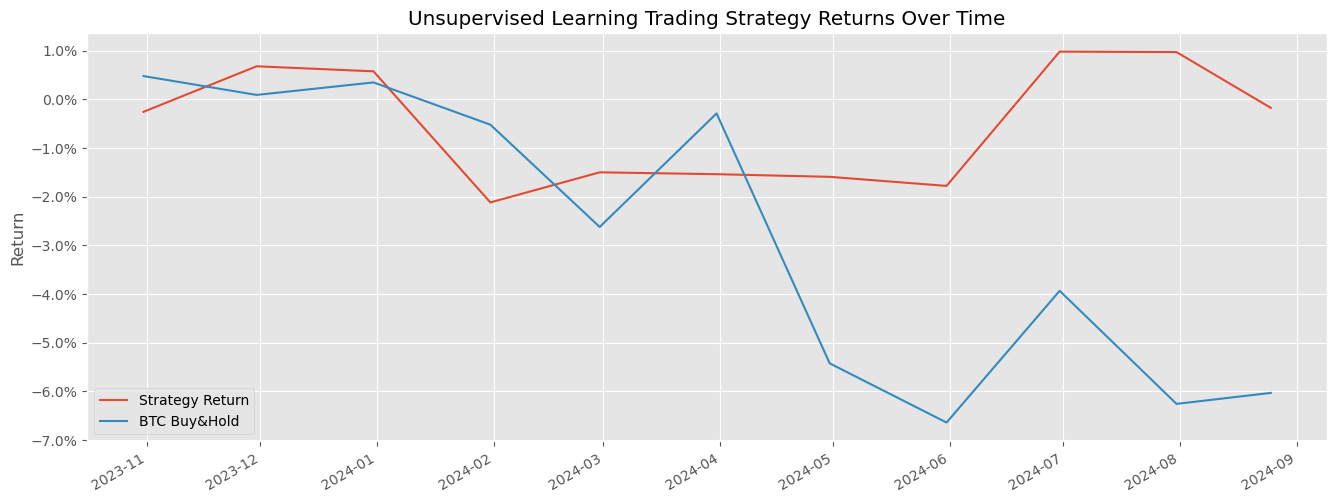

In [177]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return.plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()
